# CSMODEL Phase 1


<h3 style="color:blue;text-shadow: 1px 1px 3px cyan, -1px -1px 3px cyan; "> Research Question: Are the correlation coefficients between physiochemical properties of acidity and sulphates to the rated quality of red wine significantly more different than correlations coefficients of white wine? </h3>


Members: <br>
AGBUYA, PAUL JOSEF PERMA <br>
ALONZO, JOHN LEOMARC MORELOS <br>
BADAYOS, ETHAN ROMEY <br>rLUMAGUI, HANS EMILIO MARCELO <br>
O>


<h1 style="color:blue;text-shadow: 1px 1px 3px cyan, -1px -1px 3px cyan; ">Introduction: Dataset Description</h1>

This project aims to go through and clean a dataset and apply the process of analyzing the data in order to formulate a research question before proceeding to model the data, do hypothesis testing, and extract insights from the data.

Our group's chosen dataset is the [Red and White Wine Quality dataset from Kaggle.](https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine?select=wine-quality-white-and-red.csv)

This is a Dataset that is a combination of other wine datasets collected by the same author.

The "Wine Quality Data Set (Red & White Wine)" dataset was compiled in 2009 by Cortez et al. The dataset is mainly utilized for exploring the factors that influence the quality of red and white wine. The factors that are included are physicochemical properties such as acidity, sugar, pH levels, alcohol content, and others, amounting to 12 different attributes. Due to the logistics and privacy issues of data collection, only physicochemical properties can be recorded and sensory output from credible wine tasters. If another sample of wine tasters were to do the same manner at which quality is rated from 1-10, their difference could be significantly different from the result of this data model. No expicit criteria of scoring is shared, the results may have some degree of **convenience bias** by not having all types of wine tasters rate or systematically reason their score. **Exclusion bias** on the wines that are of poor quality can be exhibited by the brand owner Vinho Verde, as most quality of the wine range at a "normal" score. Findings of this model can also give exclusion bias to other forms of relevant processes that make quality wine such as fermentation. aging, and various other wine making techniques that are not visibly shown.

Each entry in the dataset represents a variant of the Portuguese "Vinho Verde" wine. The key objective of this dataset is to model wine quality based on these attributes which is mainly quantified through sensory data by scoring the taste between 0 (very bad) and 10 (excellent).

The Red & White Wine Quality dataset on Kaggle, sourced from the UCI Machine Learning Repository, contains chemical and sensory data on red and white Portuguese Vinho Verde wine. The dataset includes 1,599 instances of red wine and 4,898 instances of white wine. There are 12 input variables such as the type of wine (red/white), fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol. The output variable is the wine quality score, ranging from 0 to 10, as determined by wine experts. This dataset is useful for regression, classification, and feature selection tasks, aiding in the analysis and prediction of wine quality based on its chemical properties.


Most numerical data are continuous, only the quality and pH are of discrete. Additionally, 'type' variable is of the kind categorical nominal. 

Most of the data shown here are represented as concentration of the acid as a solute in a solution (usually uses g/dm3 or Mol/metric unit). Another perspective to view cubic decimeters (dm<sup>3</sup>) is that they are equivalent to a Liter (L). These are variables that dataset would use and what our model would also account for.:

- **`type of wine`**: the color of wine and its type associated by the brand (only 'red' and 'white')
- **`fixed acidity`**: These are acids that naturally occur in the grapes (citric, malic, tartaric) that are used to ferment the wind and that are carried over to the wine. **(g/dm<sup>3</sup>)**
- **`volatile acidity`**: The acid components that evaporate at low temperature. These are acetic acid that lead to vinegar-like taste. **(g/dm<sup>3</sup>)**
- **`citric acid`**: Citric acid is the concentration of the pure acid supplement added in wine although only found in small proportiosn which adds taste of 'freshness'. **(g/dm<sup>3</sup>)**
- **`residual sugar`**: These usually are the sugars that remain after fermentation. This shouldn't usually be hard to find and its rare to find 1 gram/liter of it. Wines residual sugar leel greater than 45 grams/liter are considered sweet. Not being sweet puts the taste spectrum to feeling "dry." **(g/dm<sup>3</sup>)**
- **`chlorides`**: The amount of chloride salt in the wine. **(g/dm<sup>3</sup>)**
- **`free sulfer dioxide`**: The free SO2 that exists in the equilibrium between molecular SO2 (the dissolved gas) and bisulfate ion. These help with oxidation of wine and microbial growth. Higher free SO2 leads to stronger preservative effect. **(mg/dm<sup>3</sup>)**
- **`total sulfer dioxide`**: Both free and bound forms of SO2; Being evident in wine can affect scent and flavor experienced by nose and wine. **(mg/dm<sup>3</sup>)**
- **`density`**:  Wine should be similar or higher than water's density ("0.00099984 g/dm<sup>3</sup>" or "0.99984 g/ml or g/cm<sup>3</sup>"). Depends on percent of alcohol and sugar content. **(g/cm<sup>3</sup>)**
- **`pH`**: the potency and concentration of of the dissociated acids in the wine. Wines direction less than 7 in a pH scale tend to the acidic side while more than 7 makes it more basic or less acidic. Wines are between 3-4 usually in the pH scale. The scale is a factor of 10 so a wine of pH 3 is ten times more acidic than of the wine with pH 4
- **`sulphates`**: This is the amount of potassium sulphate as a wine additive which can contribute to SO2 levels. Another form of antimicrobial and antioxidant agent. **(g/cm<sup>3</sup>)**
- **`alchohol`**: This is how much alcohol is contained in a given volum of wine. **(%)**
- **`quality`**: Score between 0 and 10 by wine experts. **(0 is very bad while 10 is very excellent)**


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import norm
from scipy.stats import kruskal
from scipy import stats as st
from scipy.stats import pointbiserialr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind




# Reading the dataset

In [7]:
df = pd.DataFrame()
df = pd.read_csv("wine-quality-white-and-red.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


As what researchers and data scientists have stated. All of the data are complete no null values are available

In [9]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

The range of values from residual sugar **(1.8-65.8)**, free sulfur dioxide **(1-289)**, and total sulfur dioxide **(6-440)** stand out as features whom are more far off than the numerical values of the other features. As wat median of the quality is presenting, most wines fall under "normalcy" while there is an extent that quality is being pulled by an outlier of a score. Making it seem that the data is skewed.

<h1 style="color:blue;text-shadow: 1px 1px 3px cyan, -1px -1px 3px cyan; ">Cleaning the Dataset</h1>


In order to conduct a proper study using the <b>red and white wine dataset</b> it is essential to clean the data and rid the dataset of the following:

- multiple representation of the same categorical value
- incorrect datatype variable
- values that are set to default values of the variable
- missing data
- duplicate data
- inconsistent formatting

For this study, it is only required to clean variables that will utilized in the study; as such the following varibles will be used

- **`fixed acidity`**:
- **`volatile acidity`**:
- **`citric acid`**:
- **`residual sugar`**:
- **`chlorides`**:
- **`density`**:
- **`pH`**
- **`sulphates`**:
- **`alchohol`**:
- **`quality`**:

We will not be using **`free sulfer dioxide`** and **`total sulfer dioxide`** for now as we would later discuss, they are better fitter into a new feature and cleaning it there.


# Get the datatypes per column

In [13]:
datatypes = df.dtypes
datatypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Get the null values per column

In [15]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Drop duplicate values

In [17]:
df = df.drop_duplicates(keep = 'first', inplace = False)
df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
6     white            6.2             0.320         0.16             7.0   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
6         0.045                 30.0                 136.0  0.99490  3.18   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
6          0.47      9.6        6  
...         ...      ...      ...  
6491       0.82      9.5        6  
6492       0.58     10.5        5  
6493       0.76     11.2        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[5320 rows x 13 columns]

As of the table above, no notable deletions occured. no duplicated row were found.

### **`fixed acidity`** variable

In [20]:
val = df["fixed acidity"].unique()
val.sort()
print(val)
print(len(val))

[ 3.8   3.9   4.2   4.4   4.5   4.6   4.7   4.8   4.9   5.    5.1   5.2
  5.3   5.4   5.5   5.6   5.7   5.8   5.9   6.    6.1   6.15  6.2   6.3
  6.4   6.45  6.5   6.6   6.7   6.8   6.9   7.    7.1   7.15  7.2   7.3
  7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3   8.4   8.5
  8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5   9.6   9.7
  9.8   9.9  10.   10.1  10.2  10.3  10.4  10.5  10.6  10.7  10.8  10.9
 11.   11.1  11.2  11.3  11.4  11.5  11.6  11.7  11.8  11.9  12.   12.1
 12.2  12.3  12.4  12.5  12.6  12.7  12.8  12.9  13.   13.2  13.3  13.4
 13.5  13.7  13.8  14.   14.2  14.3  15.   15.5  15.6  15.9 ]
106


In [21]:
df['fixed acidity'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`fixed acidity`** column

therefore, we can conclude that the **`fixed acidity`** column is clean

### **`volatile acidity`** variable



In [24]:
val = df['volatile acidity'].unique()
val.sort()
print(val)
print(len(val))

[0.08  0.085 0.09  0.1   0.105 0.11  0.115 0.12  0.125 0.13  0.135 0.14
 0.145 0.15  0.155 0.16  0.165 0.17  0.175 0.18  0.185 0.19  0.2   0.205
 0.21  0.215 0.22  0.225 0.23  0.235 0.24  0.245 0.25  0.255 0.26  0.265
 0.27  0.275 0.28  0.285 0.29  0.295 0.3   0.305 0.31  0.315 0.32  0.325
 0.33  0.335 0.34  0.345 0.35  0.355 0.36  0.365 0.37  0.375 0.38  0.385
 0.39  0.395 0.4   0.405 0.41  0.415 0.42  0.425 0.43  0.435 0.44  0.445
 0.45  0.455 0.46  0.47  0.475 0.48  0.485 0.49  0.495 0.5   0.51  0.52
 0.53  0.54  0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59
 0.595 0.6   0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65
 0.655 0.66  0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71
 0.715 0.72  0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77
 0.775 0.78  0.785 0.79  0.795 0.8   0.805 0.81  0.815 0.82  0.825 0.83
 0.835 0.84  0.845 0.85  0.855 0.86  0.865 0.87  0.875 0.88  0.885 0.89
 0.895 0.9   0.905 0.91  0.915 0.92  0.93  0.935 0.95  0.95

In [25]:
df['volatile acidity'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`volatile acidity`** column

therefore, we can conclude that the **`volatile acidity`** column is clean

### **`citric acid`** variable

In [28]:
val = df['citric acid'].unique()
val.sort()
print(val)
print(len(val))

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.78 0.79 0.8  0.81 0.82 0.86 0.88
 0.91 0.99 1.   1.23 1.66]
89


In [29]:
df['citric acid'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`citric acid`** column

therefore, we can conclude that the **`citric acid`** column is clean

### **`residual sugar`** variable

In [32]:
val = df['residual sugar'].unique()
val.sort()
print(val)
print(len(val))

[ 0.6   0.7   0.8   0.9   0.95  1.    1.05  1.1   1.15  1.2   1.25  1.3
  1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75  1.8   1.85  1.9
  1.95  2.    2.05  2.1   2.15  2.2   2.25  2.3   2.35  2.4   2.5   2.55
  2.6   2.65  2.7   2.8   2.85  2.9   2.95  3.    3.1   3.15  3.2   3.3
  3.4   3.45  3.5   3.6   3.65  3.7   3.75  3.8   3.85  3.9   3.95  4.
  4.1   4.2   4.25  4.3   4.35  4.4   4.45  4.5   4.55  4.6   4.65  4.7
  4.75  4.8   4.85  4.9   5.    5.1   5.15  5.2   5.25  5.3   5.35  5.4
  5.45  5.5   5.55  5.6   5.7   5.8   5.85  5.9   5.95  6.    6.1   6.2
  6.3   6.35  6.4   6.5   6.55  6.6   6.65  6.7   6.75  6.8   6.85  6.9
  6.95  7.    7.05  7.1   7.2   7.25  7.3   7.35  7.4   7.45  7.5   7.6
  7.7   7.75  7.8   7.85  7.9   7.95  8.    8.1   8.15  8.2   8.25  8.3
  8.4   8.45  8.5   8.55  8.6   8.65  8.7   8.75  8.8   8.9   8.95  9.
  9.05  9.1   9.15  9.2   9.25  9.3   9.4   9.5   9.55  9.6   9.65  9.7
  9.8   9.85  9.9  10.   10.05 10.1  10.2  10.3  10.4  10.5  10.5

In [33]:
df['residual sugar'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`residual sugar`** column

therefore, we can conclude that the **`residual sugar`** column is clean

### **`chlorides`** variable

In [36]:
val = df['chlorides'].unique()
val.sort()
print(val)
print(len(val))

[0.009 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022
 0.023 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034
 0.035 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046
 0.047 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058
 0.059 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07
 0.071 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082
 0.083 0.084 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094
 0.095 0.096 0.097 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106
 0.107 0.108 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118
 0.119 0.12  0.121 0.122 0.123 0.124 0.125 0.126 0.127 0.128 0.13  0.132
 0.133 0.135 0.136 0.137 0.138 0.142 0.143 0.144 0.145 0.146 0.147 0.148
 0.149 0.15  0.152 0.153 0.154 0.156 0.157 0.158 0.159 0.16  0.161 0.165
 0.166 0.167 0.168 0.169 0.17  0.171 0.172 0.173 0.174 0.175 0.176 0.178
 0.179 0.18  0.184 0.185 0.186 0.19  0.194 0.197 0.2

In [37]:
df['chlorides'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`chlorides`** column

therefore, we can conclude that the **`chlorides`** column is clean

### **`density`** variable

In [40]:
val = df['density'].unique()
val.sort()
print(val)
print(len(val))

[0.98711  0.98713  0.98722  0.9874   0.98742  0.98746  0.98758  0.98774
 0.98779  0.98794  0.98802  0.98815  0.98816  0.98819  0.98822  0.98823
 0.988245 0.98834  0.98836  0.9884   0.98845  0.98853  0.98854  0.98856
 0.9886   0.98862  0.98865  0.98867  0.98868  0.98869  0.9887   0.98871
 0.98872  0.98876  0.98878  0.9888   0.98882  0.98883  0.98884  0.98886
 0.98889  0.9889   0.98892  0.98894  0.98895  0.98896  0.98898  0.989
 0.98902  0.98904  0.98906  0.9891   0.98912  0.98913  0.98914  0.98915
 0.98916  0.98918  0.98919  0.9892   0.98922  0.98923  0.98924  0.98926
 0.98928  0.9893   0.98931  0.989315 0.98934  0.98935  0.98936  0.98938
 0.98939  0.9894   0.98941  0.98942  0.989435 0.98944  0.98945  0.98946
 0.989465 0.98947  0.98948  0.98949  0.9895   0.98951  0.98952  0.98953
 0.98954  0.98956  0.98958  0.98959  0.9896   0.98961  0.98962  0.98963
 0.98964  0.98965  0.98966  0.98968  0.9897   0.98972  0.98974  0.98975
 0.98976  0.98978  0.9898   0.98981  0.98982  0.98984  0.98985  0.

In [41]:
df['density'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`density`** column

therefore, we can conclude that the **`density`** column is clean

### **`pH`** variable

In [44]:
val = df["pH"].unique()
val.sort()
print(val)
print(len(val))

[2.72 2.74 2.77 2.79 2.8  2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89 2.9
 2.91 2.92 2.93 2.94 2.95 2.96 2.97 2.98 2.99 3.   3.01 3.02 3.03 3.04
 3.05 3.06 3.07 3.08 3.09 3.1  3.11 3.12 3.13 3.14 3.15 3.16 3.17 3.18
 3.19 3.2  3.21 3.22 3.23 3.24 3.25 3.26 3.27 3.28 3.29 3.3  3.31 3.32
 3.33 3.34 3.35 3.36 3.37 3.38 3.39 3.4  3.41 3.42 3.43 3.44 3.45 3.46
 3.47 3.48 3.49 3.5  3.51 3.52 3.53 3.54 3.55 3.56 3.57 3.58 3.59 3.6
 3.61 3.62 3.63 3.64 3.65 3.66 3.67 3.68 3.69 3.7  3.71 3.72 3.74 3.75
 3.76 3.77 3.78 3.79 3.8  3.81 3.82 3.85 3.9  4.01]
108


In [45]:
df['pH'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`pH`** column

therefore, we can conclude that the **`pH`** column is clean

### **`sulphates`** variable

In [48]:
val = df['sulphates'].unique()
val.sort()
print(val)
print(len(val))

[0.22 0.23 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36
 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5
 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64
 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78
 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92
 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06
 1.07 1.08 1.09 1.1  1.11 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.2  1.22
 1.26 1.28 1.31 1.33 1.34 1.36 1.56 1.59 1.61 1.62 1.95 1.98 2.  ]
111


In [49]:
df['sulphates'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`sulphates`** column

therefore, we can conclude that the **`sulphates`** column is clean

### **`alcohol`** variable

In [52]:
val = df['alcohol'].unique()
val.sort()
print(val)
print(len(val))

[ 8.          8.4         8.5         8.6         8.7         8.8
  8.9         9.          9.05        9.1         9.2         9.23333333
  9.25        9.3         9.4         9.5         9.53333333  9.55
  9.56666667  9.6         9.63333333  9.7         9.73333333  9.75
  9.8         9.9         9.95       10.         10.03333333 10.1
 10.13333333 10.15       10.2        10.3        10.4        10.46666667
 10.5        10.53333333 10.55       10.56666667 10.6        10.65
 10.7        10.75       10.8        10.9        10.93333333 10.96666667
 10.98       11.         11.05       11.06666667 11.1        11.2
 11.26666667 11.3        11.33333333 11.35       11.36666667 11.4
 11.43333333 11.45       11.46666667 11.5        11.55       11.6
 11.63333333 11.65       11.7        11.73333333 11.75       11.8
 11.85       11.9        11.94       11.95       12.         12.05
 12.06666667 12.1        12.15       12.2        12.25       12.3
 12.33333333 12.4        12.5        12.6        12

In [53]:
df['alcohol'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`alcohol`** column

therefore, we can conclude that the **`alcohol`** column is clean

### **`quality`** variable

In [56]:
val = df['quality'].unique()
val.sort()
print(val)
print(len(val))

[3 4 5 6 7 8 9]
7


In [57]:
df['quality'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`quality`** column

therefore, we can conclude that the **`quality`** column is clean

### **`type`** variable

In [60]:
val = df['type'].unique()
val.sort()
print(val)
print(len(val))

['red' 'white']
2


In [61]:
df['type'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`quality`** column

therefore, we can conclude that the **`type`** column is clean

<h1 style="color:blue;text-shadow: 1px 1px 3px cyan, -1px -1px 3px cyan; ">Data Pre-Processing</h1>



## **`Column Transformation`**

In [65]:
free_tot= np.corrcoef(df['free sulfur dioxide'],df['total sulfur dioxide'])
free_tot

array([[1.        , 0.72048846],
       [0.72048846, 1.        ]])

These two variables are highly correlate from each other **(0.72)**. We will simply represent them as ratios from here on out 'sulfur dioxide ratio' the ratio is formatted at free is to total (free/total).

In [67]:
selected_cols = df[['free sulfur dioxide', 'total sulfur dioxide']].copy()
(selected_cols == 0).any()

free sulfur dioxide     False
total sulfur dioxide    False
dtype: bool

We would select the columns we would be finding the ratios from. Then we should check if we would be mistakenly dividing things by zero. As inspected above data seems clean and we would proceed in making them into ratios

In [69]:
selected_cols['sulfur dioxide ratio'] = selected_cols['free sulfur dioxide'] / selected_cols['total sulfur dioxide'] 
selected_cols

free sulfur dioxide  total sulfur dioxide  sulfur dioxide ratio
0                    45.0                 170.0              0.264706
1                    14.0                 132.0              0.106061
2                    30.0                  97.0              0.309278
3                    47.0                 186.0              0.252688
6                    30.0                 136.0              0.220588
...                   ...                   ...                   ...
6491                 28.0                  38.0              0.736842
6492                 32.0                  44.0              0.727273
6493                 39.0                  51.0              0.764706
6495                 32.0                  44.0              0.727273
6496                 18.0                  42.0              0.428571

[5320 rows x 3 columns]

In [70]:


dropped_df = df.drop(columns=selected_cols.columns[:2]).copy()
dropped_df_pre = df.iloc[:,:12].copy()
dropped_df_post = df.iloc[:,12:].copy()
df = pd.concat([dropped_df_pre, selected_cols['sulfur dioxide ratio'], dropped_df_post], axis=1)
df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
6     white            6.2             0.320         0.16             7.0   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
6         0.045                 30.0                 136.0  0.99490  3.18   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  sulfur dioxide ratio  quality  
0          0.45      8.8              0.264706        6  
1          0.49      9.5              0.106061        6  
2          0.44     10.1              0.309278        6  
3          0.40      9.9              0.252688        6  
6          0.47      9.6              0.220588        6  
...         ...      ...                   ...      ...  
6491       0.82      9.5              0.736842        6  
6492       0.58     10.5              0.727273        5  
6493       0.76     11.2              0.764706        6  
6495       0.71     10.2              0.727273        5  
6496       0.66     11.0              0.428571        6  

[5320 rows x 14 columns]

In [71]:
df=df.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1)
df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
6     white            6.2             0.320         0.16             7.0   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  density    pH  sulphates  alcohol  sulfur dioxide ratio  \
0         0.045  1.00100  3.00       0.45      8.8              0.264706   
1         0.049  0.99400  3.30       0.49      9.5              0.106061   
2         0.050  0.99510  3.26       0.44     10.1              0.309278   
3         0.058  0.99560  3.19       0.40      9.9              0.252688   
6         0.045  0.99490  3.18       0.47      9.6              0.220588   
...         ...      ...   ...        ...      ...                   ...   
6491      0.068  0.99651  3.42       0.82      9.5              0.736842   
6492      0.090  0.99490  3.45       0.58     10.5              0.727273   
6493      0.062  0.99512  3.52       0.76     11.2              0.764706   
6495      0.075  0.99547  3.57       0.71     10.2              0.727273   
6496      0.067  0.99549  3.39       0.66     11.0              0.428571   

      quality  
0           6  
1           6  
2           6  
3           6  
6           6  
...       ...  
6491        6  
6492        5  
6493        6  
6495        5  
6496        6  

[5320 rows x 12 columns]

We concatenate the new ratios and put them back on our original dataframe. We also drop the previous two derived values and place this new feature before the quality column

## **`Standardizing`**

Later on we will be having Data Modelling, and we would need to see a much more equivalent inspection among the variables, some mol/gram features are not of the same unit, better to safely standardize everything. The feature standardization is performed via means of the mean and standard deviation.

In [75]:
df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
6     white            6.2             0.320         0.16             7.0   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  density    pH  sulphates  alcohol  sulfur dioxide ratio  \
0         0.045  1.00100  3.00       0.45      8.8              0.264706   
1         0.049  0.99400  3.30       0.49      9.5              0.106061   
2         0.050  0.99510  3.26       0.44     10.1              0.309278   
3         0.058  0.99560  3.19       0.40      9.9              0.252688   
6         0.045  0.99490  3.18       0.47      9.6              0.220588   
...         ...      ...   ...        ...      ...                   ...   
6491      0.068  0.99651  3.42       0.82      9.5              0.736842   
6492      0.090  0.99490  3.45       0.58     10.5              0.727273   
6493      0.062  0.99512  3.52       0.76     11.2              0.764706   
6495      0.075  0.99547  3.57       0.71     10.2              0.727273   
6496      0.067  0.99549  3.39       0.66     11.0              0.428571   

      quality  
0           6  
1           6  
2           6  
3           6  
6           6  
...       ...  
6491        6  
6492        5  
6493        6  
6495        5  
6496        6  

[5320 rows x 12 columns]

In [76]:
len(df.columns)
df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
6     white            6.2             0.320         0.16             7.0   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  density    pH  sulphates  alcohol  sulfur dioxide ratio  \
0         0.045  1.00100  3.00       0.45      8.8              0.264706   
1         0.049  0.99400  3.30       0.49      9.5              0.106061   
2         0.050  0.99510  3.26       0.44     10.1              0.309278   
3         0.058  0.99560  3.19       0.40      9.9              0.252688   
6         0.045  0.99490  3.18       0.47      9.6              0.220588   
...         ...      ...   ...        ...      ...                   ...   
6491      0.068  0.99651  3.42       0.82      9.5              0.736842   
6492      0.090  0.99490  3.45       0.58     10.5              0.727273   
6493      0.062  0.99512  3.52       0.76     11.2              0.764706   
6495      0.075  0.99547  3.57       0.71     10.2              0.727273   
6496      0.067  0.99549  3.39       0.66     11.0              0.428571   

      quality  
0           6  
1           6  
2           6  
3           6  
6           6  
...       ...  
6491        6  
6492        5  
6493        6  
6495        5  
6496        6  

[5320 rows x 12 columns]

In [77]:
df_whole_with_reset_index = df.reset_index(drop=True) 
df_whole_with_reset_index

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            6.2             0.320         0.16             7.0   
...     ...            ...               ...          ...             ...   
5315    red            6.8             0.620         0.08             1.9   
5316    red            6.2             0.600         0.08             2.0   
5317    red            5.9             0.550         0.10             2.2   
5318    red            5.9             0.645         0.12             2.0   
5319    red            6.0             0.310         0.47             3.6   

      chlorides  density    pH  sulphates  alcohol  sulfur dioxide ratio  \
0         0.045  1.00100  3.00       0.45      8.8              0.264706   
1         0.049  0.99400  3.30       0.49      9.5              0.106061   
2         0.050  0.99510  3.26       0.44     10.1              0.309278   
3         0.058  0.99560  3.19       0.40      9.9              0.252688   
4         0.045  0.99490  3.18       0.47      9.6              0.220588   
...         ...      ...   ...        ...      ...                   ...   
5315      0.068  0.99651  3.42       0.82      9.5              0.736842   
5316      0.090  0.99490  3.45       0.58     10.5              0.727273   
5317      0.062  0.99512  3.52       0.76     11.2              0.764706   
5318      0.075  0.99547  3.57       0.71     10.2              0.727273   
5319      0.067  0.99549  3.39       0.66     11.0              0.428571   

      quality  
0           6  
1           6  
2           6  
3           6  
4           6  
...       ...  
5315        6  
5316        5  
5317        6  
5318        5  
5319        6  

[5320 rows x 12 columns]

We observe the indexing currently present in the dataframe **(the number leftmost)**. This is an important indication that we may need to reset indices every time a Dataframe is returned and/or we want to only modify specific columns 

In [79]:
scaler = StandardScaler()
quality_df = df['quality'].copy()
type_col = df['type'].copy()
raw_scaled_df = scaler.fit_transform(df[df.columns[1:11]].copy())


In [80]:
scaled_df = pd.DataFrame(raw_scaled_df, columns=df.columns[1:11])
scaled_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.163070         -0.440639     0.282076        3.478304  -0.317143   
1         -0.693555         -0.262314     0.146154       -0.766370  -0.208624   
2          0.670550         -0.381197     0.553919        0.411472  -0.181494   
3         -0.011503         -0.678405     0.010232        0.767046   0.035544   
4         -0.769339         -0.143431    -1.077141        0.433695  -0.317143   
...             ...               ...          ...             ...        ...   
5315      -0.314637          1.639816    -1.620828       -0.699699   0.306842   
5316      -0.769339          1.520933    -1.620828       -0.677476   0.903697   
5317      -0.996690          1.223725    -1.484907       -0.633029   0.144063   
5318      -0.996690          1.788420    -1.348985       -0.677476   0.496751   
5319      -0.920906         -0.202872     1.029645       -0.321901   0.279712   

       density        pH  sulphates   alcohol  sulfur dioxide ratio  
0     2.180171 -1.400959  -0.556721 -1.475130             -0.176994  
1    -0.180525  0.469784  -0.289571 -0.884822             -1.436500  
2     0.190441  0.220351  -0.623508 -0.378844              0.176873  
3     0.359062 -0.216155  -0.890658 -0.547503             -0.272404  
4     0.122993 -0.278513  -0.423146 -0.800493             -0.527250  
...        ...       ...        ...       ...                   ...  
5315  0.665953  1.218081   1.914413 -0.884822              3.571359  
5316  0.122993  1.405155   0.311515 -0.041525              3.495387  
5317  0.197186  1.841662   1.513689  0.548783              3.792574  
5318  0.315221  2.153452   1.179752 -0.294514              3.495387  
5319  0.321966  1.031007   0.845815  0.380124              1.123957  

[5320 rows x 10 columns]

First we seperate carefully one of our categorical ('type') and target response variables ('quality') into a seperate Data Series. We make of StandardScaler as means to standardize the values of our data. Most data now lie about the values of -3 to 3.

In [82]:
reset_quality_df = quality_df.reset_index(drop=True)
reset_type_df=type_col.reset_index(drop=True)

dropped_df_pre = scaled_df.iloc[:,10:].copy()
dropped_df_post = scaled_df.iloc[:,:10].copy()


scaled_df = pd.concat([dropped_df_pre, reset_type_df, dropped_df_post], axis=1)
scaled_df['quality'] = reset_quality_df

In [83]:
columns = set(scaled_df.columns) - set(['quality'])
scaled_df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white      -0.163070         -0.440639     0.282076        3.478304   
1     white      -0.693555         -0.262314     0.146154       -0.766370   
2     white       0.670550         -0.381197     0.553919        0.411472   
3     white      -0.011503         -0.678405     0.010232        0.767046   
4     white      -0.769339         -0.143431    -1.077141        0.433695   
...     ...            ...               ...          ...             ...   
5315    red      -0.314637          1.639816    -1.620828       -0.699699   
5316    red      -0.769339          1.520933    -1.620828       -0.677476   
5317    red      -0.996690          1.223725    -1.484907       -0.633029   
5318    red      -0.996690          1.788420    -1.348985       -0.677476   
5319    red      -0.920906         -0.202872     1.029645       -0.321901   

      chlorides   density        pH  sulphates   alcohol  \
0     -0.317143  2.180171 -1.400959  -0.556721 -1.475130   
1     -0.208624 -0.180525  0.469784  -0.289571 -0.884822   
2     -0.181494  0.190441  0.220351  -0.623508 -0.378844   
3      0.035544  0.359062 -0.216155  -0.890658 -0.547503   
4     -0.317143  0.122993 -0.278513  -0.423146 -0.800493   
...         ...       ...       ...        ...       ...   
5315   0.306842  0.665953  1.218081   1.914413 -0.884822   
5316   0.903697  0.122993  1.405155   0.311515 -0.041525   
5317   0.144063  0.197186  1.841662   1.513689  0.548783   
5318   0.496751  0.315221  2.153452   1.179752 -0.294514   
5319   0.279712  0.321966  1.031007   0.845815  0.380124   

      sulfur dioxide ratio  quality  
0                -0.176994        6  
1                -1.436500        6  
2                 0.176873        6  
3                -0.272404        6  
4                -0.527250        6  
...                    ...      ...  
5315              3.571359        6  
5316              3.495387        5  
5317              3.792574        6  
5318              3.495387        5  
5319              1.123957        6  

[5320 rows x 12 columns]

Here we reset the indices of the previously seperated 'quality' and 'type' columns and reset their indices to be carefully attached at the last column and first column respectively.

In [85]:
columns = scaled_df.columns
columns = set(columns) - set(['quality'])
columns = list(columns)
columns

['type',
 'sulfur dioxide ratio',
 'residual sugar',
 'pH',
 'alcohol',
 'fixed acidity',
 'citric acid',
 'chlorides',
 'sulphates',
 'volatile acidity',
 'density']

In [86]:
columns_notype = set(scaled_df.columns) - set(['quality', 'type'])
columns_notype = list(columns_notype)
columns_notype

['sulfur dioxide ratio',
 'residual sugar',
 'pH',
 'alcohol',
 'fixed acidity',
 'citric acid',
 'chlorides',
 'sulphates',
 'volatile acidity',
 'density']

Here we prep the usage of columns and store all feature names except the response target variable called 'quality.' We will be assessing also  the different types of wine. So let's also have a case for exempting the type columns

In [88]:
all_columns = scaled_df.columns
all_columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol',
       'sulfur dioxide ratio', 'quality'],
      dtype='object')

We also put another column for all dataframe features for added column list selection

## **`Outlier Detection`**

Here we try to assess of how each quality rating is rated by the wine experts. 

In [92]:
def getQuartiles(data):
    upper_quartile = data.quantile(0.75)
    lower_quartile = data.quantile(0)
    return pd.Series([lower_quartile, upper_quartile], index=['Lower Quartile', 'Upper Quartile'])

These would get the quartiles of each dataframe

In [94]:
def remove_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group >= lower_bound) & (group <= upper_bound)]

These select only those values within the IQR

In [96]:

def count_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return ((group < lower_bound) | (group > upper_bound)).sum()

This method allows us to count the outliers

In [98]:
scaled_df_outliers = scaled_df.groupby("quality")[list(columns_notype)].agg(count_outliers)
scaled_df_outliers

sulfur dioxide ratio  residual sugar  pH  alcohol  fixed acidity  \
quality                                                                     
3                           0               0   0        0              2   
4                           2              14   1        1              4   
5                          52              50  24       56             88   
6                          89              52  27        6            129   
7                          28              49   8        0             67   
8                           7               3   1        5              9   
9                           1               1   0        1              1   

         citric acid  chlorides  sulphates  volatile acidity  density  
quality                                                                
3                  0          4          1                 1        0  
4                  2          8          6                 2        0  
5                 38         74         54                35        4  
6                176        112         64               155        3  
7                 68         69         11                32        3  
8                 13         12          1                 3        5  
9                  0          0          1                 0        1

In [99]:
scaled_out_sum = scaled_df_outliers.T.agg(['sum'])
scaled_out_sum

quality  3   4    5    6    7   8  9
sum      8  40  475  813  335  59  6

We first look at our standardized df version and see how are the outliers there. Potentially a lot of data could be removed from these outliers. Looks like we would need a different approach in assessing outliers further.

In [101]:
df_outliers = df.groupby("quality")[list(columns_notype)].agg(count_outliers)
df_outliers

sulfur dioxide ratio  residual sugar  pH  alcohol  fixed acidity  \
quality                                                                     
3                           0               0   0        0              2   
4                           2              14   1        1              4   
5                          52              50  24       52             88   
6                          89              49  27        4            129   
7                          28              49   8        0             65   
8                           7               3   1        5              9   
9                           1               1   0        1              1   

         citric acid  chlorides  sulphates  volatile acidity  density  
quality                                                                
3                  0          4          1                 1        0  
4                  2          8          6                 2        0  
5                 38         74         54                35        4  
6                176        112         64               155        3  
7                 68         69         11                32        3  
8                 13         12          1                 3        5  
9                  0          0          1                 0        1

In [102]:
raw_out_sum = df_outliers.T.agg(['sum'])
raw_out_sum

quality  3   4    5    6    7   8  9
sum      8  40  471  808  333  59  6

We first look at our standardized df version and see how are the outliers there. This Dataframe would be using the data pre processing after the column transformation

In [104]:
raw_out_sum-scaled_out_sum

quality  3  4  5  6  7  8  9
sum      0  0 -4 -5 -2  0  0

Looking at the table above. There is minor differences of the data points that they consider outliers. The ones showing visibly in the equation **raw_out_sum-scaled_out_sum** makes the scaled Dataframe have the most amount of outliers by a slight margin. Let's first see how the boxplot for the raw pre-standardized dataframe is formed.

### **`Box Plot for Both types of wine`**

Box plots are used to determine outliers within columns

x = Alcohol, Chlorides, Citric Acid, Density, Fixed Acidity, pH, Residual Sugar, Sulphates, Sulfur Dioxide Ratio, Volatile Acidity


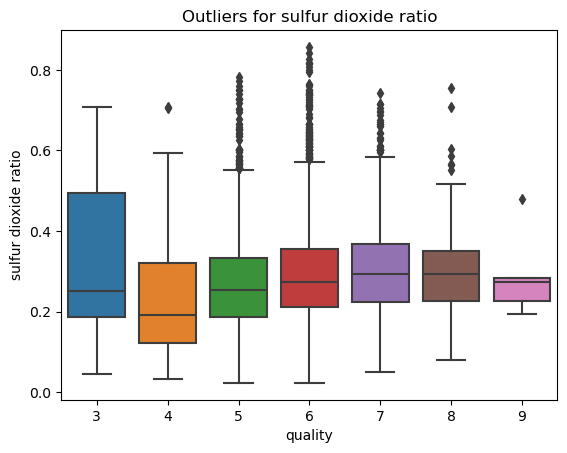

<Figure size 400x600 with 0 Axes>

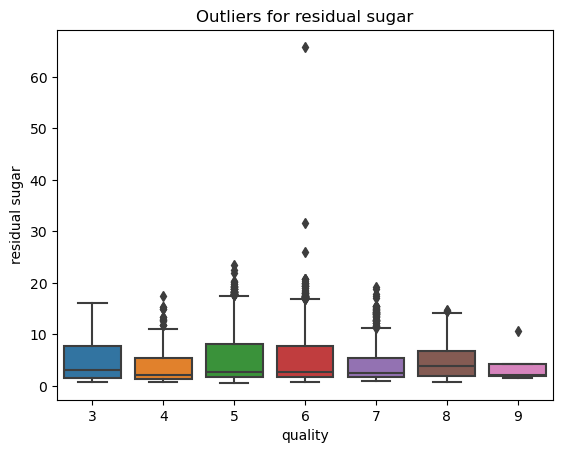

<Figure size 400x600 with 0 Axes>

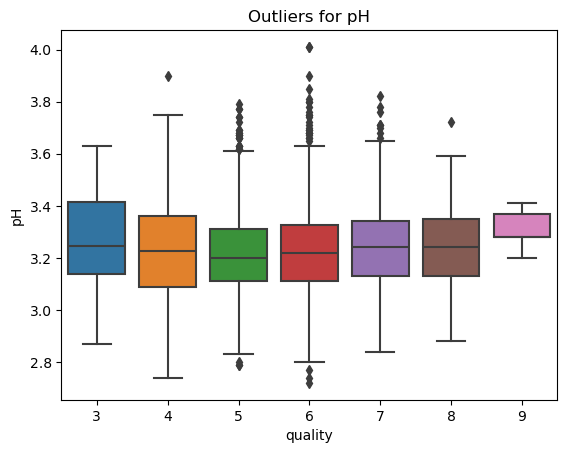

<Figure size 400x600 with 0 Axes>

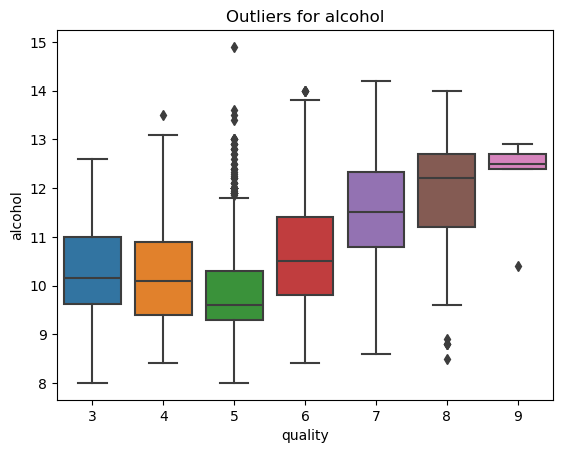

<Figure size 400x600 with 0 Axes>

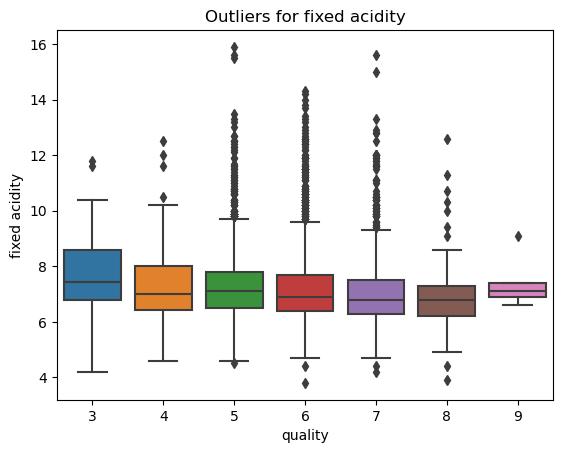

<Figure size 400x600 with 0 Axes>

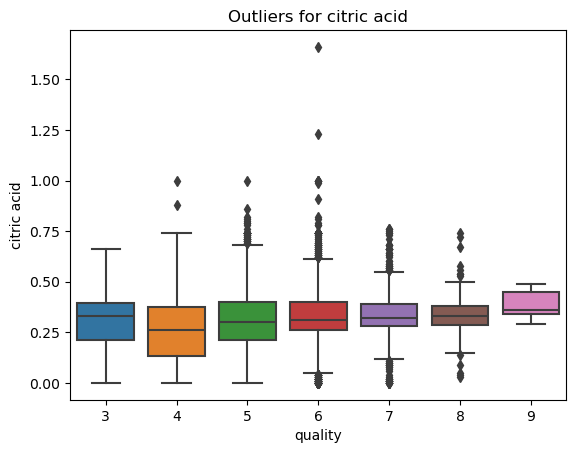

<Figure size 400x600 with 0 Axes>

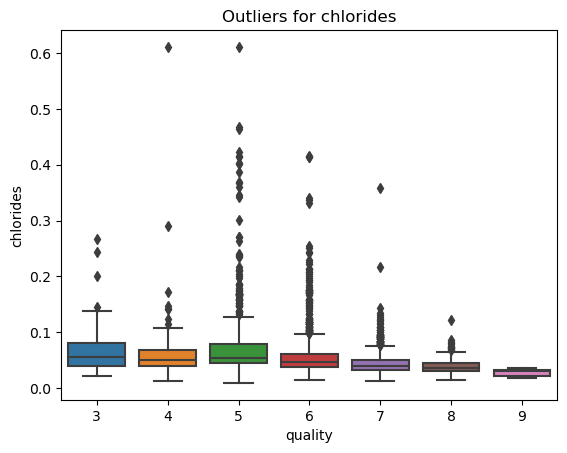

<Figure size 400x600 with 0 Axes>

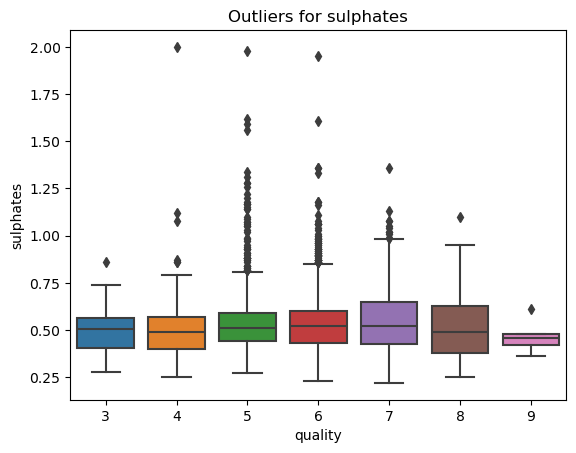

<Figure size 400x600 with 0 Axes>

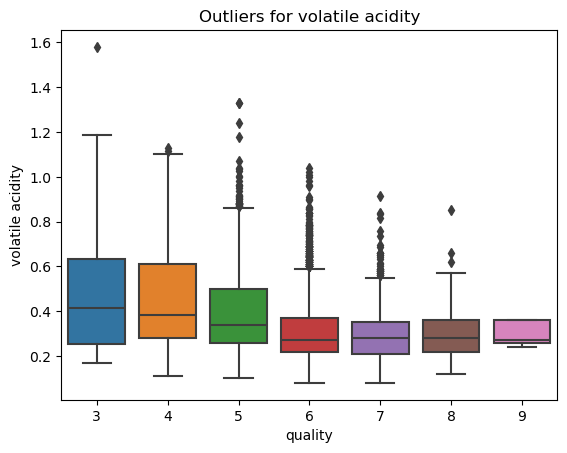

<Figure size 400x600 with 0 Axes>

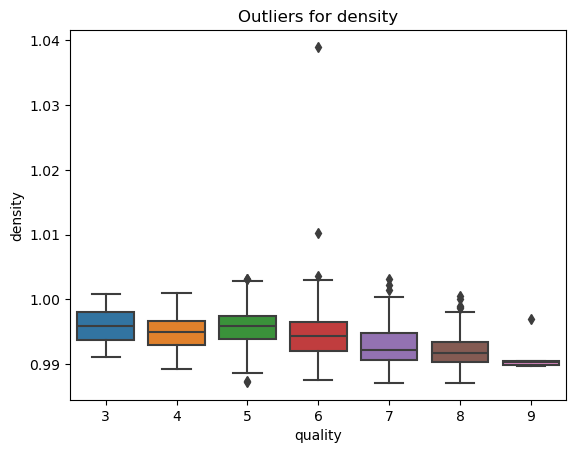

<Figure size 400x600 with 0 Axes>

In [107]:
for col in columns_notype:
    sns.boxplot(df, x = 'quality', y = col)
    plt.title("Outliers for " + col)
    plt.figure(figsize=(4, 6))
    plt.show()

Seeing the Box plots and counts we can deduce that these wine experts have variability in determining the wine to be decent as evident with outlier characteristics between quality rating 5 to 7. Box plots refer to a densly populated outlier areas in the features of **residual sugar**, **chlorides**, **citric acid**, **density**, **sulfur dioxide ratio**, **fixed acidity**, **volatile acidity**, **sulphates**, **pH**, and **alcohol**. The feature for **density** also has additional clumping when considering outliers for quality rating of 8. This makes it seem that the dataset's wine experts somewhat vary in picking ratings 5 to 7 for most these features

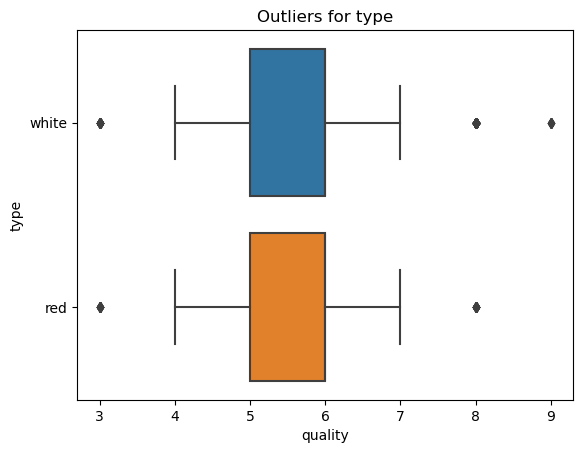

<Figure size 400x600 with 0 Axes>

In [109]:
sns.boxplot(df, x = 'quality', y = 'type')
plt.title("Outliers for " + 'type')
plt.figure(figsize=(4, 6))
plt.show()

The Box plot above would also suggest that white wine have some outliers of picking rating of 9. Although both distributions have similar sentiment of medians and IQR. At the very least, both white and red wines have similar variances.

In [111]:
df.groupby('quality')['type'].agg(['count'])

count
quality       
3           30
4          206
5         1752
6         2323
7          856
8          148
9            5

Looking at the counts, we barely have samples to assess the characteristics of a wine that is considered a rating of '9' with only sample count of **5**, let's remove that and consider that particular quality rating of 9 as an outlier. We might increase error rate of particular features as a defining feature that associates with the quality of rating '9'.

In [113]:
scaled_df = scaled_df[scaled_df['quality'] != 9]
df = df[df['quality'] != 9]

We shall therefore drop the rows that contain the quality rating of '9'

In [115]:
df_white = scaled_df[scaled_df.type=="white"].copy()
df_red = scaled_df[scaled_df.type=="red"].copy()

Let's see how characteristics get more emphasized if we scope our data more into specific types of wine color in a latter discussion. This should be the end of Data Preprocessing and we shall further explore the data

<h1 style="color:blue;text-shadow: 1px 1px 3px cyan, -1px -1px 3px cyan; ">Exploratory Data Analysis</h1>



## 1.) Do any of the assumed independent variables have a correlation to the quality of the wine?

In [119]:
correlation_matrix = scaled_df[scaled_df.columns[1:]].corr()
formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")
formatted_matrix

C:\Users\Paul Josef\AppData\Local\Temp\ipykernel_20664\3636810044.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")


fixed acidity volatile acidity citric acid  \
fixed acidity                1.000            0.215       0.330   
volatile acidity             0.215            1.000      -0.384   
citric acid                  0.330           -0.384       1.000   
residual sugar              -0.105           -0.164       0.146   
chlorides                    0.289            0.368       0.056   
density                      0.478            0.309       0.095   
pH                          -0.271            0.247      -0.345   
sulphates                    0.305            0.228       0.060   
alcohol                     -0.102           -0.065      -0.006   
sulfur dioxide ratio         0.112            0.183      -0.142   
quality                     -0.081           -0.266       0.097   

                     residual sugar chlorides density      pH sulphates  \
fixed acidity                -0.105     0.289   0.478  -0.271     0.305   
volatile acidity             -0.164     0.368   0.309   0.247     0.228   
citric acid                   0.146     0.056   0.095  -0.345     0.060   
residual sugar                1.000    -0.123   0.521  -0.234    -0.175   
chlorides                    -0.123     1.000   0.371   0.026     0.405   
density                       0.521     0.371   1.000   0.035     0.283   
pH                           -0.234     0.026   0.035   1.000     0.168   
sulphates                    -0.175     0.405   0.283   0.168     1.000   
alcohol                      -0.305    -0.269  -0.667   0.097    -0.017   
sulfur dioxide ratio         -0.120     0.165   0.098   0.185     0.193   
quality                      -0.056    -0.201  -0.325   0.038     0.044   

                     alcohol sulfur dioxide ratio quality  
fixed acidity         -0.102                0.112  -0.081  
volatile acidity      -0.065                0.183  -0.266  
citric acid           -0.006               -0.142   0.097  
residual sugar        -0.305               -0.120  -0.056  
chlorides             -0.269                0.165  -0.201  
density               -0.667                0.098  -0.325  
pH                     0.097                0.185   0.038  
sulphates             -0.017                0.193   0.044  
alcohol                1.000                0.081   0.468  
sulfur dioxide ratio   0.081                1.000   0.125  
quality                0.468                0.125   1.000

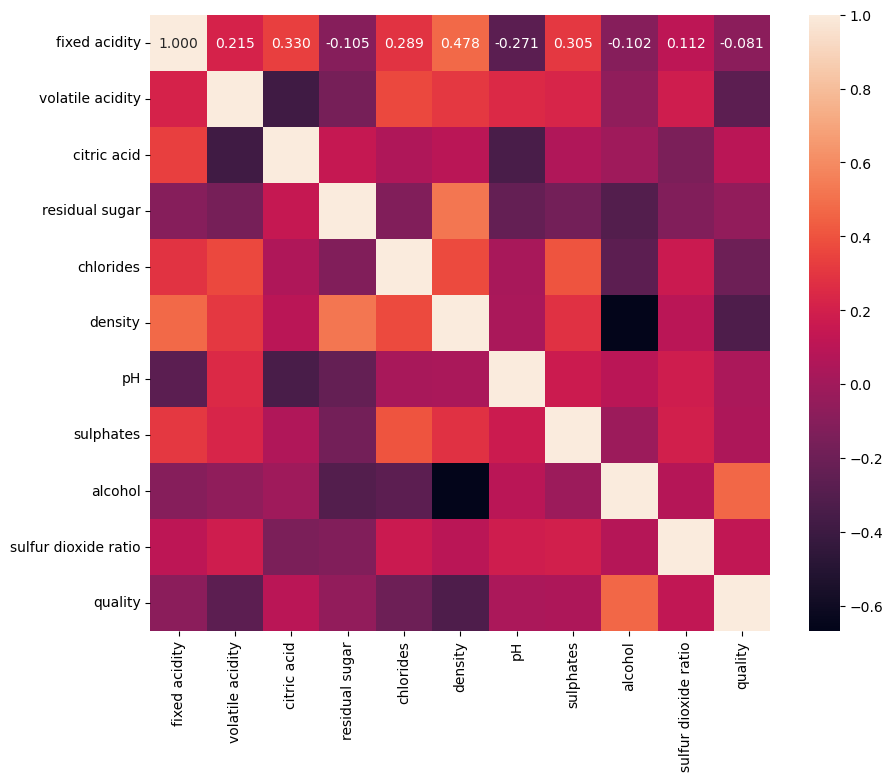

In [120]:
plt.figure(figsize =(10,8))
plot = sns.heatmap(correlation_matrix, annot = True, fmt=".3f")

Looking at the heatmap for the entire red and white wine dataset, it seems that only alcohol has a correlation to the quality of wine (coefficient of 0.468).

However, we can investigate more on this by analyzing the features by its group. (red and white wine respectively)

Its components as well resemble multicollinearity among other features:

- **`fixed acidity`**          has relatively high  **(0.48)**         positive correlation to density
- **`volatile acidity`**       has relatively high  **(-0.3 to -0.4)** negative correlation to total sulfur dioxide, free sulfur dioxide, and citric acid
- **`citric acid`**         has relatively high  **(-0.3 to -0.4)**    negative correlation to pH and citric acid. It also has positive correlation to fixed acidity **(0.33)**
- **`residual sugar`**         has relatively high  **(0.521)**        positive correlation to density, but has some negative correlation alcohol **(-0.305)**
- **`chlorides`** 	           has relatively high  **(0.3-0.4)**      positive correlation to volatile acidity, density, sulphates
- **`density`** 	           has relatively high  **(0.3-0.4)**      positive correlation to residual sugar, fixed acidity, volatile acidity, chlorides
- **`pH`**                     has relatively high  **(-0.3 to -0.4)** negative correlation to citric acid
- **`sulphates`**              has relatively high  **(0.3-0.4)**      positive correlation to fixed acidity, and chlorides
- **`alcohol`**                has very high        **(-0.67)**        negative correlation to density
- **`sulfur dioxide ratio`**   has relatively small **(0-0.2)**        correlation to all features
- **`quality`**                has relatively high  **(0.47)**         positive correlation to density, while alcohol contributes relatively high negative correlation at **(0.326)**

With the degree of multicollinearity among our features, this makes it much more necessary for us to find possibilities of dimension reduction.

## 2.) How are the correlation coefficients of each variables of the wine? (grouped by type: white and red)

In [123]:
correlation_matrix = df_white[df_white.columns[1:]].corr()
formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")
formatted_matrix

C:\Users\Paul Josef\AppData\Local\Temp\ipykernel_20664\854185195.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")


fixed acidity volatile acidity citric acid  \
fixed acidity                1.000           -0.019       0.299   
volatile acidity            -0.019            1.000      -0.163   
citric acid                  0.299           -0.163       1.000   
residual sugar               0.083            0.099       0.106   
chlorides                    0.024            0.087       0.133   
density                      0.266            0.061       0.160   
pH                          -0.432           -0.047      -0.183   
sulphates                   -0.017           -0.021       0.050   
alcohol                     -0.111            0.047      -0.077   
sulfur dioxide ratio        -0.145           -0.209       0.014   
quality                     -0.129           -0.193       0.005   

                     residual sugar chlorides density      pH sulphates  \
fixed acidity                 0.083     0.024   0.266  -0.432    -0.017   
volatile acidity              0.099     0.087   0.061  -0.047    -0.021   
citric acid                   0.106     0.133   0.160  -0.183     0.050   
residual sugar                1.000     0.076   0.820  -0.165    -0.020   
chlorides                     0.076     1.000   0.252  -0.090     0.018   
density                       0.820     0.252   1.000  -0.063     0.082   
pH                           -0.165    -0.090  -0.063   1.000     0.142   
sulphates                    -0.020     0.018   0.082   0.142     1.000   
alcohol                      -0.398    -0.356  -0.760   0.092    -0.022   
sulfur dioxide ratio          0.054    -0.026  -0.072  -0.014    -0.051   
quality                      -0.117    -0.216  -0.337   0.122     0.055   

                     alcohol sulfur dioxide ratio quality  
fixed acidity         -0.111               -0.145  -0.129  
volatile acidity       0.047               -0.209  -0.193  
citric acid           -0.077                0.014   0.005  
residual sugar        -0.398                0.054  -0.117  
chlorides             -0.356               -0.026  -0.216  
density               -0.760               -0.072  -0.337  
pH                     0.092               -0.014   0.122  
sulphates             -0.022               -0.051   0.055  
alcohol                1.000                0.061   0.461  
sulfur dioxide ratio   0.061                1.000   0.208  
quality                0.461                0.208   1.000

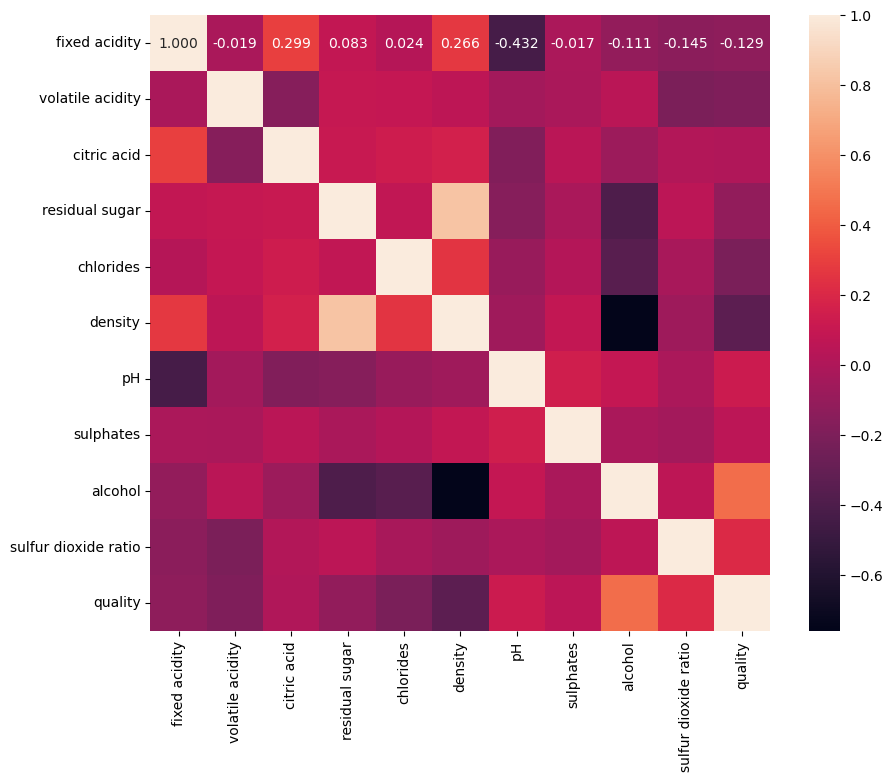

In [124]:
plt.figure(figsize =(10,8))
plot = sns.heatmap(correlation_matrix, annot = True, fmt=".3f")

Looking at the heatmap for white wine dataset, the numerical correlation to the quality is alcohol, with wine slightly less than the entire dataset. (coefficient of 0.463)


Its components as well resemble multicollinearity that is notable among other features:

- **`fixed acidity`**          has relatively high  **(-0.431)**   negative correlation to pH; density has been lowered and is moderately positively correlated **(0.266)**
- **`volatile acidity`**       has relatively small **(0-0.2)**    correlations, highest numerical one is a negative corr of **-0.208** from sulfur dioxide ratio
- **`citric acid`**            has relatively high  **(0.299)**    positive correlation to fixed acidity. 
- **`residual sugar`**         has relatively high  **(0.3-0.5)**  positive correlation to free sulfur dioxide total sulfur dioxide density
- **`chlorides`** 	           has relatively high  **(-0.357)**   negative correlation to alcohol
- **`density`** 	           has very high        **(0.82)**     positive correlation to residual sugar and strong negative correlation to alcohol **(-0.76)**
- **`pH`**                     has relatively high  **(-0.431)**   negative correlation to fixed acidity
- **`sulphates`**              has relatively small **(0.142)**    positive correlation to pH
- **`alcohol`**                has very high        **(-0.76)**     negative correlation to density
- **`sulfur dioxide ratio`**   has relatively small **(0-0.2)**    correlation to all features
- **`quality`**                has relatively high  **(0.463)**     positive correlation to alcohol, while density contributes relatively high negative correlation at **(-0.338)**


<b>Interpretations with Previous Correlation Matrix of Both Types in Mind:</b>
- Scoping our data to the white wine type, density correlation to fixed acidity is lower, volatile acidity has been higher.
- Volatile acidity correlations to other features seem to have been lowered in comparison to our previous matrix of the whole dataset. Making its correlation to the rest to be weak
- Citric acid has lower correlatability, previous features exhibit lower negative correlation to this feature.
- Residual Sugar extremely exhibits **strong positive correlation (0.82)** to the density feature.
- Chlorides tend has some level of negative correlation to alcohol content
- Density as mentioned has correlation to chlorides, but also **strong negative correlation (-0.76)** to alcohol as well 
- pH negative correlation for citric acid has been lower while fixed acidity has been more
- Sulphates have relatively small correlation among its features.
- Alcohol still aligns with the previous matrix of having a very strong negative correlation to density
- Sulfur dioxide ratio has very little correlation to other features
- Quality is still the most correlated by both density and alcohol



In [126]:
correlation_matrix = df_red[all_columns[1:]].corr()
formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")
formatted_matrix

C:\Users\Paul Josef\AppData\Local\Temp\ipykernel_20664\925298561.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")


fixed acidity volatile acidity citric acid  \
fixed acidity                1.000           -0.255       0.667   
volatile acidity            -0.255            1.000      -0.551   
citric acid                  0.667           -0.551       1.000   
residual sugar               0.111           -0.002       0.144   
chlorides                    0.086            0.055       0.210   
density                      0.670            0.024       0.358   
pH                          -0.687            0.247      -0.550   
sulphates                    0.190           -0.257       0.326   
alcohol                     -0.062           -0.198       0.105   
sulfur dioxide ratio        -0.117           -0.085      -0.162   
quality                      0.119           -0.395       0.228   

                     residual sugar chlorides density      pH sulphates  \
fixed acidity                 0.111     0.086   0.670  -0.687     0.190   
volatile acidity             -0.002     0.055   0.024   0.247    -0.257   
citric acid                   0.144     0.210   0.358  -0.550     0.326   
residual sugar                1.000     0.027   0.325  -0.083    -0.012   
chlorides                     0.027     1.000   0.194  -0.271     0.395   
density                       0.325     0.194   1.000  -0.356     0.146   
pH                           -0.083    -0.271  -0.356   1.000    -0.214   
sulphates                    -0.012     0.395   0.146  -0.214     1.000   
alcohol                       0.063    -0.224  -0.505   0.213     0.092   
sulfur dioxide ratio         -0.087    -0.107  -0.261   0.183    -0.003   
quality                       0.014    -0.131  -0.184  -0.055     0.249   

                     alcohol sulfur dioxide ratio quality  
fixed acidity         -0.062               -0.117   0.119  
volatile acidity      -0.198               -0.085  -0.395  
citric acid            0.105               -0.162   0.228  
residual sugar         0.063               -0.087   0.014  
chlorides             -0.224               -0.107  -0.131  
density               -0.505               -0.261  -0.184  
pH                     0.213                0.183  -0.055  
sulphates              0.092               -0.003   0.249  
alcohol                1.000                0.248   0.480  
sulfur dioxide ratio   0.248                1.000   0.192  
quality                0.480                0.192   1.000

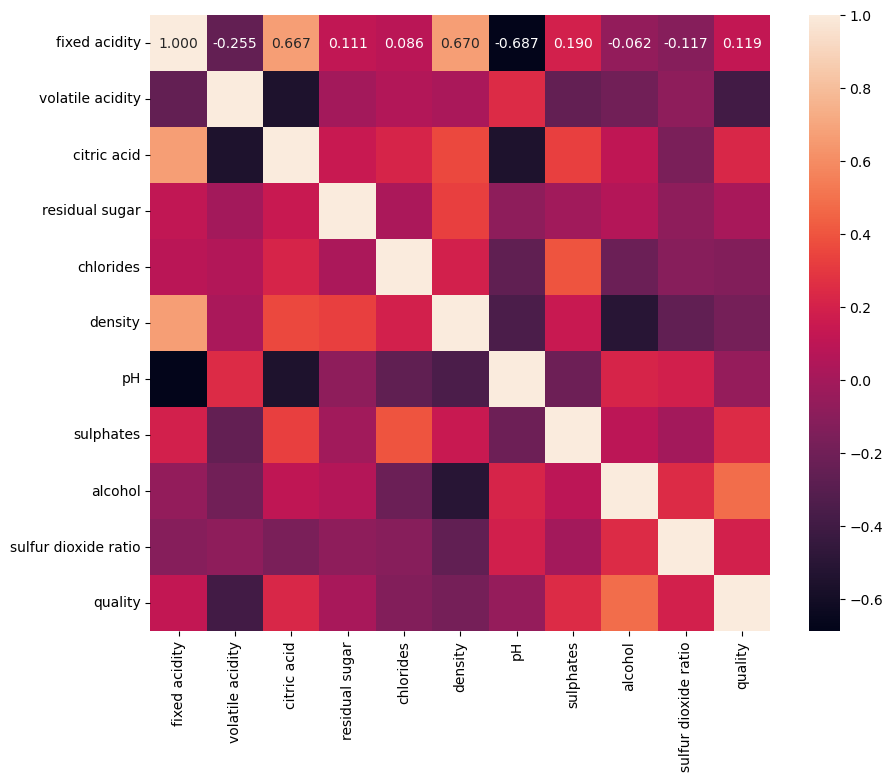

In [127]:
plt.figure(figsize =(10,8))
plot = sns.heatmap(correlation_matrix, annot = True, fmt=".3f")

Looking at the heatmap for red wine dataset, it seems that the highest numerical correlation to the quality is alcohol, with wine slightly more than the entire dataset and white wine. (coefficient of 0.48)


Its components as well resemble multicollinearity that is notable among other features:

- **`fixed acidity`**          has very high        **(0.667)**           positive correlation citric acid; density and pH also exhibits the same degree **(0.67, -0.687)**
- **`volatile acidity`**       has relatively high  **(-0.551)**          negative correlation to citric acid
- **`citric acid`**            has relatively high  **(0.667)**           positive correlation to fixed acidity. pH also exhibits high negative correlation **(-0.55)**
- **`residual sugar`**         has relatively high  **(0.358, 0.326)**    positive correlation to density, sulphates. 
- **`chlorides`** 	           has relatively high  **(0.395)**           positive correlation to sulphates
- **`density`** 	           has relatively high  **(-0.356,-0.505)**   positive correlation to pH and alcohol  
- **`pH`**                     has relatively small **(~0.2)**            correlation to sulphates, alcohol and sulfur dioxide ratio but still has high correlation to fixed acidity and citric acid (**-0.687** and **-0.550**)
- **`sulphates`**              has relatively high  **(0.395)**           positive correlation to chlorides
- **`alcohol`**                has very high        **(-0.505)**          negative correlation to density
- **`sulfur dioxide ratio`**   has relatively small **(~0.2)**            correlation to all features
- **`quality`**                has relatively high  **(0.48)**            positive correlation to alcohol, while density contributes relatively small negative correlation at **(-0.184)**


<b>Interpretations with Previous Correlation Matrix of Red wine in Mind:</b>
- Scoping our data to the red wine type, fixed acidity has been more correlated to citric acid and density. Higher than white wine
- Volatile acidity seems to correlate better negatively in fixed acidity than that of the white matrix correlation
- Citric acid is **triple the correlation** of fixed acidity from the previous matrix of white
- Residual Sugar now seems to exhibit lower correlation density than that of the white data set
- Chlorides correlation to alcohol has been numerically lower, but sulphates seem to 
- Density has a lesser degree of correlation to alcohol but still considered strong
- pH had some increases in its correlation to sulfure dioxide ratio and alcohol
- Sulphates exhibit has a **bigger increase of correlation to chlorides**
- Alcohol still aligns with the previous matrix of having a very strong negative correlation to density, but now has an **increase of correlation to sulfur dioxide ratio**
- Sulfur dioxide ratio has very little correlation to other features, however density had increased negative correlation
- Quality is still the most correlated by alcohol, but density took it smaller, but **volatile acidity becomes the more negatively correlated** agent for quality

### **`Pair Plot`**

Pair plots are used to determine if there is a correlation between variables. By that standard, the following **x** values will be tested with respect to **y**

variables = Alcohol, Chlorides, Citric Acid, Density, Fixed Acidity, Free Sulfur Dioxide, pH, Residual Sugar, Sulphates, Total Sulfur Dioxide, Volatile Acidity


D:\Anaconda Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

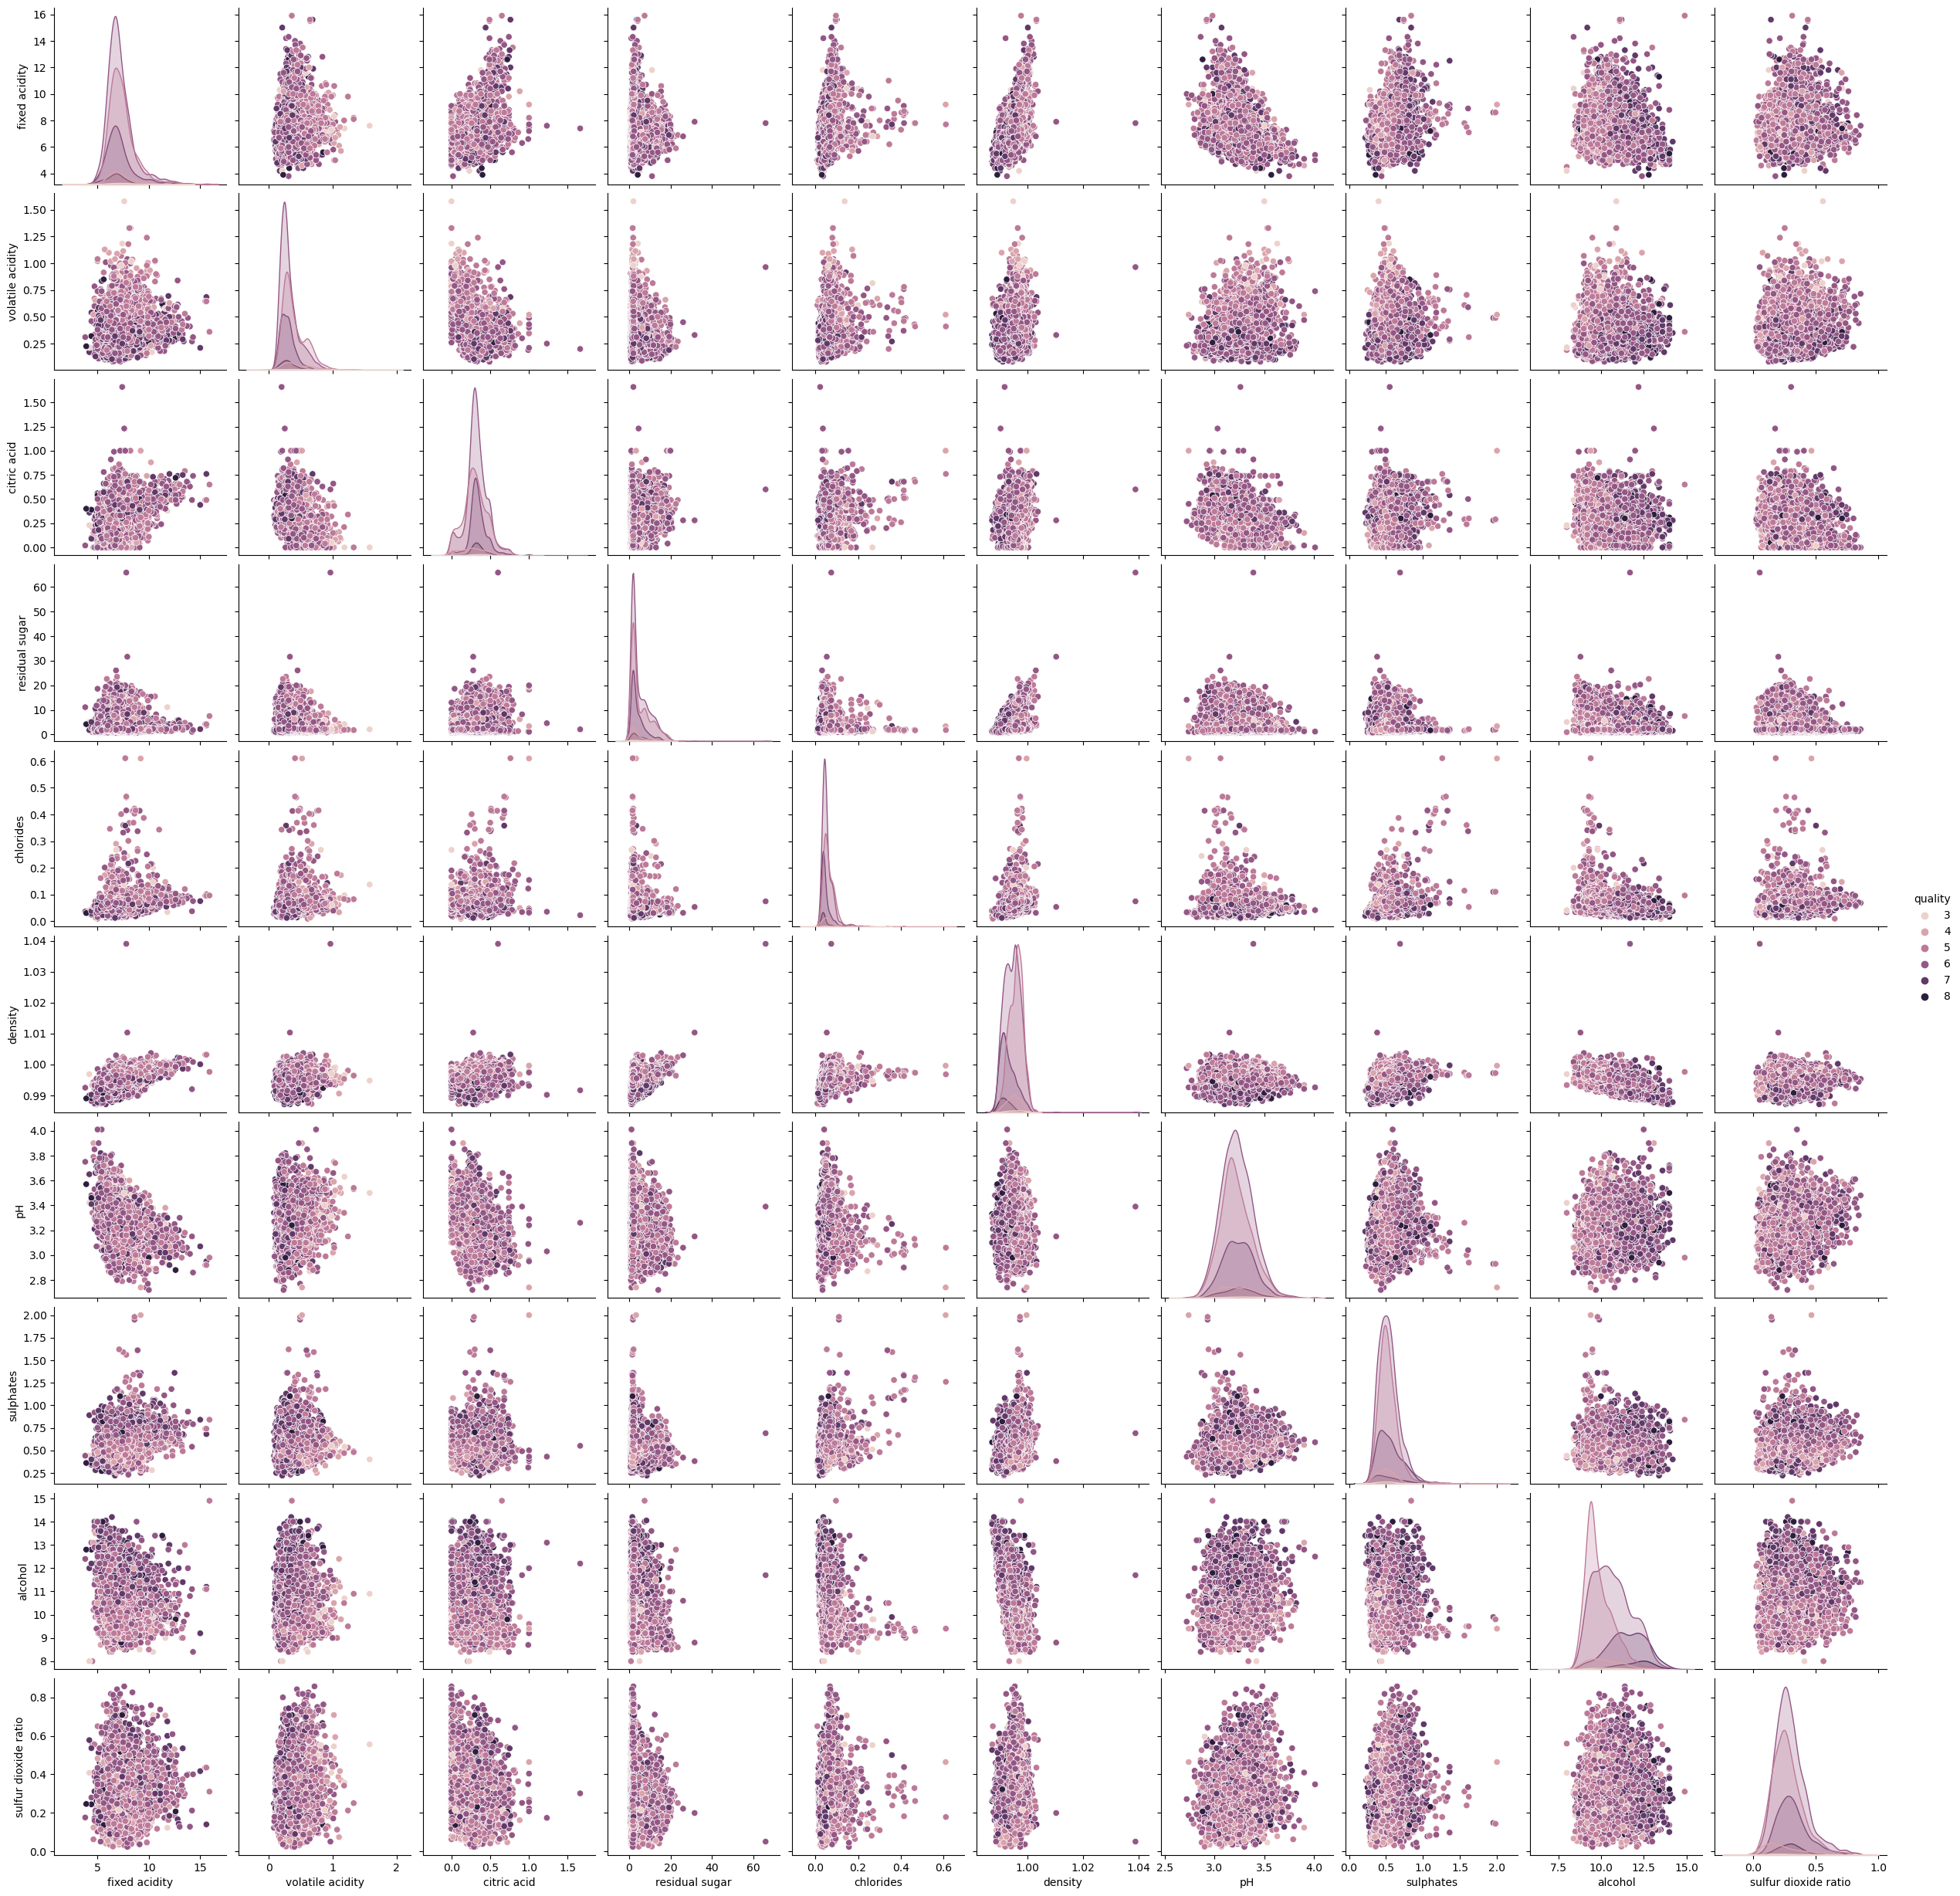

In [130]:
sns.pairplot(df, hue = 'quality')

looking at the scatter plots, it is evident that there is no real correlation between any of the individual variables with the quality of wine

There seems to be a mixture of components at play, With the varying changes of correlations of each features, It can be said that clustering features can be an angle to tackle some of these collinearities

## 3.) Does there exist any skewnewss or range abnormality among the distribution of each variable?

### **`Histogram`**

Histograms are used to determine whether or not data is normally distributed, as such the following columns will be tested. We will be mostly using our standardized Dataframe when exploring.

x = Alcohol, Chlorides, Citric Acid, Density, Fixed Acidity, Sulfur Dioxide Ratio, pH, Residual Sugar, Sulphates, Volatile Acidity

In [134]:
scaled_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5315.000000       5315.000000  5315.000000     5315.000000   
mean       -0.000146          0.000258    -0.000432        0.000194   
std         1.000344          1.000485     1.000348        1.000282   
min        -2.588145         -1.570028    -2.164515       -0.988604   
25%        -0.617772         -0.678405    -0.533454       -0.721923   
50%        -0.163070         -0.262314    -0.057728       -0.521912   
75%         0.367415          0.391543     0.553919        0.544812   
max         6.581671          7.346207     9.116989       13.501067   

         chlorides      density           pH    sulphates      alcohol  \
count  5315.000000  5315.000000  5315.000000  5315.000000  5315.000000   
mean      0.000748     0.000976    -0.000489     0.000423    -0.001294   
std       1.000252     0.999642     1.000337     1.000325     0.999399   
min      -1.293816    -2.504125    -3.146985    -2.092831    -2.149768   
25%      -0.507052    -0.787562    -0.715020    -0.690295    -0.884822   
50%      -0.262884     0.042055    -0.091439    -0.155996    -0.125855   
75%       0.252582     0.753636     0.656858     0.445090     0.717443   
max      15.038318    14.988637     4.897208     9.795325     3.668983   

       sulfur dioxide ratio      quality  
count           5315.000000  5315.000000  
mean              -0.000031     5.792662  
std                1.000272     0.874675  
min               -2.098095     3.000000  
25%               -0.682296     5.000000  
50%               -0.142856     6.000000  
75%                0.501864     6.000000  
max                4.526443     8.000000

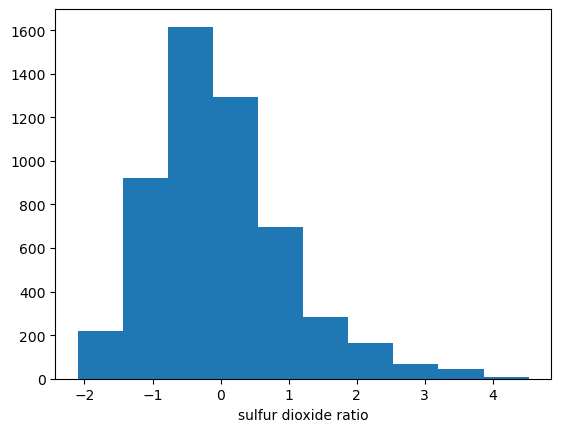

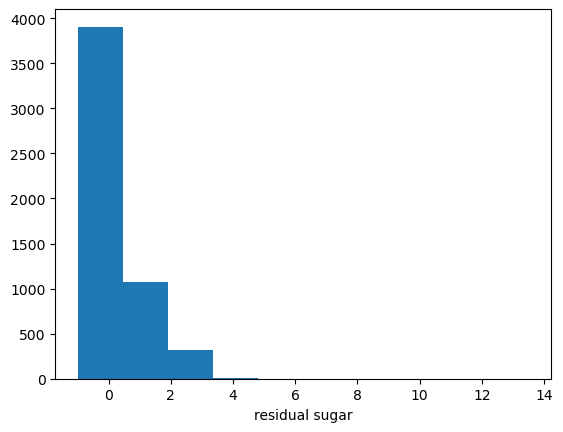

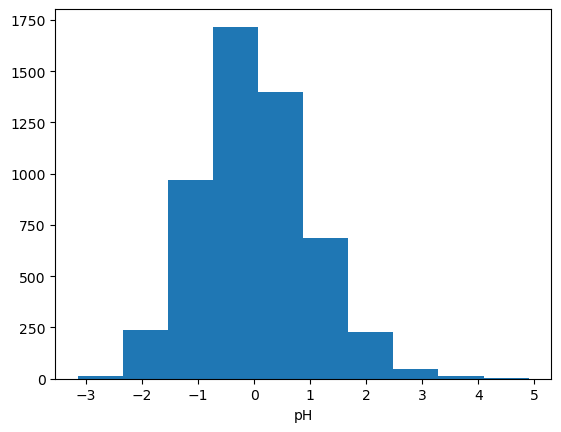

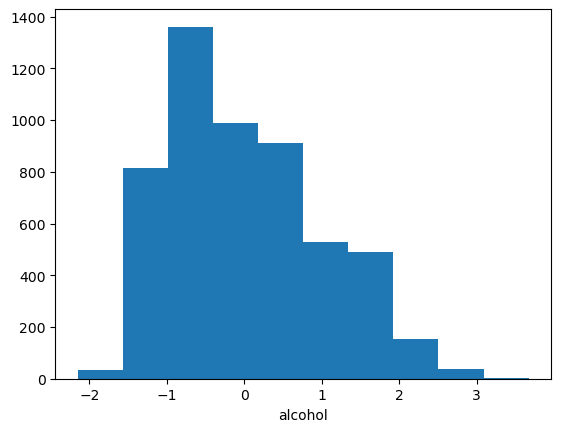

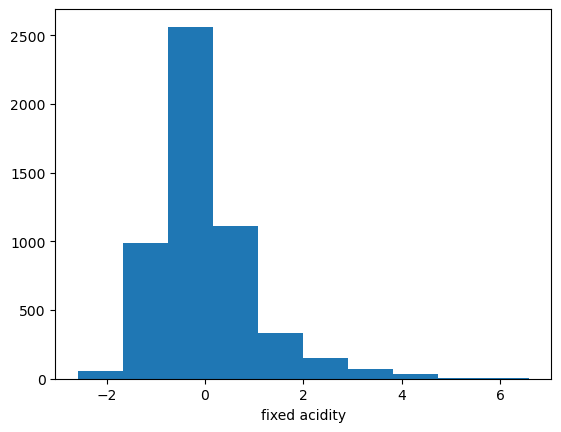

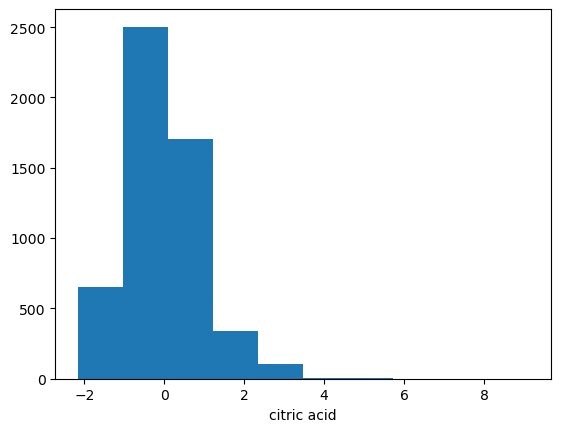

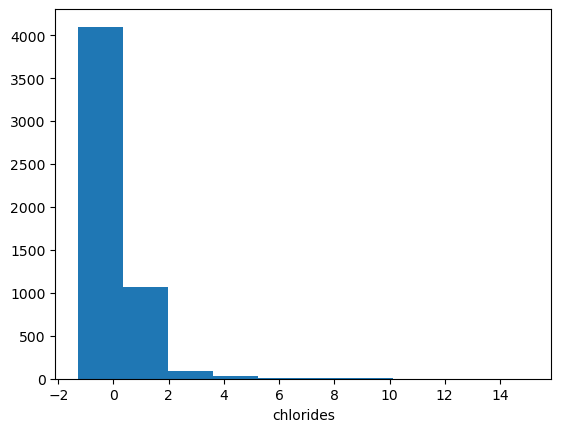

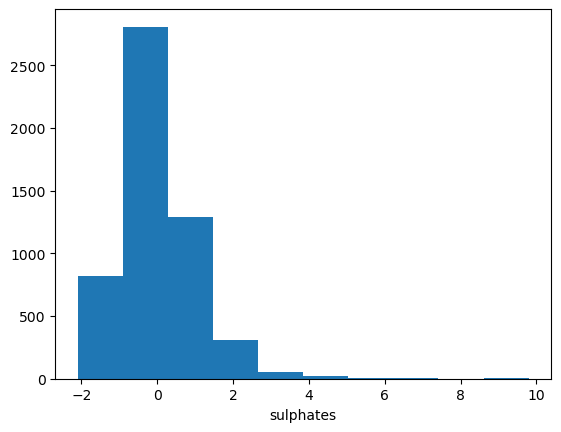

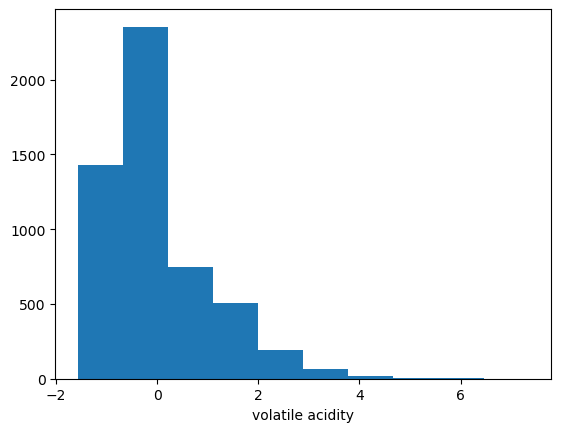

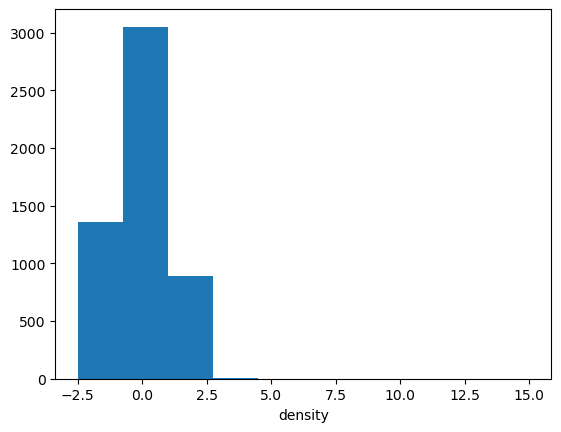

In [135]:
# All Features

for col in columns_notype:
    x= scaled_df[col]
    plt.hist(x)
    plt.xlabel(col)
    plt.show()

Looking at the histograms for all wines:

Apart from the features such as 'pH', the others seem to have some form of positive skewness in their distribution

However, from inspecting the range of both chlorides and sulphates. They seem to be also too varied, the following are the ordered ranges of the top 5 from the features:

- Chlorides have range from (-1.30 to 15.03)
- Density have range from (-2.50 to 14.99 )
- Residual sugar have range from (-0.99	to 13.50 )
- Citric acid have range from (-2.16 to 9.12)
- Sulphates have range from (-2.09 to 9.80)

In [137]:
scaled_df_outliers = scaled_df.groupby("quality")[list(columns_notype)].agg(count_outliers)
scaled_df_outliers_bar_points = scaled_df_outliers.sum().sort_values(ascending=False)
scaled_df_outliers_bar_points

fixed acidity           299
citric acid             297
chlorides               279
volatile acidity        228
sulfur dioxide ratio    178
residual sugar          168
sulphates               137
alcohol                  68
pH                       61
density                  15
dtype: int64

Let's recalculate the number of outliers that are grouped by each quality rating and see if we can do anything about this big range of values.

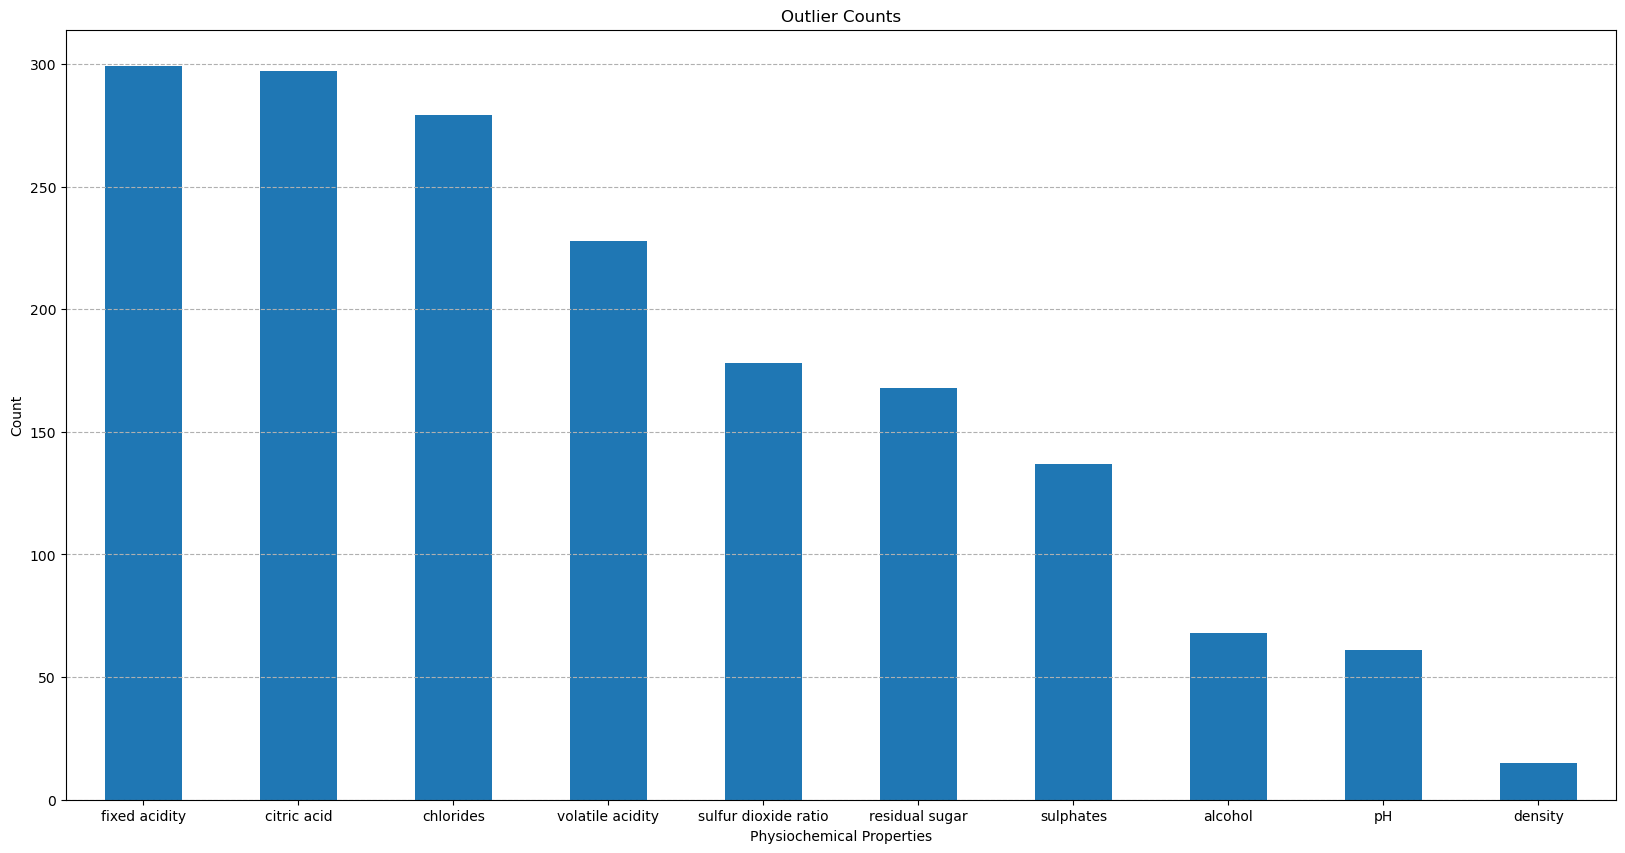

In [139]:
plt.figure(figsize=(20, 10))  
scaled_df_outliers_bar_points.plot(kind='bar', rot=0)   
plt.title('Outlier Counts')
plt.xlabel('Physiochemical Properties')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--') 
plt.show()

- Chlorides have the third highest amount of outliers
- Density have range from only has the smallest amount of outliers
- Residual sugar is the sixth highest
- Citric acid is the second highest of number of outliers
- Sulphates is the 7th highest

Looks like density is the feature with relatively low amount of outliers but very high range. This could indicate that the correlatability to quality can be somewhat supported by how little outliers there are to density. Alcohol and pH seem to also indicate that their outliers have some degree of effect to the correlation to quality. 

With acids being at the top of being outliers, this could mean that the wine experts are not entirely conscious in relating their tastes to acids. These could be compositional "just a matter of" occurence when they taste such. At the lower end of the outlier spectrum (residual sugar, sulphates, alcohol, pH, density), wine experts seem to be more intent on the effects of these features (ie. sugar and density for sweetness). The level sulphates, alcohol, pH has not been necessarily founded to be correlated to strong scents and aroma, outliers present in these may need be further contextualized when accounting for the other features in the higher end of outliers(fixed acidity, citric acid, chlorides, volatile acidity).

In order to see more defined features, we noticed previously that red and white wine have some differences in how they display correlation to quality. We will be removing outliers respectively to each quality rating present and see defined characteristics present.


### **`Removing Outliers (PreProcessing for next question)`**

In [142]:


all_columns = scaled_df.columns

setLists = []

def remove_outliers_recursive(df, columns):

  if len(columns) ==0:
    return df  # Base case: no more columns to assess

  # Get current column name
  current_col = columns[0]

  # Clean the current column by quality group
  if current_col != "type":

      cleaned_series = df.groupby('quality')[current_col].apply(remove_outliers)

      # Filter DataFrame to keep rows without outliers in the current column
      df_filtered = df[df[current_col].isin(cleaned_series)]

  # Recursive call with filtered DataFrame and remaining columns
      return remove_outliers_recursive(df_filtered, columns[1:])
  else:
      return remove_outliers_recursive(df, columns[1:])


df_final_cleaned_scaled = remove_outliers_recursive(scaled_df.copy()[all_columns], all_columns)
df_final_cleaned_red = remove_outliers_recursive(df_red.copy()[all_columns], all_columns)
df_final_cleaned_white = remove_outliers_recursive(df_white.copy()[all_columns], all_columns)



In [143]:
scaled_df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white      -0.163070         -0.440639     0.282076        3.478304   
1     white      -0.693555         -0.262314     0.146154       -0.766370   
2     white       0.670550         -0.381197     0.553919        0.411472   
3     white      -0.011503         -0.678405     0.010232        0.767046   
4     white      -0.769339         -0.143431    -1.077141        0.433695   
...     ...            ...               ...          ...             ...   
5315    red      -0.314637          1.639816    -1.620828       -0.699699   
5316    red      -0.769339          1.520933    -1.620828       -0.677476   
5317    red      -0.996690          1.223725    -1.484907       -0.633029   
5318    red      -0.996690          1.788420    -1.348985       -0.677476   
5319    red      -0.920906         -0.202872     1.029645       -0.321901   

      chlorides   density        pH  sulphates   alcohol  \
0     -0.317143  2.180171 -1.400959  -0.556721 -1.475130   
1     -0.208624 -0.180525  0.469784  -0.289571 -0.884822   
2     -0.181494  0.190441  0.220351  -0.623508 -0.378844   
3      0.035544  0.359062 -0.216155  -0.890658 -0.547503   
4     -0.317143  0.122993 -0.278513  -0.423146 -0.800493   
...         ...       ...       ...        ...       ...   
5315   0.306842  0.665953  1.218081   1.914413 -0.884822   
5316   0.903697  0.122993  1.405155   0.311515 -0.041525   
5317   0.144063  0.197186  1.841662   1.513689  0.548783   
5318   0.496751  0.315221  2.153452   1.179752 -0.294514   
5319   0.279712  0.321966  1.031007   0.845815  0.380124   

      sulfur dioxide ratio  quality  
0                -0.176994        6  
1                -1.436500        6  
2                 0.176873        6  
3                -0.272404        6  
4                -0.527250        6  
...                    ...      ...  
5315              3.571359        6  
5316              3.495387        5  
5317              3.792574        6  
5318              3.495387        5  
5319              1.123957        6  

[5315 rows x 12 columns]

In [144]:
scaled_df.info()
df_final_cleaned_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5315 entries, 0 to 5319
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5315 non-null   object 
 1   fixed acidity         5315 non-null   float64
 2   volatile acidity      5315 non-null   float64
 3   citric acid           5315 non-null   float64
 4   residual sugar        5315 non-null   float64
 5   chlorides             5315 non-null   float64
 6   density               5315 non-null   float64
 7   pH                    5315 non-null   float64
 8   sulphates             5315 non-null   float64
 9   alcohol               5315 non-null   float64
 10  sulfur dioxide ratio  5315 non-null   float64
 11  quality               5315 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 539.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4571 entries, 1 to 5319
Data columns (total 12 columns):
 #   Column      

In [145]:
scaled_df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white      -0.163070         -0.440639     0.282076        3.478304   
1     white      -0.693555         -0.262314     0.146154       -0.766370   
2     white       0.670550         -0.381197     0.553919        0.411472   
3     white      -0.011503         -0.678405     0.010232        0.767046   
4     white      -0.769339         -0.143431    -1.077141        0.433695   
...     ...            ...               ...          ...             ...   
5315    red      -0.314637          1.639816    -1.620828       -0.699699   
5316    red      -0.769339          1.520933    -1.620828       -0.677476   
5317    red      -0.996690          1.223725    -1.484907       -0.633029   
5318    red      -0.996690          1.788420    -1.348985       -0.677476   
5319    red      -0.920906         -0.202872     1.029645       -0.321901   

      chlorides   density        pH  sulphates   alcohol  \
0     -0.317143  2.180171 -1.400959  -0.556721 -1.475130   
1     -0.208624 -0.180525  0.469784  -0.289571 -0.884822   
2     -0.181494  0.190441  0.220351  -0.623508 -0.378844   
3      0.035544  0.359062 -0.216155  -0.890658 -0.547503   
4     -0.317143  0.122993 -0.278513  -0.423146 -0.800493   
...         ...       ...       ...        ...       ...   
5315   0.306842  0.665953  1.218081   1.914413 -0.884822   
5316   0.903697  0.122993  1.405155   0.311515 -0.041525   
5317   0.144063  0.197186  1.841662   1.513689  0.548783   
5318   0.496751  0.315221  2.153452   1.179752 -0.294514   
5319   0.279712  0.321966  1.031007   0.845815  0.380124   

      sulfur dioxide ratio  quality  
0                -0.176994        6  
1                -1.436500        6  
2                 0.176873        6  
3                -0.272404        6  
4                -0.527250        6  
...                    ...      ...  
5315              3.571359        6  
5316              3.495387        5  
5317              3.792574        6  
5318              3.495387        5  
5319              1.123957        6  

[5315 rows x 12 columns]

In [147]:
all_indexes = df_final_cleaned_scaled.index  
filtered_df_orig_raw = df_whole_with_reset_index.loc[all_indexes]
filtered_df_orig_raw

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            6.2             0.320         0.16             7.0   
5     white            8.1             0.220         0.43             1.5   
...     ...            ...               ...          ...             ...   
5307    red            7.2             0.390         0.44             2.6   
5308    red            7.5             0.310         0.41             2.4   
5310    red            7.2             0.660         0.33             2.5   
5311    red            6.6             0.725         0.20             7.8   
5319    red            6.0             0.310         0.47             3.6   

      chlorides  density    pH  sulphates  alcohol  sulfur dioxide ratio  \
1         0.049  0.99400  3.30       0.49      9.5              0.106061   
2         0.050  0.99510  3.26       0.44     10.1              0.309278   
3         0.058  0.99560  3.19       0.40      9.9              0.252688   
4         0.045  0.99490  3.18       0.47      9.6              0.220588   
5         0.044  0.99380  3.22       0.45     11.0              0.217054   
...         ...      ...   ...        ...      ...                   ...   
5307      0.066  0.99494  3.30       0.84     11.5              0.458333   
5308      0.065  0.99492  3.34       0.85     11.4              0.566667   
5310      0.068  0.99414  3.27       0.78     12.8              0.333333   
5311      0.073  0.99770  3.29       0.54      9.2              0.367089   
5319      0.067  0.99549  3.39       0.66     11.0              0.428571   

      quality  
1           6  
2           6  
3           6  
4           6  
5           6  
...       ...  
5307        6  
5308        6  
5310        6  
5311        5  
5319        6  

[4571 rows x 12 columns]

In [148]:
scaled_diff = scaled_df['type'].count()-df_final_cleaned_scaled['type'].count()
scaled_diff

744

When removing outliers from both white wine and red wine dataset, we are met with removing **744** observations in the dataset

In [150]:
red_diff = df_red['type'].count()-df_final_cleaned_red['type'].count()
red_diff

277

When removing outliers from only red wine dataset, we are met with removing **277** observations in the dataset.

In [152]:
white_diff = df_white['type'].count()-df_final_cleaned_white['type'].count()
white_diff

437

When removing outliers from only white wine dataset, we are met with removing **437** observations in the dataset.

In [154]:
seperated_total_diff = white_diff+red_diff

labels = ["Whole", "Red", "White", "Separated Total"]
my_array = np.array([scaled_diff, red_diff, white_diff, seperated_total_diff])

series = pd.Series(my_array, index=labels)
series

Whole              744
Red                277
White              437
Separated Total    714
dtype: int64

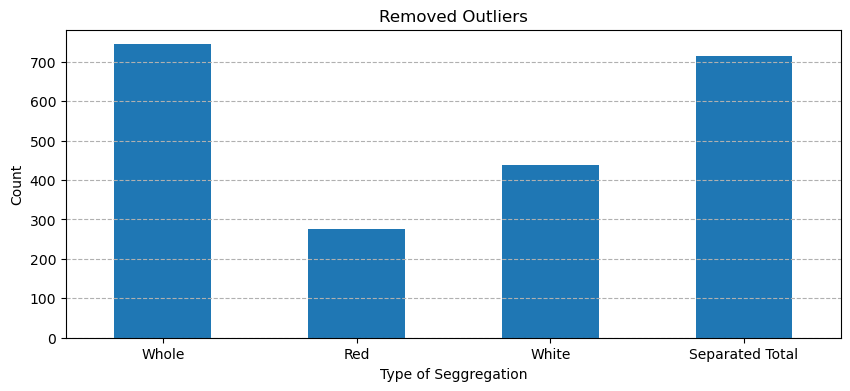

In [155]:
plt.figure(figsize=(10, 4))  
series.plot(kind='bar', rot=0)   
plt.title('Removed Outliers')
plt.xlabel('Type of Seggregation')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--') 
plt.show()

- "Whole" indicates removing outliers accoutning both Red and White wine is in the data set
- "Separated Total" indicates removing outlier first in the Red wine and White wine and adding them together

The "Whole" and "Separated Total" outliers are about roughly the same. We would choose seggregating to Red and White wines first as the previous exploratory analysis seem to indicate some differences of correlation that we would need to explore more on later.

## 4.) Does removing the outlier change noticeably the correlations of the variables between red and white wine datasets to the quality?

In [158]:
corr_white = df_final_cleaned_white[all_columns[1:]].corr()
formatted_matrix = corr_white.applymap(lambda x: f"{x:.3f}")
formatted_matrix

C:\Users\Paul Josef\AppData\Local\Temp\ipykernel_20664\1233738612.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_matrix = corr_white.applymap(lambda x: f"{x:.3f}")


fixed acidity volatile acidity citric acid  \
fixed acidity                1.000           -0.050       0.311   
volatile acidity            -0.050            1.000      -0.200   
citric acid                  0.311           -0.200       1.000   
residual sugar               0.061            0.074       0.094   
chlorides                    0.094            0.012       0.033   
density                      0.251            0.007       0.137   
pH                          -0.400           -0.047      -0.149   
sulphates                   -0.020           -0.036       0.069   
alcohol                     -0.098            0.072      -0.035   
sulfur dioxide ratio        -0.114           -0.192       0.017   
quality                     -0.119           -0.151       0.035   

                     residual sugar chlorides density      pH sulphates  \
fixed acidity                 0.061     0.094   0.251  -0.400    -0.020   
volatile acidity              0.074     0.012   0.007  -0.047    -0.036   
citric acid                   0.094     0.033   0.137  -0.149     0.069   
residual sugar                1.000     0.241   0.815  -0.165    -0.013   
chlorides                     0.241     1.000   0.489   0.003     0.078   
density                       0.815     0.489   1.000  -0.042     0.102   
pH                           -0.165     0.003  -0.042   1.000     0.136   
sulphates                    -0.013     0.078   0.102   0.136     1.000   
alcohol                      -0.422    -0.539  -0.797   0.056    -0.060   
sulfur dioxide ratio          0.092    -0.093  -0.039  -0.016    -0.046   
quality                      -0.123    -0.306  -0.348   0.118     0.046   

                     alcohol sulfur dioxide ratio quality  
fixed acidity         -0.098               -0.114  -0.119  
volatile acidity       0.072               -0.192  -0.151  
citric acid           -0.035                0.017   0.035  
residual sugar        -0.422                0.092  -0.123  
chlorides             -0.539               -0.093  -0.306  
density               -0.797               -0.039  -0.348  
pH                     0.056               -0.016   0.118  
sulphates             -0.060               -0.046   0.046  
alcohol                1.000                0.063   0.465  
sulfur dioxide ratio   0.063                1.000   0.209  
quality                0.465                0.209   1.000

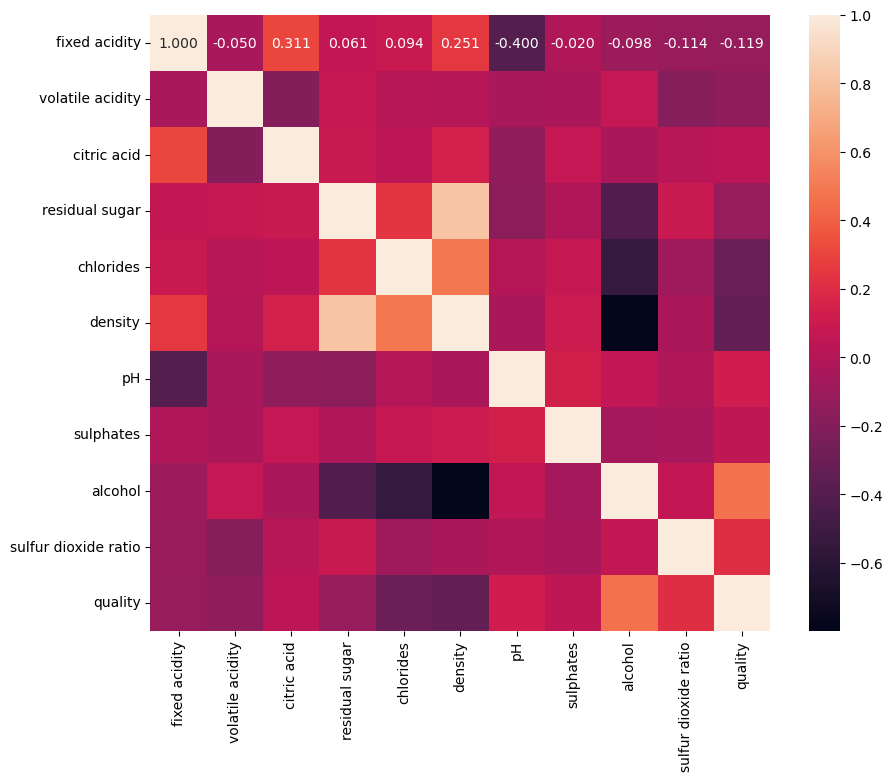

In [159]:
plt.figure(figsize =(10,8))
plot = sns.heatmap(corr_white, annot = True, fmt=".3f")

In [160]:
corr_red = df_final_cleaned_red[all_columns[1:]].corr()
formatted_matrix = corr_red.applymap(lambda x: f"{x:.3f}")
formatted_matrix

C:\Users\Paul Josef\AppData\Local\Temp\ipykernel_20664\3712577894.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_matrix = corr_red.applymap(lambda x: f"{x:.3f}")


fixed acidity volatile acidity citric acid  \
fixed acidity                1.000           -0.264       0.678   
volatile acidity            -0.264            1.000      -0.602   
citric acid                  0.678           -0.602       1.000   
residual sugar               0.222            0.065       0.137   
chlorides                    0.184            0.146       0.081   
density                      0.640            0.056       0.321   
pH                          -0.699            0.233      -0.519   
sulphates                    0.182           -0.355       0.284   
alcohol                     -0.061           -0.227       0.122   
sulfur dioxide ratio        -0.123           -0.104      -0.135   
quality                      0.095           -0.402       0.220   

                     residual sugar chlorides density      pH sulphates  \
fixed acidity                 0.222     0.184   0.640  -0.699     0.182   
volatile acidity              0.065     0.146   0.056   0.233    -0.355   
citric acid                   0.137     0.081   0.321  -0.519     0.284   
residual sugar                1.000     0.248   0.390  -0.066     0.012   
chlorides                     0.248     1.000   0.421  -0.173    -0.119   
density                       0.390     0.421   1.000  -0.285     0.035   
pH                           -0.066    -0.173  -0.285   1.000     0.006   
sulphates                     0.012    -0.119   0.035   0.006     1.000   
alcohol                       0.057    -0.338  -0.554   0.154     0.329   
sulfur dioxide ratio         -0.159    -0.193  -0.294   0.184     0.157   
quality                      -0.042    -0.254  -0.265  -0.063     0.454   

                     alcohol sulfur dioxide ratio quality  
fixed acidity         -0.061               -0.123   0.095  
volatile acidity      -0.227               -0.104  -0.402  
citric acid            0.122               -0.135   0.220  
residual sugar         0.057               -0.159  -0.042  
chlorides             -0.338               -0.193  -0.254  
density               -0.554               -0.294  -0.265  
pH                     0.154                0.184  -0.063  
sulphates              0.329                0.157   0.454  
alcohol                1.000                0.303   0.528  
sulfur dioxide ratio   0.303                1.000   0.238  
quality                0.528                0.238   1.000

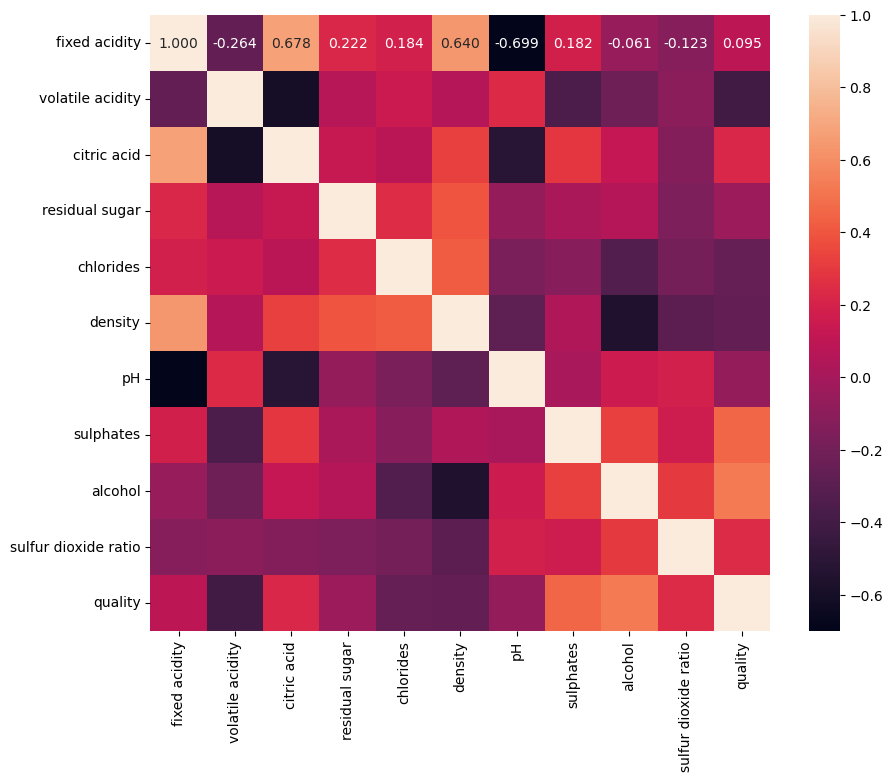

In [161]:
plt.figure(figsize =(10,8))
plot = sns.heatmap(corr_red, annot = True, fmt=".3f")

Observing the new heatmaps, it can be seen that there was a change in the correlation coefficient.

For White Wine:
Although alcohol is still the only feature that is moderately correlated, its factor changed from 0.463 to 0.465

As for Red Wine:

citric acid remains to be weakly correlated to quality with a factor of 0.215

However, we can observe a significant effect with sulphates having a weak correlation of 0.249 to now having a moderate correlation to the quality of the red wine with its new coefficient of 0.451


the alcohol feature also increased from a 0.480 to a 0.528 correlation factor.


- In the previous matrices and comparisons, white wine have density and alcohol as one of the highest numerical indicators of correlation, the white wine matrix slightly improved that notion **(-0.338 to -0.348)** that density is negatively correlated
- In the previous matrices and comparisons, red wine have volatile acidity and alcohol as one of the highest numerical indicators of correlation, the feature for density's negative correlation is also improved slightly from **(-0.184 to -0.265).**

### **`Testing the Differences between Features of Red and White Wine`**

In [164]:
def fisher_z(r):
    return 0.5 * np.log((1 + r) / (1 - r))

The Fisher Z transformation lets us compare each type of wine's sample correlation with the use of Fisher Z coefficient to another and see if they are statistically different from one another. These transformation would lead us to use Z-test to further see any significant changes that occur between the correlations of white wine and red wine. We will be using alpha level 0.05, with our null hypothesis being all correlation coefficients of white and red wine have no significant difference among each other

In [166]:
def get_quality_correlations(corr_matrix, prop):
    corr_quality = corr_matrix[prop]
    corr_quality = corr_quality[corr_quality.index != prop]  
    return corr_quality

This function selects strictly the correlation coefficient of the feature to the 'quality' column

In [168]:
red_count = 1082
white_count = 3519

SE = np.sqrt(1/(red_count - 3) + 1/(white_count - 3))

This is the Standard Error when accounting for the variance in Fisher Z is how

In [170]:
corr_red_noQ = corr_red[columns_notype]
corr_white_noQ = corr_white[columns_notype]
spec_prop = columns_notype


corr_red_noQ = pd.DataFrame()  
corr_white_noQ = pd.DataFrame()
z_corr_white_quality = pd.DataFrame()  
z_corr_red_quality = pd.DataFrame()
for prop in spec_prop:
    corr_red_noQ[prop] = get_quality_correlations(corr_red.copy(), prop)
    corr_white_noQ[prop] = get_quality_correlations(corr_white.copy(), prop)
    z_corr_white_quality[prop] = corr_red_noQ[prop].apply(fisher_z)
    z_corr_red_quality[prop] = corr_white_noQ[prop].apply(fisher_z)

z_corr_white_quality = z_corr_white_quality.dropna()
z_corr_red_quality = z_corr_red_quality.dropna()



Here we seperate the correlation matrices and seperate them further by seggregating their respective 'quality' observation. This observation or row contains the correlation coefficients of each feature to quality of the wine. For each feature except 'quality' and 'type' they are stores within the variable of **spec_prop** in order to get the correlations of each feature and be able to statistically test them in the next segment.

In [172]:
for prop in spec_prop:

    z1 = z_corr_white_quality[prop]
    z2 = z_corr_red_quality[prop]

    z_stat,  = (z1 - z2) / SE
    p_value =  2 * (1 - norm.cdf(abs(z_stat)))
    
    print(f"\n{prop.upper()}:")
    print(f"  Z-test results: z-statistic = {z_stat:.3f}, p-value = {p_value:.3f}")
    
    if p_value < 0.05:
        print(f"    Significant difference in correlation with quality between red and white wines.")
    else:
        print(f"    No significant difference in correlation with quality between red and white wines.")


SULFUR DIOXIDE RATIO:
  Z-test results: z-statistic = 0.884, p-value = 0.377
    No significant difference in correlation with quality between red and white wines.

RESIDUAL SUGAR:
  Z-test results: z-statistic = 2.348, p-value = 0.019
    Significant difference in correlation with quality between red and white wines.

PH:
  Z-test results: z-statistic = -5.222, p-value = 0.000
    Significant difference in correlation with quality between red and white wines.

ALCOHOL:
  Z-test results: z-statistic = 2.427, p-value = 0.015
    Significant difference in correlation with quality between red and white wines.

FIXED ACIDITY:
  Z-test results: z-statistic = 6.148, p-value = 0.000
    Significant difference in correlation with quality between red and white wines.

CITRIC ACID:
  Z-test results: z-statistic = 5.419, p-value = 0.000
    Significant difference in correlation with quality between red and white wines.

CHLORIDES:
  Z-test results: z-statistic = 1.621, p-value = 0.105
    No sig

Results show that the following features (at standardized with no outliers) of the two wines have a significant difference at alpha level 0.05 when correlated to 'quality': 
- **`Alcohol`**
- **`pH`**
- **`sulphates`**
- **`volatile acidity`**
- **`citric acid`**
- **`fixed acidity`**
- **`density`**
- **`residual sugar`**

This could indicate that **`sulfur dioxide ratio`** and **`chlorides`** can be about the same correlation when compared to **`quality`** for both colors of wine. But we remember that **`chlorides`** have one of the most highest outliers. Let's see if the outliers wasn't removed

In [174]:
corr_white = df_white[all_columns[1:]].corr()
corr_red = df_red[all_columns[1:]].corr()
corr_red_noQ = corr_red[columns_notype]
corr_white_noQ = corr_white[columns_notype]
spec_prop = columns_notype


corr_red_noQ = pd.DataFrame()  
corr_white_noQ = pd.DataFrame()
z_corr_white_quality = pd.DataFrame()  
z_corr_red_quality = pd.DataFrame()
for prop in spec_prop:
    corr_red_noQ[prop] = get_quality_correlations(corr_red.copy(), prop)
    corr_white_noQ[prop] = get_quality_correlations(corr_white.copy(), prop)
    z_corr_white_quality[prop] = corr_red_noQ[prop].apply(fisher_z)
    z_corr_red_quality[prop] = corr_white_noQ[prop].apply(fisher_z)

z_corr_white_quality = z_corr_white_quality.dropna()
z_corr_red_quality = z_corr_red_quality.dropna()



In here same methods were used but we simply put back uncleaned white and red datasets.

In [176]:
for prop in spec_prop:

    z1 = z_corr_white_quality[prop]
    z2 = z_corr_red_quality[prop]

    z_stat,  = (z1 - z2) / SE
    p_value =  2 * (1 - norm.cdf(abs(z_stat)))
    
    print(f"\n{prop.upper()}:")
    print(f"  Z-test results: z-statistic = {z_stat:.3f}, p-value = {p_value:.3f}")
    
    if p_value < 0.05:
        print(f"    Significant difference in correlation with quality between red and white wines.")
    else:
        print(f"    No significant difference in correlation with quality between red and white wines.")


SULFUR DIOXIDE RATIO:
  Z-test results: z-statistic = -0.476, p-value = 0.634
    No significant difference in correlation with quality between red and white wines.

RESIDUAL SUGAR:
  Z-test results: z-statistic = 3.759, p-value = 0.000
    Significant difference in correlation with quality between red and white wines.

PH:
  Z-test results: z-statistic = -5.099, p-value = 0.000
    Significant difference in correlation with quality between red and white wines.

ALCOHOL:
  Z-test results: z-statistic = 0.702, p-value = 0.483
    No significant difference in correlation with quality between red and white wines.

FIXED ACIDITY:
  Z-test results: z-statistic = 7.157, p-value = 0.000
    Significant difference in correlation with quality between red and white wines.

CITRIC ACID:
  Z-test results: z-statistic = 6.520, p-value = 0.000
    Significant difference in correlation with quality between red and white wines.

CHLORIDES:
  Z-test results: z-statistic = 2.519, p-value = 0.012
    Si

Results show that the following features (at standardized with no outliers) of the two wines have a significant difference at alpha level 0.05 when correlated to 'quality': 
- **`chlorides`**
- **`pH`**
- **`sulphates`**
- **`volatile acidity`**
- **`citric acid`**
- **`fixed acidity`**
- **`density`**
- **`residual sugar`**

This time we see that chlorides are the ones being significantly different correlation between red and wine datasets. The correlation of the sulfur dioxide ratio still remains as insiginficant difference

There are some present contradictions between the exclusion those outliers, making them therefore important when we need to tackle our research question more later on. Even when we scope our dataset's correlation to specific wine color types, we have added complexity of variables still present that define their correlation dimensions to quality, most of which being at low-moderate correlation. Individually and at wine color-level individually, the wine features are conjoined properties that highlight some degree of correlation. Further grouping of of all features that include the categorical feature of wine color need to be accounted in potential clustering models later in this model.

# Research Question

<h1 style="color:blue;text-shadow: 1px 1px 3px cyan, -1px -1px 3px cyan; "> Can we identify distinct groups of wines based on their physiochemical properties (chlorides, pH, sulphates, volatile acidity, fixed acidity, density, residual sugar, alcohol, & sulphur dioxide ratio), and do these groups differ significantly in perceived quality? </h1>

As the outlier we have been identifying, we have seggregated outliers to specific quality ratings assigned to them, majority of outliers and densely packed choices of ratings from the data scientists are from ratings '5' to '7' which could indicate some inconsistency of data-scientists thinking of a wine's quality rating as decent. We then delved into the following answers for Exploration:

- As we may have uncovered, there are quite a lot of multicollinearity among the data. As presented in the first question, when both datasets are compiled there are some qualities of correlation present, but not definitevly high. They can mostly be concluded as relatively high when compared to each other but not exactly defining factors in relating to 'quality'


- For the second question, scoping our datasets to specific colors of the wine already changes some of these correlation coefficents. Certain corrrelations become more highlighted, and some changed the relatability that they associate with 'quality.' One instance of this occuring is how **white wine caters its correlation to density and alcohol while red wine caters it correlation to volatile acidity and alcohol numerically more**.

- Looking how the data has particular values spread, there does seem to have some level of expertise from wine tasters sense of integrity of particular quality ratings when having residual sugar and density, but the properties for acids seem to have an underlying grouping property that made them be low in dispersion of range and also have little outliers. Majority of the dispersion are positively skewed, the dataset being values of pH ranging from 3.0 to 4.0 in pH level also indicate a majority of these wines are acidic than some wines closer to pH level of 4.0. 

- As we may have uncovered the color of the wine indicate differences on their correlation to the quality of the wine. Furthermore, when outliers are put back in, they demonstrate one contradiction, which is alcohol. The correlation to quality for both red and white wine have different degree of magnitude in direction. This supports the necessity of grouping these wine datasets more into clusters. There is also potential that we are losing some information the more outliers we took out from the dataset and comparing their correlations. Hence, form here on we would account for such outliers as part of the natural property of the wine. These outliers also give a point of grouping features of the wine.

Solving such research question could indicate having arbitrary sensory experiences tied to particular compositional concentrations. Wine experts having an indication of difference among their wine rating quality correlations from just the color of the wine could implicate a grouping better of features further exemplifies and explains more than just an individual physiochemical property of a wine determining a wine expert's sense of quality satisfaction from a scale of 1-10. 

# CSMODEL Phase 2

<h1 style="color:blue;text-shadow: 1px 1px 3px cyan, -1px -1px 3px cyan; "> Can we identify distinct groups of wines based on their physiochemical properties (chlorides, pH, sulphates, volatile acidity, fixed acidity, density, residual sugar, alcohol, & sulphur dioxide ratio), and do these groups differ significantly in perceived quality? </h1>

# Data Modelling

In [185]:
from kmeans import KMeans

### **`Primary Component Analysis`**

In [384]:
df_Q = df_final_cleaned_scaled["quality"].copy()

In [187]:
df_final_cleaned_scaled = df_final_cleaned_scaled.reset_index()
df_final_cleaned_scaled.drop(columns=['index', 'pH', 'density'], inplace=True)



- **`Density`**  as mentioned has correlation to chlorides, but also **strong negative correlation (-0.76)** to alcohol as well
- **`pH`**                     has relatively small **(~0.2)**            correlation to sulphates, alcohol and sulfur dioxide ratio but still has high correlation to fixed acidity and citric acid (**-0.687** and **-0.550**)


There are two features given from exploring both white and red data frame which are **`density`** and **`pH`**. 
- Alocohol and density have been mostly correlated. Since density is a more broader measure, we decided to omit the feature of density.
- With **`pH`** we've seen that in both red and white datasets. There is a moderate correlation to aspects of citric acid. Since pH is more of a broader measure of the wine the features pertaining acid should be enough

In [190]:
df_final_cleaned_scaled.iloc[:, 1:-1]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.693555         -0.262314     0.146154       -0.766370  -0.208624   
1          0.670550         -0.381197     0.553919        0.411472  -0.181494   
2         -0.011503         -0.678405     0.010232        0.767046   0.035544   
3         -0.769339         -0.143431    -1.077141        0.433695  -0.317143   
4          0.670550         -0.737846     0.757802       -0.788593  -0.344273   
...             ...               ...          ...             ...        ...   
4566      -0.011503          0.272660     0.825763       -0.544135   0.252582   
4567       0.215848         -0.202872     0.621880       -0.588582   0.225453   
4568      -0.011503          1.877583     0.078193       -0.566359   0.306842   
4569      -0.466204          2.263953    -0.805298        0.611482   0.442491   
4570      -0.920906         -0.202872     1.029645       -0.321901   0.279712   

      sulphates   alcohol  sulfur dioxide ratio  
0     -0.289571 -0.884822             -1.436500  
1     -0.623508 -0.378844              0.176873  
2     -0.890658 -0.547503             -0.272404  
3     -0.423146 -0.800493             -0.527250  
4     -0.556721  0.380124             -0.555307  
...         ...       ...                   ...  
4566   2.047988  0.801772              1.360241  
4567   2.114775  0.717443              2.220313  
4568   1.647263  1.898059              0.367849  
4569   0.044366 -1.137811              0.635836  
4570   0.845815  0.380124              1.123957  

[4571 rows x 8 columns]

So in order to perform data modelling we reflect back to our dataframe that is scaled to the mean of zero and outliers removed when considered as a holistic dataset. The type of the observations are taken note of and will be later used to assess the clustering that will happen

In [192]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final_cleaned_scaled.iloc[:, 1:-1])
scaled_df = pd.DataFrame(X_scaled, columns= df_final_cleaned_scaled.columns[1:-1])  


n_components = 8  # You can experiment with different values
PCA_labels = []
for i in range(0, n_components):
    PCA_labels.append(f"PCA {i+1}") 
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

# Transform data
X_pca = pca.transform(X_scaled)
loadings = pca.components_
# Fit a linear regression model
model = LinearRegression()
model.fit(X_pca, df_final_cleaned_scaled['quality'])
coefficients = model.coef_






In here we perform Primary component Analysis for all 8 possible components. We would also scale it to the quality rating that each observation had and we would later see how significant each Component weighs on the feature of **`quality`**. This additional linear regression provides us more insight what direction particular PCA affects and potentially account for selective bias for these PCAs when we will be clustering each observation based on two component selections.

In [194]:
PCA_labels

['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4', 'PCA 5', 'PCA 6', 'PCA 7', 'PCA 8']

In [195]:
pca_df =pd.DataFrame( X_pca, columns=PCA_labels).reset_index()
q_pca_df = pd.concat([pca_df, df_final_cleaned_scaled['quality'].copy().reset_index()], axis=1)
q_pca_df.drop(columns=['index'], inplace=True)
q_pca_df

PCA 1     PCA 2     PCA 3     PCA 4     PCA 5     PCA 6     PCA 7  \
0    -0.510036 -0.297183 -0.471891 -1.516514  0.734953 -1.003388  0.361771   
1    -0.170241 -1.103704  0.594861  0.250532 -0.956286 -0.055929 -0.217601   
2    -0.465053 -1.138419 -0.519155  0.083686 -0.568950 -0.255396 -0.011503   
3    -0.257793 -0.123252 -1.729871 -0.140351  0.401774 -0.216478 -0.466870   
4    -0.697063 -0.162695  1.411779 -0.888950 -0.729786 -0.458014 -0.202936   
...        ...       ...       ...       ...       ...       ...       ...   
4566  1.635166  0.670359  2.222215  1.630589  1.396886  0.274511  0.715206   
4567  1.771282  0.784107  2.476262  2.564991  1.139945 -0.104882  0.184466   
4568  2.205032  1.677663  1.348013  0.166076  0.914943  1.707102  1.100105   
4569  2.464310 -0.320922 -1.754637  0.636774 -0.130185  0.589033  0.860154   
4570  0.427177  0.338504  1.120917  1.572751  0.936723 -0.483539  1.532027   

         PCA 8  quality  
0     0.339212        6  
1     0.067837        6  
2    -0.626554        6  
3    -0.029323        6  
4    -0.025851        6  
...        ...      ...  
4566  0.283620        6  
4567  0.170769        6  
4568  0.225427        6  
4569  0.861671        5  
4570  0.055049        6  

[4571 rows x 9 columns]

In [196]:
weightToQ = pd.DataFrame(coefficients, PCA_labels)
weightToQ

0
PCA 1 -0.167244
PCA 2  0.215307
PCA 3  0.202513
PCA 4  0.175812
PCA 5  0.047569
PCA 6  0.166502
PCA 7 -0.012527
PCA 8 -0.223017

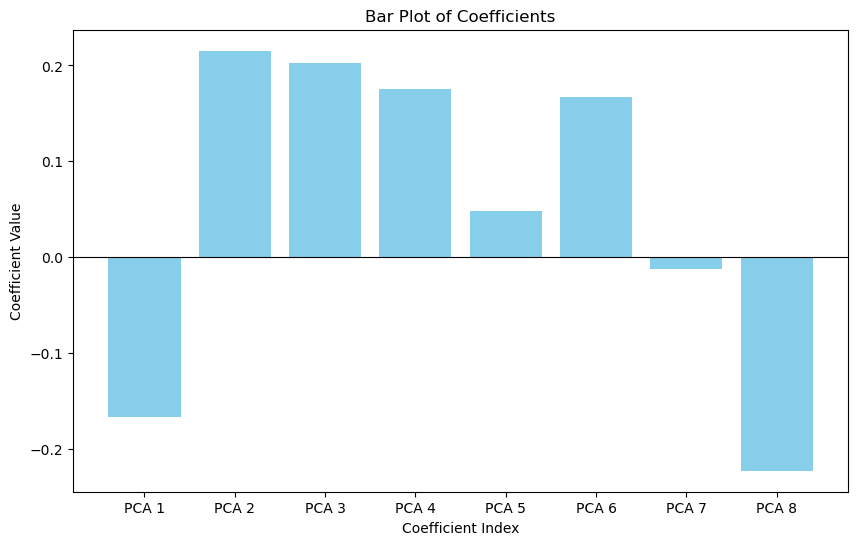

In [197]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(PCA_labels, coefficients, color='skyblue')
plt.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at zero
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Bar Plot of Coefficients')
plt.show()

Here we see that PCA 1, PCA 2, and PCA 8 all contribute greatly in terms of magnitude to the rating of quality when we apply linear regression.

In [199]:
evr_pd = pd.DataFrame(PCA_labels,pca.explained_variance_ratio_)
evr_pd

0
0.278518  PCA 1
0.178479  PCA 2
0.156129  PCA 3
0.120422  PCA 4
0.099193  PCA 5
0.077204  PCA 6
0.052818  PCA 7
0.037237  PCA 8

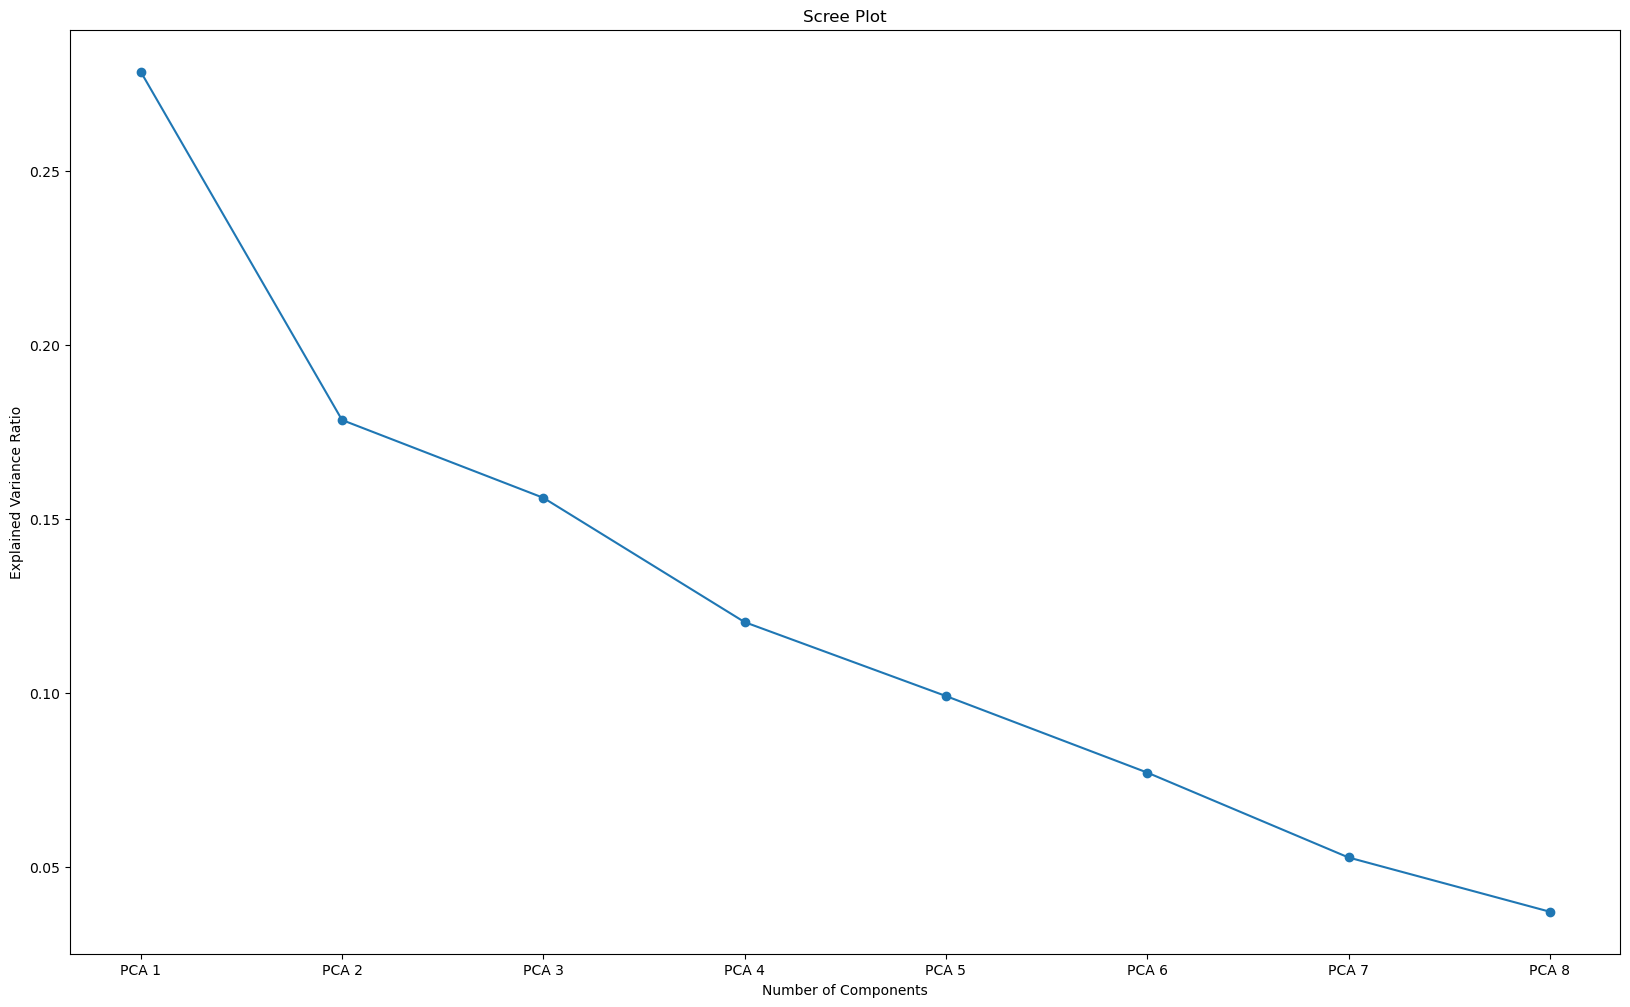

In [200]:
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(20, 12))
plt.plot(PCA_labels, explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

However, as we can see from the graph that first two componenets already explain a lot of the variance in the dataset. PCA 8 is particularly describing a unique set of features and is just as little as 3.7% of the variance in the dataset.

In [202]:
explained_variance_ratio[0] + explained_variance_ratio[1]

0.4569965554588873

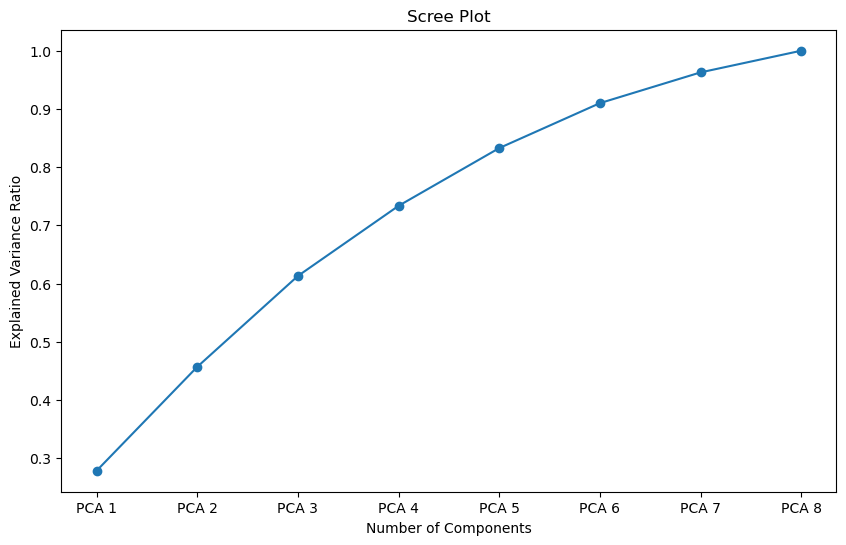

In [203]:
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(PCA_labels, cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

When we cumulatively add them the first two components already describes the variance of the dataset by 45.7%. Therefore, we would prioritize to doing clustering with these first two components

In [205]:
type_feature = df_final_cleaned_scaled.iloc[:, 0].copy()
type_feature

0       white
1       white
2       white
3       white
4       white
        ...  
4566      red
4567      red
4568      red
4569      red
4570      red
Name: type, Length: 4571, dtype: object

We store the colors of the observation in the variable **`type_feature`**. We would use these to see more added insight of how the colors of the wine are clustered

In [207]:
selected_features = df_final_cleaned_scaled.iloc[:, 1:-1].copy()
selected_features

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.693555         -0.262314     0.146154       -0.766370  -0.208624   
1          0.670550         -0.381197     0.553919        0.411472  -0.181494   
2         -0.011503         -0.678405     0.010232        0.767046   0.035544   
3         -0.769339         -0.143431    -1.077141        0.433695  -0.317143   
4          0.670550         -0.737846     0.757802       -0.788593  -0.344273   
...             ...               ...          ...             ...        ...   
4566      -0.011503          0.272660     0.825763       -0.544135   0.252582   
4567       0.215848         -0.202872     0.621880       -0.588582   0.225453   
4568      -0.011503          1.877583     0.078193       -0.566359   0.306842   
4569      -0.466204          2.263953    -0.805298        0.611482   0.442491   
4570      -0.920906         -0.202872     1.029645       -0.321901   0.279712   

      sulphates   alcohol  sulfur dioxide ratio  
0     -0.289571 -0.884822             -1.436500  
1     -0.623508 -0.378844              0.176873  
2     -0.890658 -0.547503             -0.272404  
3     -0.423146 -0.800493             -0.527250  
4     -0.556721  0.380124             -0.555307  
...         ...       ...                   ...  
4566   2.047988  0.801772              1.360241  
4567   2.114775  0.717443              2.220313  
4568   1.647263  1.898059              0.367849  
4569   0.044366 -1.137811              0.635836  
4570   0.845815  0.380124              1.123957  

[4571 rows x 8 columns]

In [208]:
#df_final_cleaned_scaled
kmean_2d_trial1 = q_pca_df.copy()
kmean_2d_trial1 = kmean_2d_trial1.reset_index()
kmean_2d_trial1 = kmean_2d_trial1.drop(['index'], axis=1)
kmean_2d_trial1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PCA 1    4571 non-null   float64
 1   PCA 2    4571 non-null   float64
 2   PCA 3    4571 non-null   float64
 3   PCA 4    4571 non-null   float64
 4   PCA 5    4571 non-null   float64
 5   PCA 6    4571 non-null   float64
 6   PCA 7    4571 non-null   float64
 7   PCA 8    4571 non-null   float64
 8   quality  4571 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 321.5 KB


In [209]:
kmean_2d_trial1

PCA 1     PCA 2     PCA 3     PCA 4     PCA 5     PCA 6     PCA 7  \
0    -0.510036 -0.297183 -0.471891 -1.516514  0.734953 -1.003388  0.361771   
1    -0.170241 -1.103704  0.594861  0.250532 -0.956286 -0.055929 -0.217601   
2    -0.465053 -1.138419 -0.519155  0.083686 -0.568950 -0.255396 -0.011503   
3    -0.257793 -0.123252 -1.729871 -0.140351  0.401774 -0.216478 -0.466870   
4    -0.697063 -0.162695  1.411779 -0.888950 -0.729786 -0.458014 -0.202936   
...        ...       ...       ...       ...       ...       ...       ...   
4566  1.635166  0.670359  2.222215  1.630589  1.396886  0.274511  0.715206   
4567  1.771282  0.784107  2.476262  2.564991  1.139945 -0.104882  0.184466   
4568  2.205032  1.677663  1.348013  0.166076  0.914943  1.707102  1.100105   
4569  2.464310 -0.320922 -1.754637  0.636774 -0.130185  0.589033  0.860154   
4570  0.427177  0.338504  1.120917  1.572751  0.936723 -0.483539  1.532027   

         PCA 8  quality  
0     0.339212        6  
1     0.067837        6  
2    -0.626554        6  
3    -0.029323        6  
4    -0.025851        6  
...        ...      ...  
4566  0.283620        6  
4567  0.170769        6  
4568  0.225427        6  
4569  0.861671        5  
4570  0.055049        6  

[4571 rows x 9 columns]

In this case we would copy the pca loadings from when we used the linear regression and plot the components that are to be used in clustering models later

## PCA Loadings

In here we would like to provide some more information on what each PCA contributes at particular components. Since we would be doing clustering with PCA 1 and PCA 2. The contribution of each feature to identifying as the PCA would be graphed.

In [213]:
loadings = pca.components_
pca_chosen = ["PCA 1", "PCA 2"]
loadings_df = pd.concat([ pd.DataFrame(pca.components_[[0,1]], columns = selected_features.columns), (pd.Series(pca_chosen)).rename("PCA Label")], axis = 1)


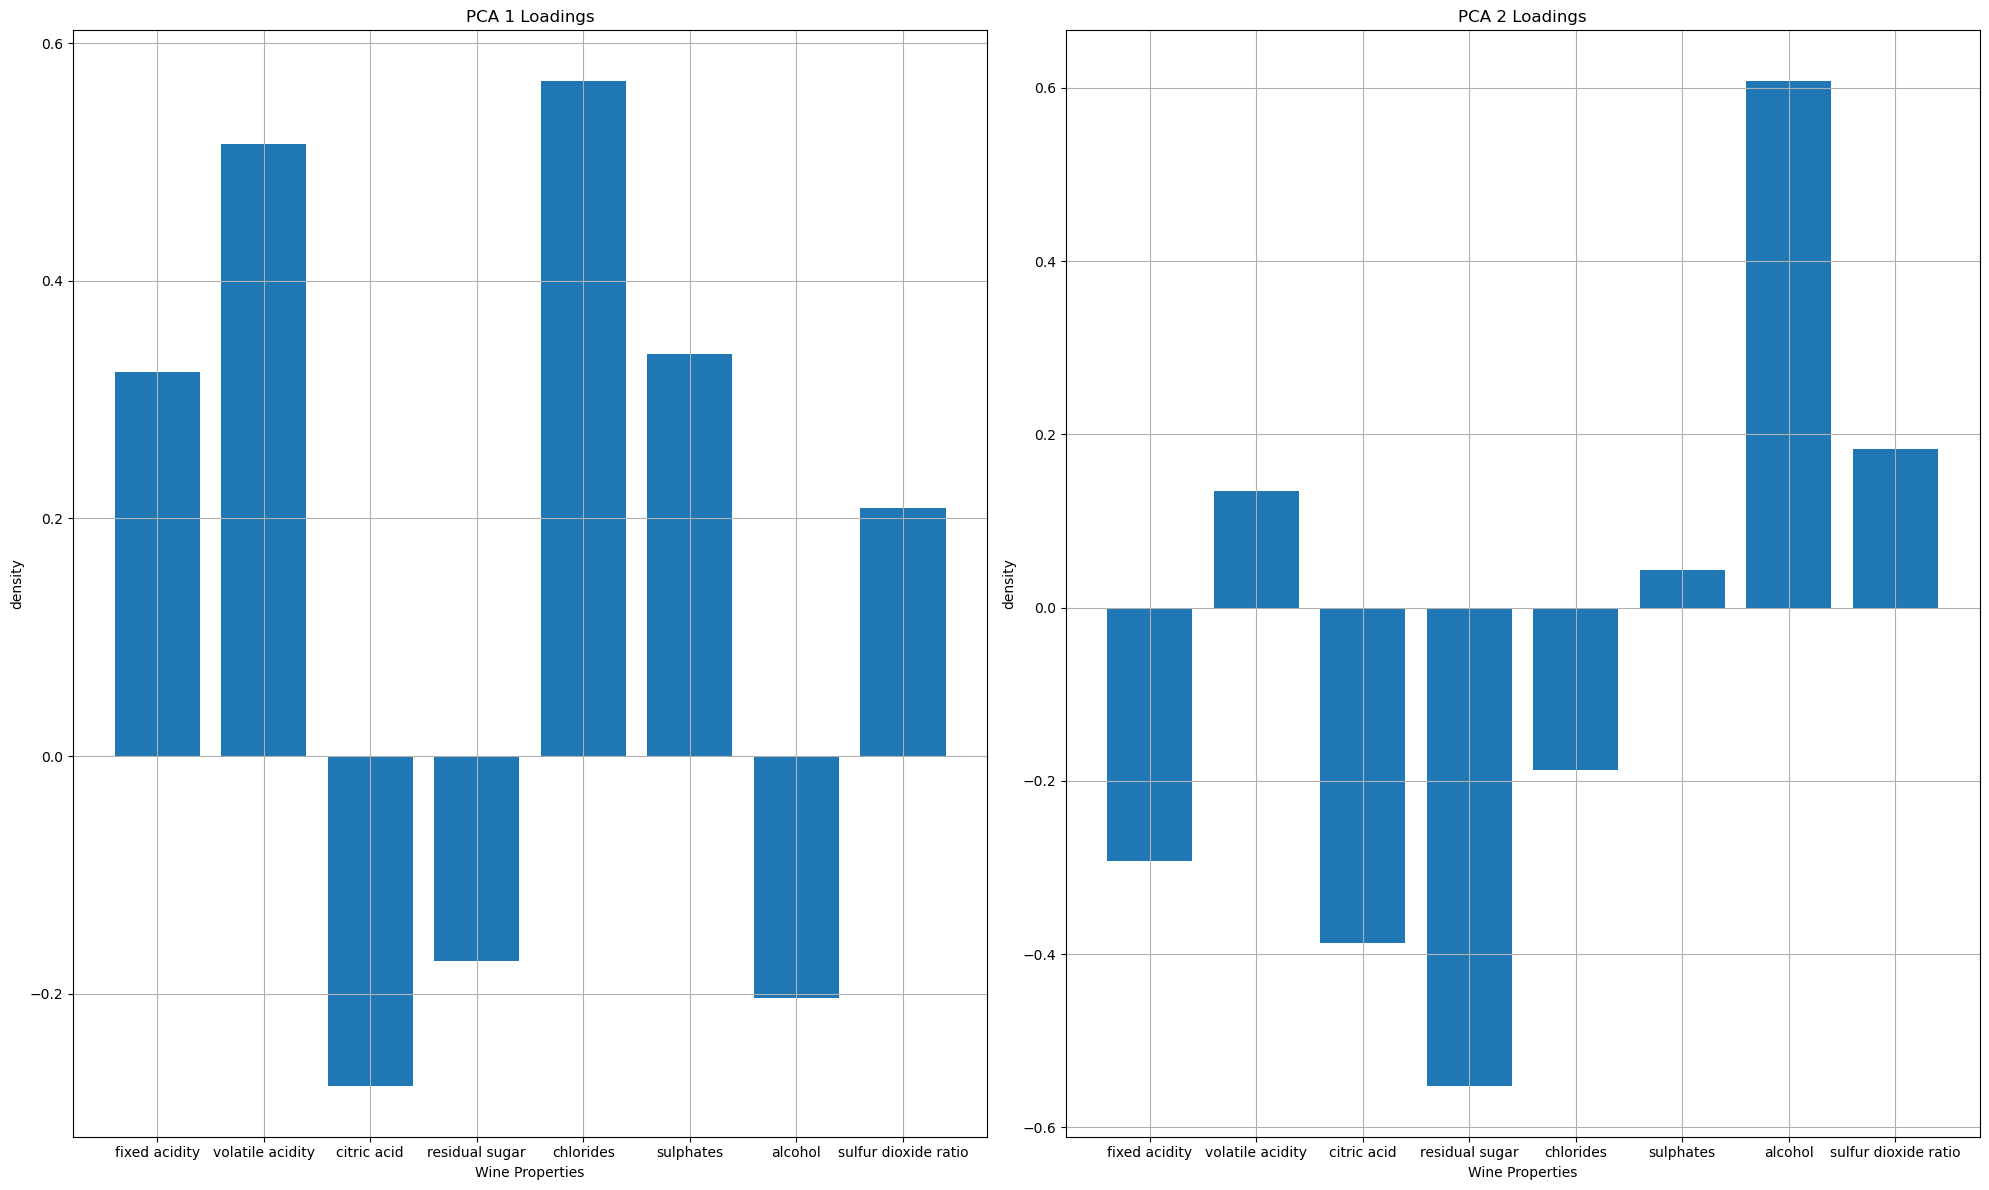

In [214]:
row1 = loadings_df.iloc[0]
row2 = loadings_df.iloc[1]




fig, axs = plt.subplots(1, 2, figsize=(20,12))


axs[0].bar(row1.index[:-1], row1[:-1])  
axs[1].bar(row2.index[:-1], row2[:-1])

axs[0].set_xlabel('Wine Properties')  
axs[0].set_ylabel(col) 
axs[0].set_title("PCA 1 Loadings")


axs[1].set_xlabel('Wine Properties')  
axs[1].set_ylabel(col) 
axs[1].set_title("PCA 2 Loadings")

axs[0].grid()
axs[1].grid()
plt.tight_layout()  
plt.show()

- PCA 1 looks to be slightly citric acid, with some volatile acidity and chlorides as major factors
- PCA 2 is looking to be negatively affected by residual sugars. But it seems to be well defined by its alcohol amount

## K-Means Clustering : Selecting the right K

In here we now put the observations in the context of their PCA **`kmean_2d_trial1`** and we will try to get the ideal number of k by getting the average of distances from the centroid. The function getAverage_EuclidD gets a mean of the centroid to all data point in a cluster. We would collect these means and average them all up based on the number of set k clusters. This would be the value that will be plotted for comparing the means

In [217]:
def getAverage_EuclidD(centroid_idx, cluster):
    distances = np.sqrt((cluster.iloc[:,0:dim]-kmeans.centroids.iloc[centroid_idx, :]) ** 2).sum(axis=1)
    return distances.mean()
    

In [218]:
cluster_list = []
clustermeans = []
Given_K_Ave_To_Centroid_List = []
kmean_models = []
dim = 2

for init_k in range(1,21):

    kmeans = KMeans(init_k, 0, dim, 4571 , kmean_2d_trial1, 1)
    kmeans.initialize_centroids(kmean_2d_trial1)
    kmean_models.append(kmeans)
    groups = kmeans.train(kmean_2d_trial1, 300)
    for i in range(0, init_k):
        cluster = kmean_2d_trial1.loc[groups == i]
        cluster_list.append(cluster)
        clustermeans.append(getAverage_EuclidD(i, cluster))
        
    rep_mean = (np.array(clustermeans)).mean()
    Given_K_Ave_To_Centroid_List.append(rep_mean)

C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)
C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)
C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-N

Finished Clustering at 1 iterations
Finished Clustering at 12 iterations
Finished Clustering at 10 iterations


C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


Finished Clustering at 19 iterations


C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


Finished Clustering at 40 iterations


C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


Finished Clustering at 58 iterations


C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


Finished Clustering at 48 iterations


C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


Finished Clustering at 48 iterations


C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


Finished Clustering at 45 iterations


C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


Finished Clustering at 65 iterations


C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


Finished Clustering at 81 iterations


C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


Finished Clustering at 34 iterations


C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


Finished Clustering at 29 iterations


C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


Finished Clustering at 53 iterations


C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


Finished Clustering at 37 iterations


C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


Finished Clustering at 76 iterations


C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


Finished Clustering at 43 iterations


C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


Finished Clustering at 49 iterations


C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


Finished Clustering at 40 iterations


C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


Finished Clustering at 31 iterations


In [219]:
# Create a dictionary to hold the data
data = {'Init K': list(range(1, 21)), 'Average Dist. to Centroid': Given_K_Ave_To_Centroid_List}

# Create a DataFrame from the dictionary
temp = pd.DataFrame(data)
temp['Average Dist. to Centroid'] = temp['Average Dist. to Centroid'].apply(lambda x: round(x, 2))
temp


Init K  Average Dist. to Centroid
0        1                       2.11
1        2                       1.75
2        3                       1.50
3        4                       1.37
4        5                       1.26
5        6                       1.17
6        7                       1.11
7        8                       1.06
8        9                       1.02
9       10                       0.99
10      11                       0.95
11      12                       0.92
12      13                       0.89
13      14                       0.87
14      15                       0.84
15      16                       0.82
16      17                       0.80
17      18                       0.78
18      19                       0.77
19      20                       0.75

## Elbow Method

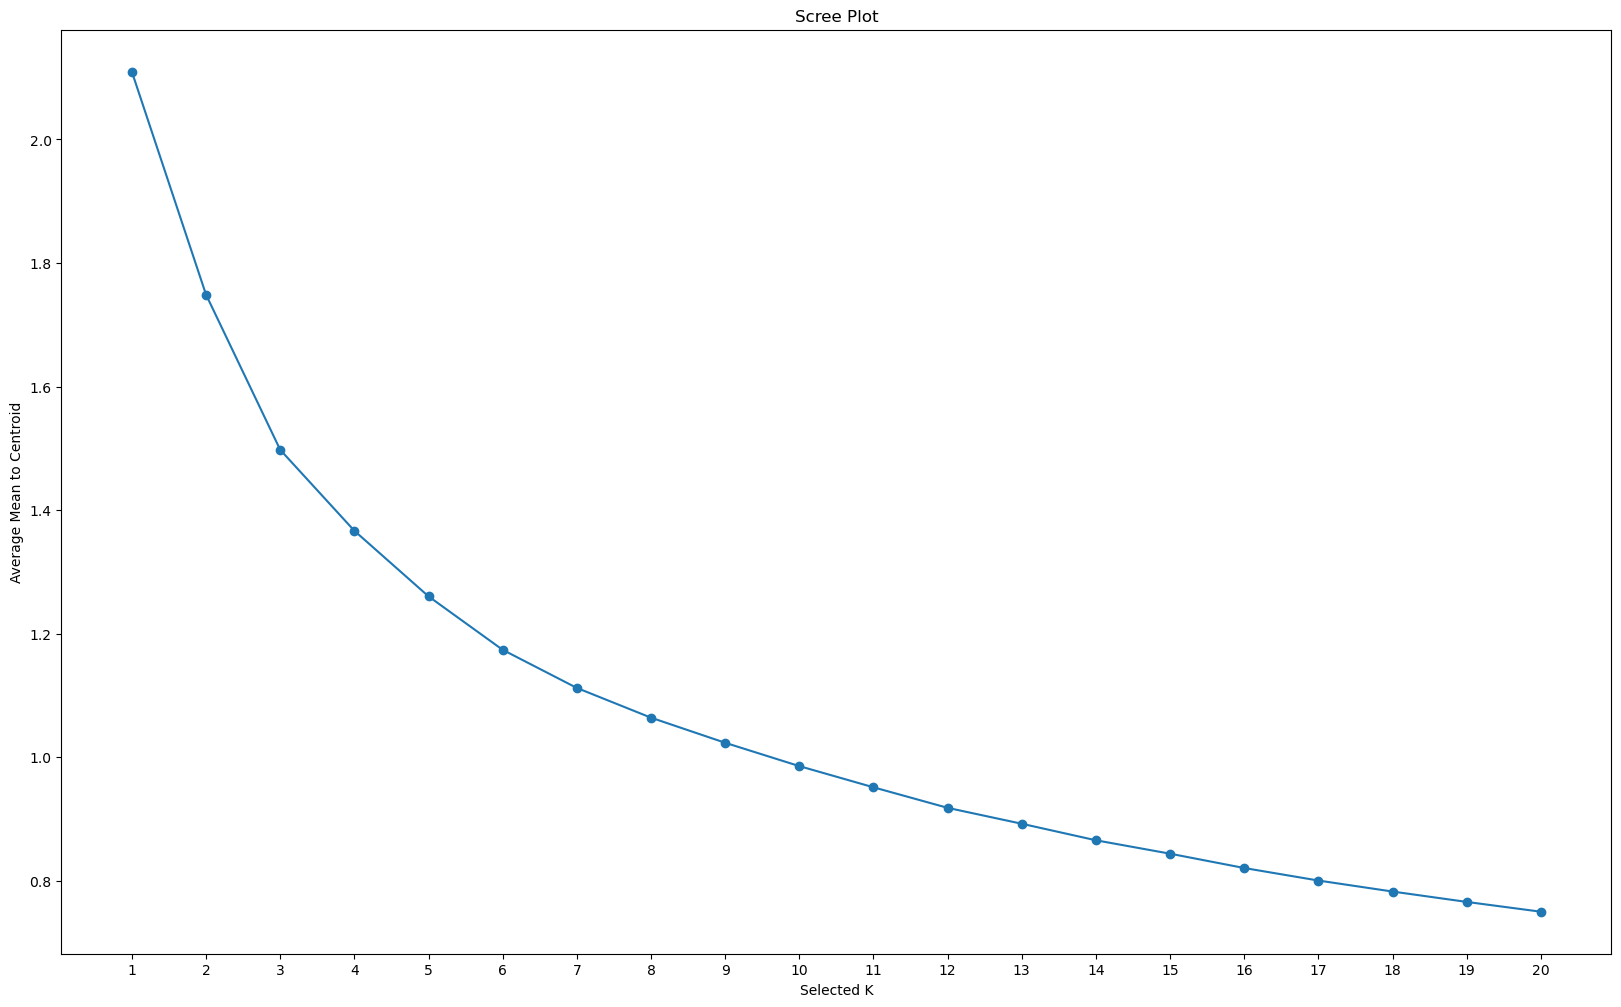

In [221]:

listLabels = [(f"{i}")for i in range(1, len(Given_K_Ave_To_Centroid_List) + 1)]
plt.figure(figsize=(20, 12))
plt.plot(listLabels, Given_K_Ave_To_Centroid_List, marker='o')
plt.xlabel('Selected K')
plt.ylabel('Average Mean to Centroid')
plt.title('Scree Plot')
plt.show()

If all the trials the rate of chantoo many clusterstop at slected K = 3. Although it i even so with just clustering only with 2 clusters. It would be biased towards the many observations of white wine and some number of indicators for red wine. Aossibl/fourth  to  based on physiochemical propertieschoose between ( if we set k > 2.-7), it would not be insightfuor even k = 4 l to see that between red and w. In order to supplement further picking which , we use a Silhouette Methodite wine dataset, a third type could transpire. So it is best to start k = 3 to clearly see plotted clusters 

## Silhouette Method

In [224]:
from sklearn.cluster import KMeans as kmSklearn
from yellowbrick.cluster import SilhouetteVisualizer

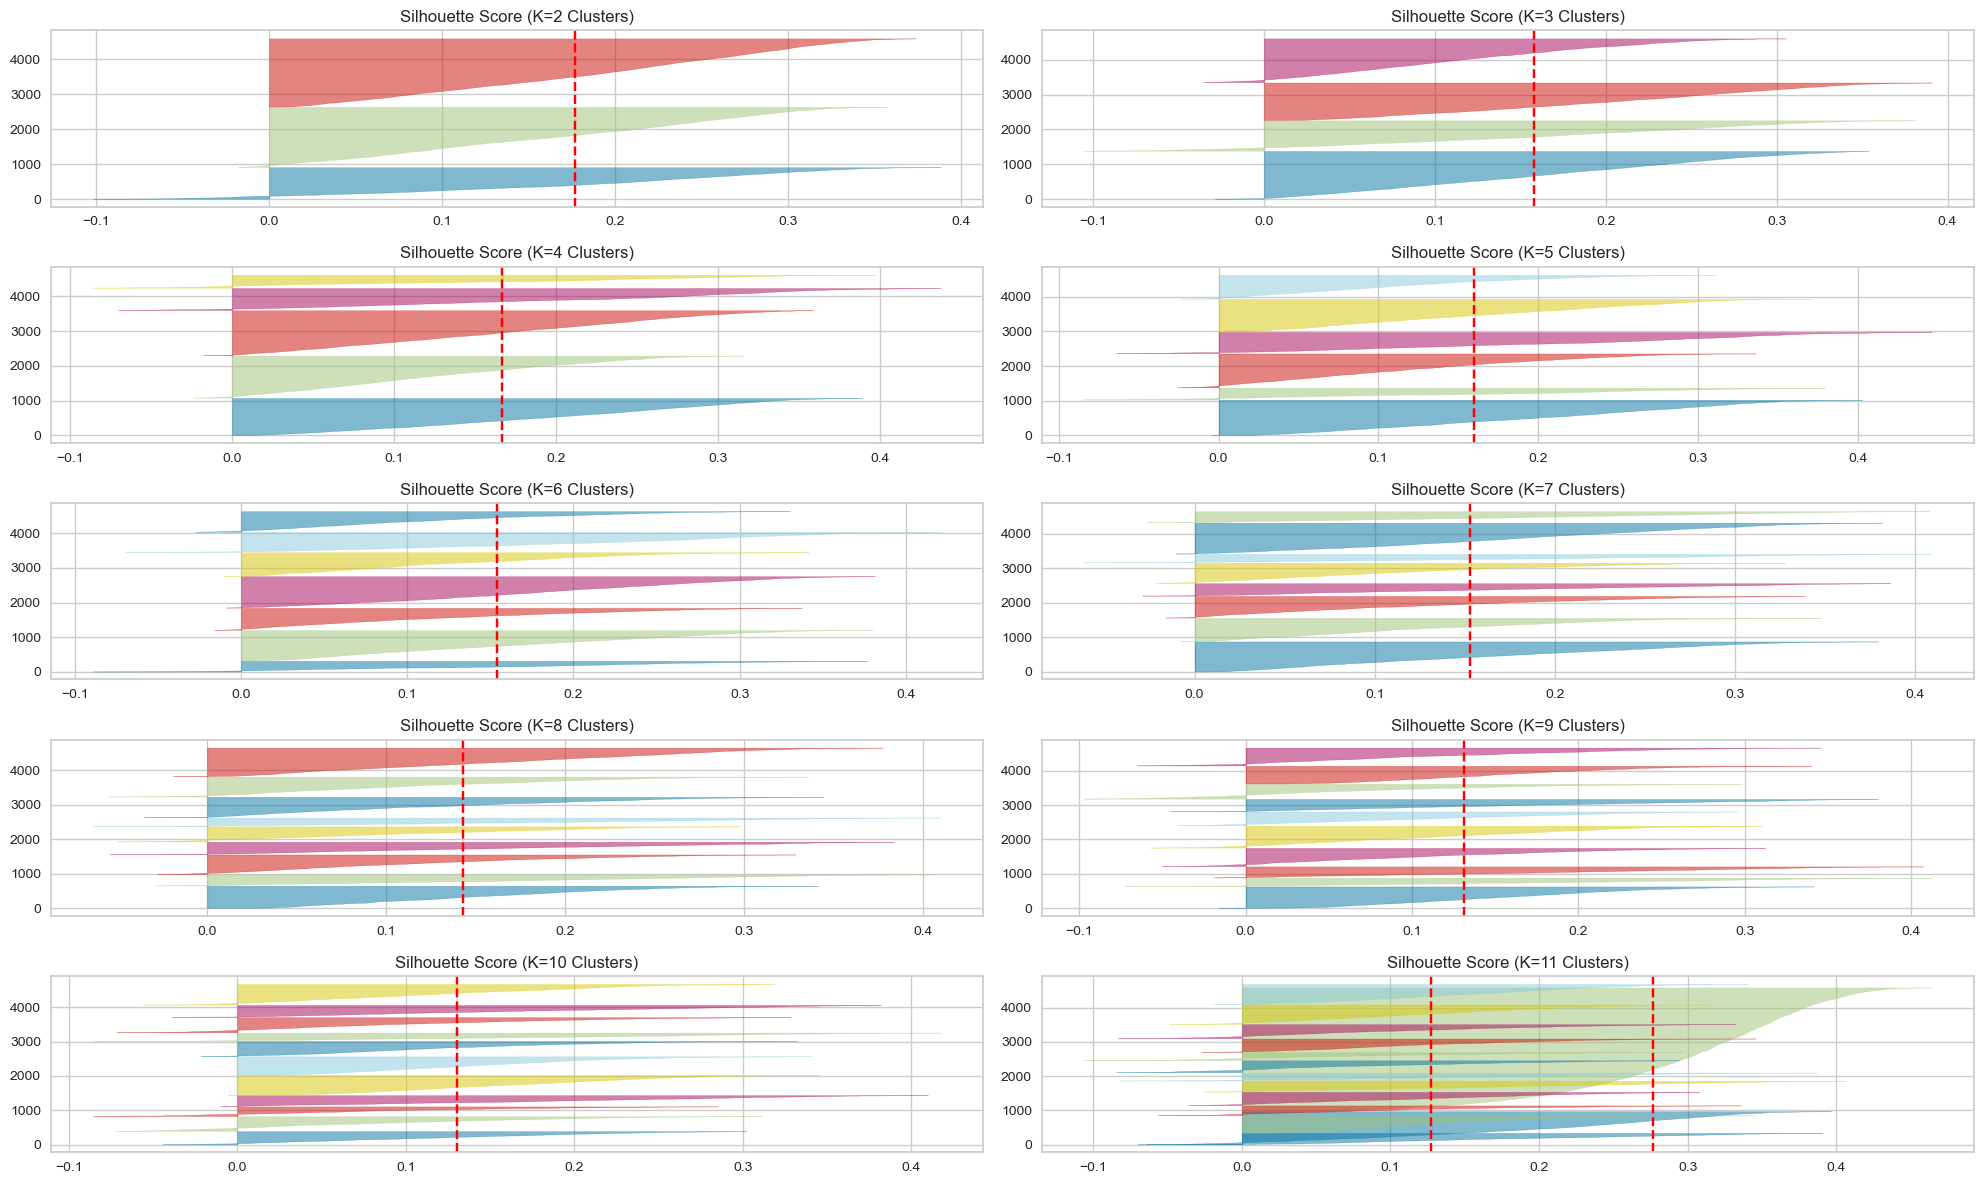

In [226]:

array = kmean_2d_trial1.to_numpy()


visualizer_scores = []
  
fig, ax = plt.subplots(5, 2, figsize=(20,12))
for i in range(2, 13):

    km = kmSklearn(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)

    q, mod = divmod(i-1, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''

    title = f"Silhouette Score (K={i-1} Clusters)"

    # Set title using visualizer's set_title method
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.set_title(title)
    visualizer.fit(array) 
    #  Access and print silhouette score
    silhouette_score = visualizer.silhouette_score_
    visualizer_scores.append(visualizer.silhouette_score_)

plt.tight_layout() 
plt.show()  

In [227]:
visualizer_scores_labels = []
for i in range(2, 13):
    visualizer_scores_labels.append(f"k = {i}")

series1 = pd.Series(visualizer_scores)
series2 = pd.Series(visualizer_scores_labels)

visualizersDF = pd.concat([series1.rename("Vis Scores"), series2.rename("Clusters")], axis = 1)
visualizersDF

Vis Scores Clusters
0     0.276970    k = 2
1     0.176882    k = 3
2     0.158168    k = 4
3     0.166810    k = 5
4     0.159555    k = 6
5     0.153822    k = 7
6     0.152664    k = 8
7     0.142888    k = 9
8     0.131461   k = 10
9     0.130504   k = 11
10    0.127021   k = 12

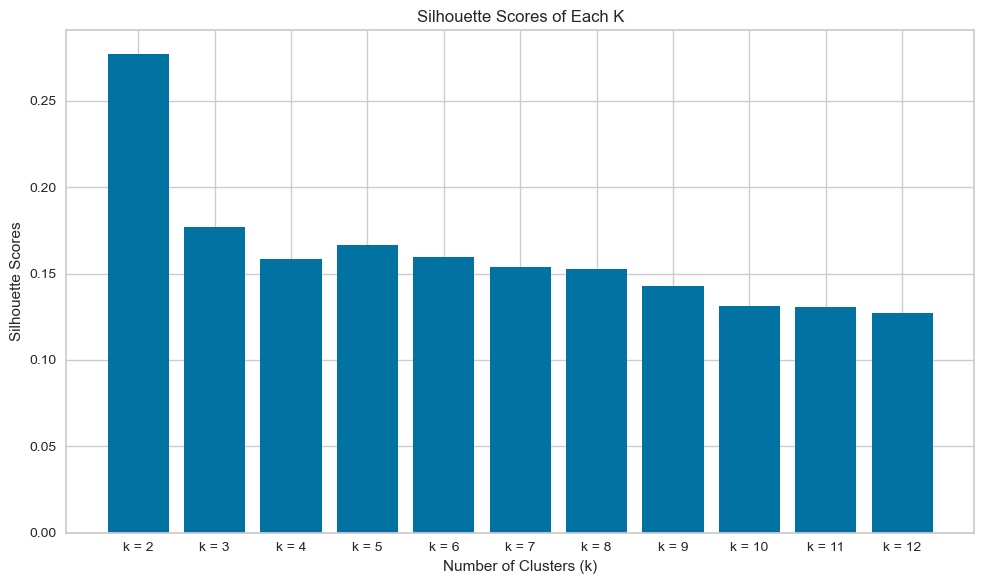

In [228]:
plt.figure(figsize=(10, 6)) 
plt.bar(visualizersDF["Clusters"], visualizersDF["Vis Scores"])
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores of Each K")
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()

In order to further validate and improve the case of the elbow method, we can use the silhouette method to see how the data points would be clustered (Tomar, 2023). Looking at the silhouettes, the scores are at their highest when it is at least 2 clusters. However, it seems that k=3 and k=4 are much lower scored. But looking at the silhouette graphs, the distribution with (k=2) two clusters are too far apart. Clustering it at k=3 gives it more even spread. Looking at k=4 graph, it might be giving an even better spread of the data points and hence the fluctuations of the size of clusters are looking very uniform. **The best K to choose is k = 4**

## K-Means Clustering : Using Euclidean Distance


In here we perform euclidean distances in K-means clustering to measure how similar data points are from each other in a cluster. We set that the dimensions we are clustering which are 2 dimensions (PCA 1 and 2) and we set are target amount of clusters as K (k=3). We would then plot them out and see how features of these kinds are grouped

In [232]:
dim = 2
k = 4

In [410]:
kmeans = KMeans(k, 0, dim, 4571 , kmean_2d_trial1, 1)
kmeans.initialize_centroids(kmean_2d_trial1)
groups = kmeans.train(kmean_2d_trial1, 300)



C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


Finished Clustering at 19 iterations


In [234]:
colors = plt.cm.tab10(range(k)) 

C:\Users\Paul Josef\AppData\Local\Temp\ipykernel_20664\2979451535.py:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[0].scatter(kmean_2d_trial1.loc[groups == i, 'PCA 1'],
C:\Users\Paul Josef\AppData\Local\Temp\ipykernel_20664\2979451535.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[1].scatter(kmean_2d_trial1.loc[groups == i, 'PCA 1'],


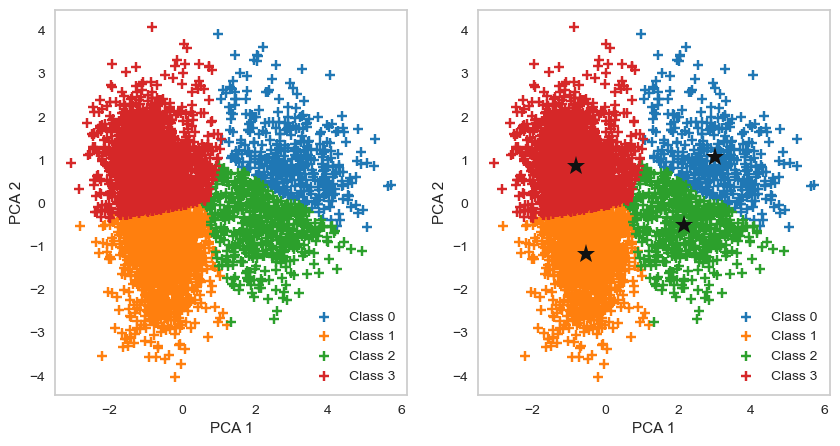

In [235]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
for i in range(k):
    axs[0].scatter(kmean_2d_trial1.loc[groups == i, 'PCA 1'], 
                kmean_2d_trial1.loc[groups == i, 'PCA 2'], 
                c=colors[i], marker='+', label=f'Class {i}')
    axs[1].scatter(kmean_2d_trial1.loc[groups == i, 'PCA 1'], 
                kmean_2d_trial1.loc[groups == i, 'PCA 2'], 
                c=colors[i], marker='+', label=f'Class {i}')

axs[0].set_xlabel('PCA 1')
axs[0].set_ylabel('PCA 2')
axs[0].legend()


axs[1].set_xlabel('PCA 1')
axs[1].set_ylabel('PCA 2')
axs[1].legend()

for i in range(len(kmeans.centroids)):
    axs[1].plot(kmeans.centroids.iloc[i]['PCA 1'], kmeans.centroids.iloc[i]['PCA 2'], marker='*', color='k', ms=14, label=f'Centroid {i}')

axs[0].grid()
axs[1].grid()
plt.show()

In [412]:
kmean_2d_trial1_wQ = pd.concat([kmean_2d_trial1, type_feature], axis = 1)
kmean_2d_trial1_wQ

PCA 1     PCA 2     PCA 3     PCA 4     PCA 5     PCA 6     PCA 7  \
0    -0.510036 -0.297183 -0.471891 -1.516514  0.734953 -1.003388  0.361771   
1    -0.170241 -1.103704  0.594861  0.250532 -0.956286 -0.055929 -0.217601   
2    -0.465053 -1.138419 -0.519155  0.083686 -0.568950 -0.255396 -0.011503   
3    -0.257793 -0.123252 -1.729871 -0.140351  0.401774 -0.216478 -0.466870   
4    -0.697063 -0.162695  1.411779 -0.888950 -0.729786 -0.458014 -0.202936   
...        ...       ...       ...       ...       ...       ...       ...   
4566  1.635166  0.670359  2.222215  1.630589  1.396886  0.274511  0.715206   
4567  1.771282  0.784107  2.476262  2.564991  1.139945 -0.104882  0.184466   
4568  2.205032  1.677663  1.348013  0.166076  0.914943  1.707102  1.100105   
4569  2.464310 -0.320922 -1.754637  0.636774 -0.130185  0.589033  0.860154   
4570  0.427177  0.338504  1.120917  1.572751  0.936723 -0.483539  1.532027   

         PCA 8  quality   type  
0     0.339212        6  white  
1     0.067837        6  white  
2    -0.626554        6  white  
3    -0.029323        6  white  
4    -0.025851        6  white  
...        ...      ...    ...  
4566  0.283620        6    red  
4567  0.170769        6    red  
4568  0.225427        6    red  
4569  0.861671        5    red  
4570  0.055049        6    red  

[4571 rows x 10 columns]

## Assessing the K-Mean Euclidean Clusters

In here we try to see if the clusters show case any patterns on how they assign. See also how ratings have been portrayed in these clusters

In [429]:
clusterList = []
for i in range(k):
    clusterList.append(0)
for i in range(k):
    clusterList[i] = kmean_2d_trial1_wQ.loc[groups == i]


In [431]:
cluster_labels = [f'Cluster {i+1}' for i in range(len(clusterList))]
mean_qualities = [0, 0, 0, 0]

mean_qualities = []
for i in range(k):
    mean_qualities.append(0)
for i in range(k):
    mean_qualities[i] =  clusterList[i]["quality"].mean()

df_temp = pd.DataFrame(mean_qualities, cluster_labels)
df_temp

0
Cluster 1  5.473684
Cluster 2  5.596591
Cluster 3  5.465608
Cluster 4  6.132113

Text(0.5, 1.0, 'Mean Quality by Cluster')

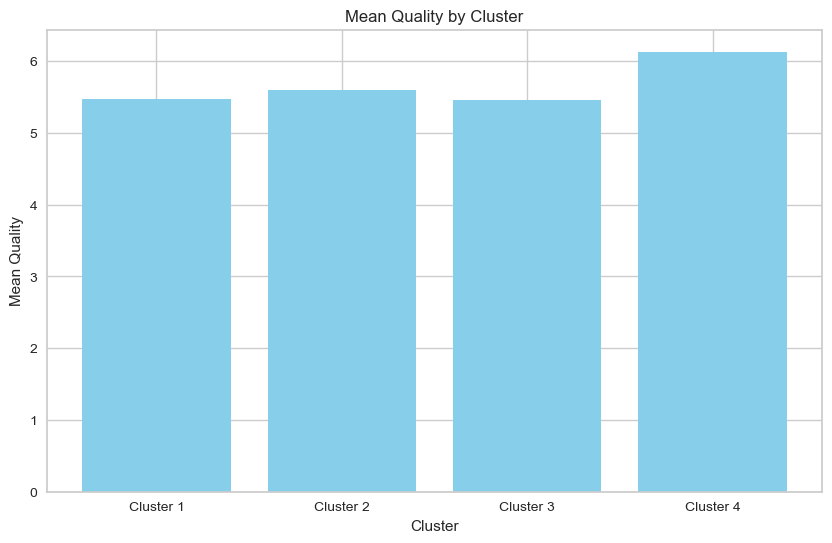

In [432]:
plt.figure(figsize=(10, 6))  

plt.bar(cluster_labels, mean_qualities, color='skyblue')


plt.xlabel('Cluster')
plt.ylabel('Mean Quality')
plt.title('Mean Quality by Cluster')

So it seems cluster 4 has the highest mean out of all the clusters. Statistical test would be later used to see its significance.

## Assessing clusters with Color Type

It would seem that our dataframe with PCA would group the wines into three distinct groups, that seemingly almost align with the color

In [424]:
# Create an empty list to store the DataFrames
all_type_counts = []

# Iterate through the clusterList
i = 0
labels = []
for cluster in clusterList:
    i += 1
    # Get value counts of 'type' for the current cluster
    labels.append(f"cluster {i}") 
    type_counts = pd.DataFrame(data=pd.Series(cluster['type']).value_counts())
    
    # Append the DataFrame to the list
    all_type_counts.append(type_counts)

# Concatenate all DataFrames into one
combined_df = pd.concat(all_type_counts, axis = 1)

combined_df.columns = labels
combined_df

cluster 1  cluster 2  cluster 3  cluster 4
type                                             
red          391         11        458         45
white          8       1573        109       1976

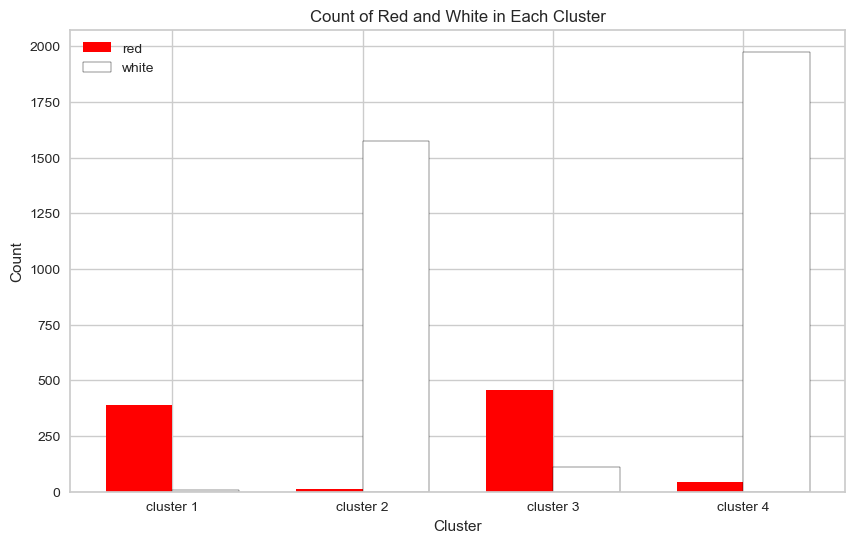

In [426]:
# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.35
x_pos = range(len(combined_df.columns))

# Plot bars for 'red' and 'white' for each cluster
plt.bar(x_pos, combined_df.loc['red'], bar_width, label='red', color='red')
plt.bar([pos + bar_width for pos in x_pos], combined_df.loc['white'], bar_width, label='white', color='white', edgecolor='black')

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count of Red and White in Each Cluster')
plt.xticks([pos + bar_width/2 for pos in x_pos], combined_df.columns) 
plt.legend()

plt.show()

Thee graphs seem to suggest two different types of red wine and two types of white wine present. Here we see cluster 4 having the most amount of white wine. cluster 3 has the most amount of red but some significant portion of white wine as well.

## Hierarchial Clustering 

In this section we tested hierarchial clustering and similar findings can be seen from the dendrogram. The general rule to select the cluster groups "distance" in a dendrogram is half of the highest in the chart. In order to align our previous clustering findings, we will see any discrepancies if we would use this method instead.

In [249]:
Z_link = linkage(kmean_2d_trial1.iloc[:,0:dim].copy(), method='ward')

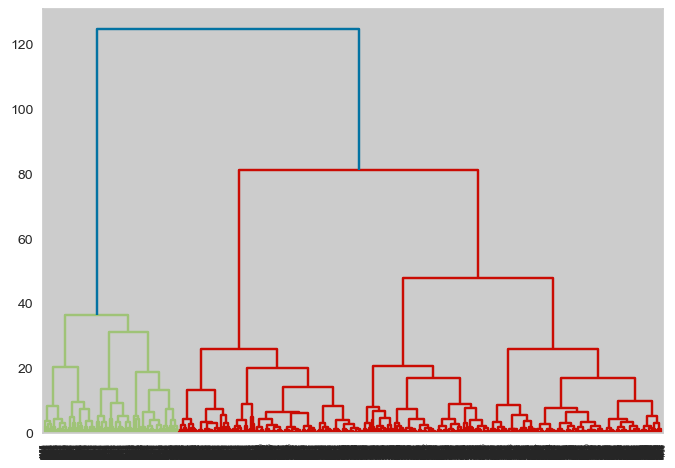

In [250]:
dendrogram(Z_link)
plt.show()

It seems that the four clusters can be found at around the distance 40-60. Lets pick distance 45 and get 4 clusters

In [252]:

num_clusters = 4
height_threshold = 45

labelsGroupN = fcluster(Z_link, height_threshold, criterion='distance')

In [253]:
labelsGroupN = pd.Series(labelsGroupN)

In [254]:
grouped_data = pd.concat([pd.DataFrame(Z_link), labelsGroupN.rename('group'), kmean_2d_trial1.iloc[:,-1]], axis=1)
grouped_data.dropna(inplace=True) 

In [255]:
wine_means = grouped_data.groupby('group')['quality'].mean()
wine_means

group
1    5.460697
2    6.276627
3    5.532551
4    5.781348
Name: quality, dtype: float64

Text(0.5, 1.0, 'Mean Quality by Cluster')

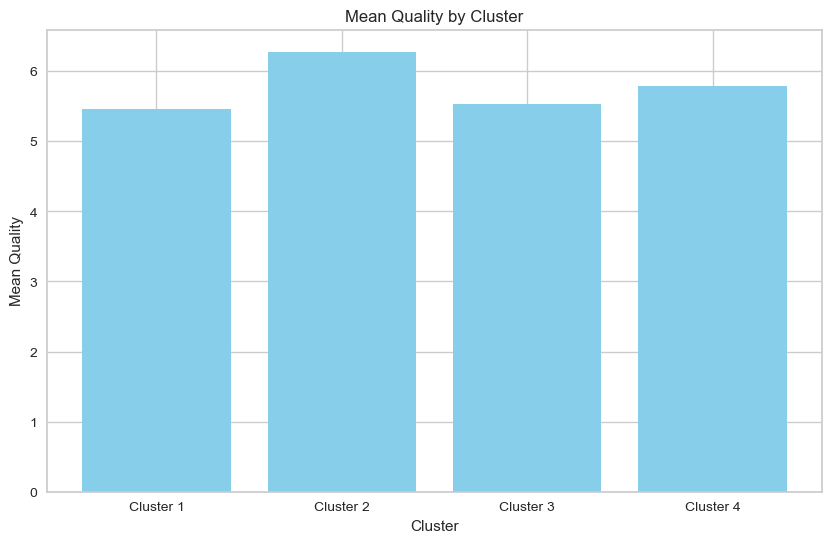

In [256]:
plt.figure(figsize=(10, 6))  

plt.bar(cluster_labels, wine_means, color='skyblue')


plt.xlabel('Cluster')
plt.ylabel('Mean Quality')
plt.title('Mean Quality by Cluster')

In here the difference from the previous K-means clustering result, **cluster 2 is the highest one rated**. Curiously enough it is **odd that cluster 2 becomes a highly rated one.** But if cluster 2 is the one with most white counts then it would align with k-means clustering results.

In [258]:
grouped_data_withType = pd.concat([grouped_data.copy(), type_feature], axis = 1)
grouped_data_withType.dropna(inplace=True) 

In [259]:
clusterListH = []
for i in range(k):
    clusterListH.append(0)
for i in range(k):
    clusterListH[i] = grouped_data_withType.loc[groups == i]

In [260]:
# Create an empty list to store the DataFrames
all_type_counts = []

# Iterate through the clusterList
i = 0
labels = []
for cluster in clusterListH:
    i += 1
    # Get value counts of 'type' for the current cluster
    labels.append(f"cluster {i}") 
    type_counts = pd.DataFrame(data=pd.Series(cluster['type']).value_counts())
    
    # Append the DataFrame to the list
    all_type_counts.append(type_counts)

# Concatenate all DataFrames into one
combined_dfH = pd.concat(all_type_counts, axis = 1)

combined_dfH.columns = labels
combined_dfH

cluster 1  cluster 2  cluster 3  cluster 4
type                                             
red          391         11        458         44
white          8       1573        109       1976

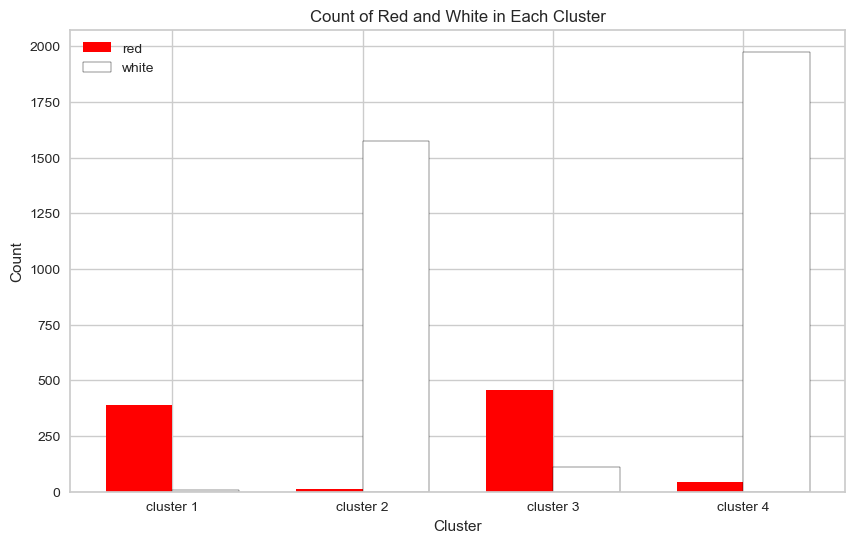

In [261]:
# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.35
x_pos = range(len(combined_dfH.columns))

# Plot bars for 'red' and 'white' for each cluster
plt.bar(x_pos, combined_dfH.loc['red'], bar_width, label='red', color='red')
plt.bar([pos + bar_width for pos in x_pos], combined_dfH.loc['white'], bar_width, label='white', color='white', edgecolor='black')

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count of Red and White in Each Cluster')
plt.xticks([pos + bar_width/2 for pos in x_pos], combined_dfH.columns) 
plt.legend()

plt.show()

In here we are shown that the **cluster 2 is the one with medium sized amount of white type observations of wine**. Which is a difference from the K-means cluster results. Lets try grouping and see how different their points scatter. We would append the group number assignment to the data set and see the K-means clustering and hierarchial clustering on a scatter plot.

In [263]:
df_without_last_row = pd.concat([kmean_2d_trial1[["PCA 1", "PCA 2"]], labelsGroupN.rename("group")], axis = 1)
df_without_last_row

PCA 1     PCA 2  group
0    -0.510036 -0.297183      4
1    -0.170241 -1.103704      3
2    -0.465053 -1.138419      3
3    -0.257793 -0.123252      4
4    -0.697063 -0.162695      4
...        ...       ...    ...
4566  1.635166  0.670359      1
4567  1.771282  0.784107      1
4568  2.205032  1.677663      1
4569  2.464310 -0.320922      1
4570  0.427177  0.338504      4

[4571 rows x 3 columns]

Oddly enough slight discrepancy when using Z-link, one observation was omitted however since its a slight change we will be omitting our last row as well.

In [265]:
hcluster_centroids = df_without_last_row.groupby("group").mean()
hcluster_centroids

PCA 1     PCA 2
group                    
1      2.447912  0.177456
2     -0.882025  1.166945
3     -0.537597 -1.631440
4     -0.598218 -0.178069

In [266]:
kmeanH_df = pd.concat([kmean_2d_trial1.iloc[:, 0:dim].copy(), labelsGroupN.rename('group')], axis = 1)

C:\Users\Paul Josef\AppData\Local\Temp\ipykernel_20664\695352604.py:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[0,0].scatter(kmean_2d_trial1.loc[groups == i, 'PCA 1'],
C:\Users\Paul Josef\AppData\Local\Temp\ipykernel_20664\695352604.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[0,1].scatter(kmean_2d_trial1.loc[groups == i, 'PCA 1'],
C:\Users\Paul Josef\AppData\Local\Temp\ipykernel_20664\695352604.py:13: Us

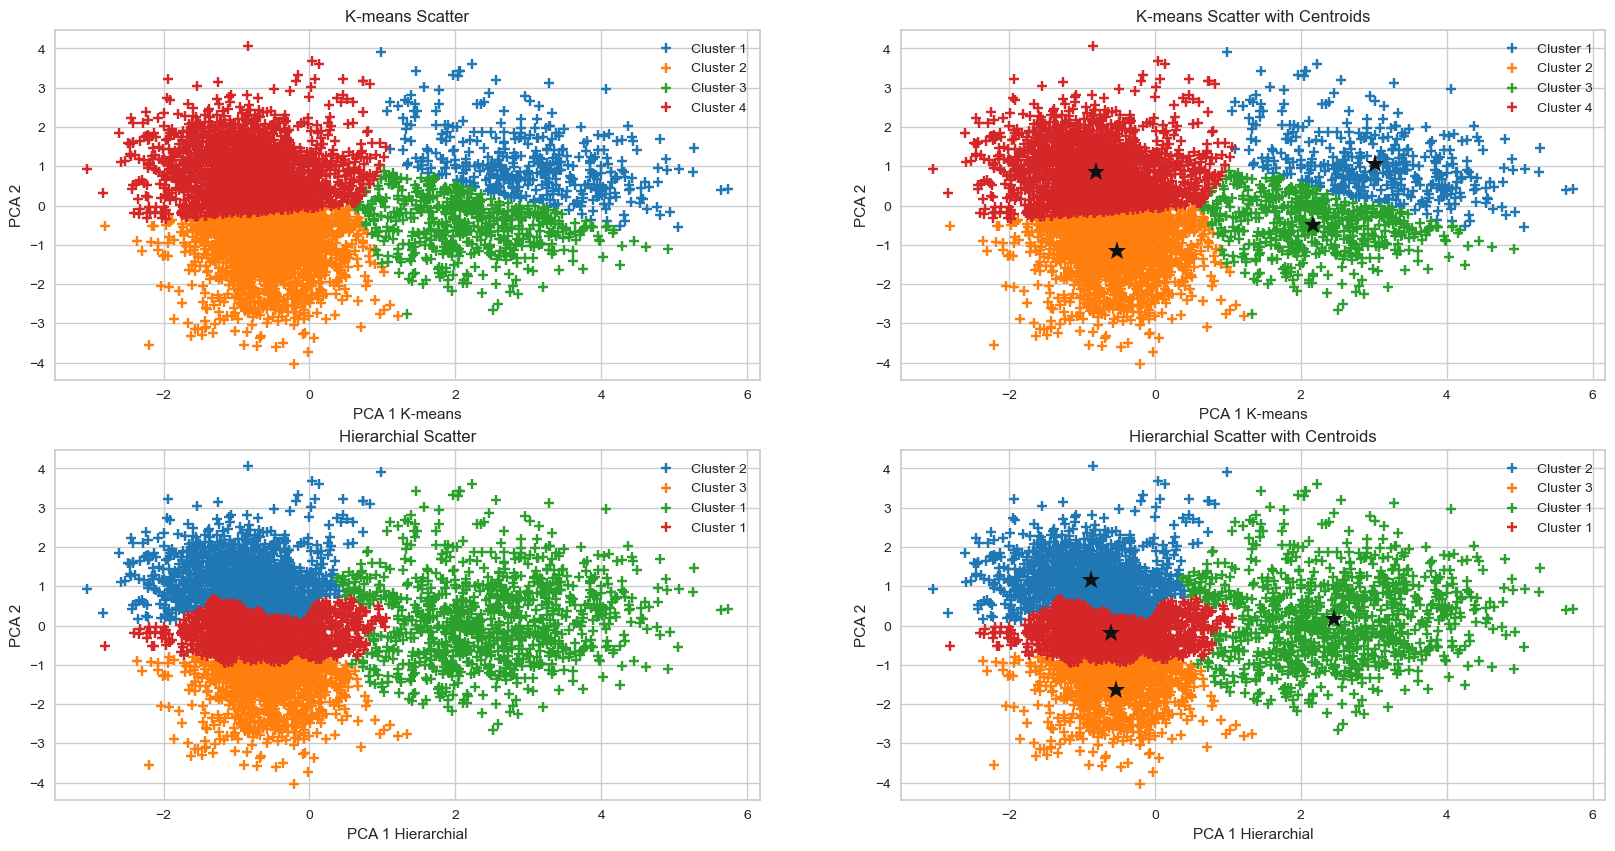

In [267]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
for i in range(k):
    axs[0,0].scatter(kmean_2d_trial1.loc[groups == i, 'PCA 1'], 
                kmean_2d_trial1.loc[groups == i, 'PCA 2'], 
                c=colors[i], marker='+', label=f'Cluster {i+1}')
    axs[0,1].scatter(kmean_2d_trial1.loc[groups == i, 'PCA 1'], 
                kmean_2d_trial1.loc[groups == i, 'PCA 2'], 
                c=colors[i], marker='+', label=f'Cluster {i+1}')




axs[1,0].scatter(kmeanH_df.loc[labelsGroupN == 2, 'PCA 1'], 
            kmeanH_df.loc[labelsGroupN == 2, 'PCA 2'], 
            c=colors[0], marker='+', label=f'Cluster {2}')
axs[1,1].scatter(kmeanH_df.loc[labelsGroupN == 2, 'PCA 1'], 
            kmeanH_df.loc[labelsGroupN == 2, 'PCA 2'], 
            c=colors[0], marker='+', label=f'Cluster {2}')

axs[1,0].scatter(kmeanH_df.loc[labelsGroupN == 3, 'PCA 1'], 
            kmeanH_df.loc[labelsGroupN == 3, 'PCA 2'], 
            c=colors[1], marker='+', label=f'Cluster {3}')
axs[1,1].scatter(kmeanH_df.loc[labelsGroupN == 3, 'PCA 1'], 
            kmeanH_df.loc[labelsGroupN == 3, 'PCA 2'], 
            c=colors[1], marker='+', label=f'Cluster {3}')


axs[1,0].scatter(kmeanH_df.loc[labelsGroupN == 1, 'PCA 1'], 
            kmeanH_df.loc[labelsGroupN == 1, 'PCA 2'], 
            c=colors[2], marker='+', label=f'Cluster {1}')
axs[1,1].scatter(kmeanH_df.loc[labelsGroupN == 1, 'PCA 1'], 
            kmeanH_df.loc[labelsGroupN == 1, 'PCA 2'], 
            c=colors[2], marker='+', label=f'Cluster {1}')

axs[1,0].scatter(kmeanH_df.loc[labelsGroupN == 4, 'PCA 1'], 
            kmeanH_df.loc[labelsGroupN == 4, 'PCA 2'], 
            c=colors[3], marker='+', label=f'Cluster {1}')
axs[1,1].scatter(kmeanH_df.loc[labelsGroupN == 4, 'PCA 1'], 
            kmeanH_df.loc[labelsGroupN == 4, 'PCA 2'], 
            c=colors[3], marker='+', label=f'Cluster {1}')


axs[0, 0].set_xlabel('PCA 1 K-means')
axs[0, 0].set_ylabel('PCA 2')
axs[0, 0].set_title("K-means Scatter")
axs[0, 0].legend()


axs[0, 1].set_xlabel('PCA 1 K-means')
axs[0, 1].set_ylabel('PCA 2')
axs[0, 1].set_title("K-means Scatter with Centroids")
axs[0, 1].legend()


axs[1,0].set_xlabel('PCA 1 Hierarchial')
axs[1,0].set_ylabel('PCA 2')
axs[1, 0].set_title("Hierarchial Scatter")
axs[1,0].legend()


axs[1,1].set_xlabel('PCA 1 Hierarchial')
axs[1, 1].set_title("Hierarchial Scatter with Centroids")
axs[1,1].set_ylabel('PCA 2')
axs[1,1].legend()
for i in range(len(kmeans.centroids)):
    axs[0,1].plot(kmeans.centroids.iloc[i]['PCA 1'], kmeans.centroids.iloc[i]['PCA 2'], marker='*', color='k', ms=14, label=f'Centroid {i}')
    axs[1,1].plot(hcluster_centroids.iloc[i]['PCA 1'], hcluster_centroids.iloc[i]['PCA 2'], marker='*', color='k', ms=14, label=f'Centroid {i}')

axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)
plt.show()

The two methods produced different groupings, but seems to not account for the possibility that green cluster could have more categories within. Seems like the groupings are not as evenly distributed with Hierarchial when compared to Euclidean K-means.

## K-Means Clustering : Using Cosine Distances

In here we perform Clustering with the same amount of predicted clusters, but we use cosine distances. Using this simply just helps the fact that there are more white wines than red wines. See if there any discrepancies with respective counts of red and white wines per cluster and the quality mean of each cluster.

In [436]:
k =4
kmeans_cos = KMeans(k, 0, dim, 4571 , kmean_2d_trial1, 2)
kmeans_cos.initialize_centroids(kmean_2d_trial1)
groupsCosine = kmeans_cos.train(kmean_2d_trial1, 300)


Finished Clustering at 11 iterations


C:\Users\Paul Josef\Documents\GitHub\CSMODEL-Wine\kmeans.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


In [438]:
kmeans_cosine_DF = pd.concat([kmean_2d_trial1, groupsCosine], axis = 1)

In [440]:
colors = plt.cm.tab10(range(k)) 

C:\Users\Paul Josef\AppData\Local\Temp\ipykernel_20664\1309910748.py:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[0,0].scatter(kmean_2d_trial1.loc[groups == i, 'PCA 1'],
C:\Users\Paul Josef\AppData\Local\Temp\ipykernel_20664\1309910748.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[0,1].scatter(kmean_2d_trial1.loc[groups == i, 'PCA 1'],
C:\Users\Paul Josef\AppData\Local\Temp\ipykernel_20664\1309910748.py:11:

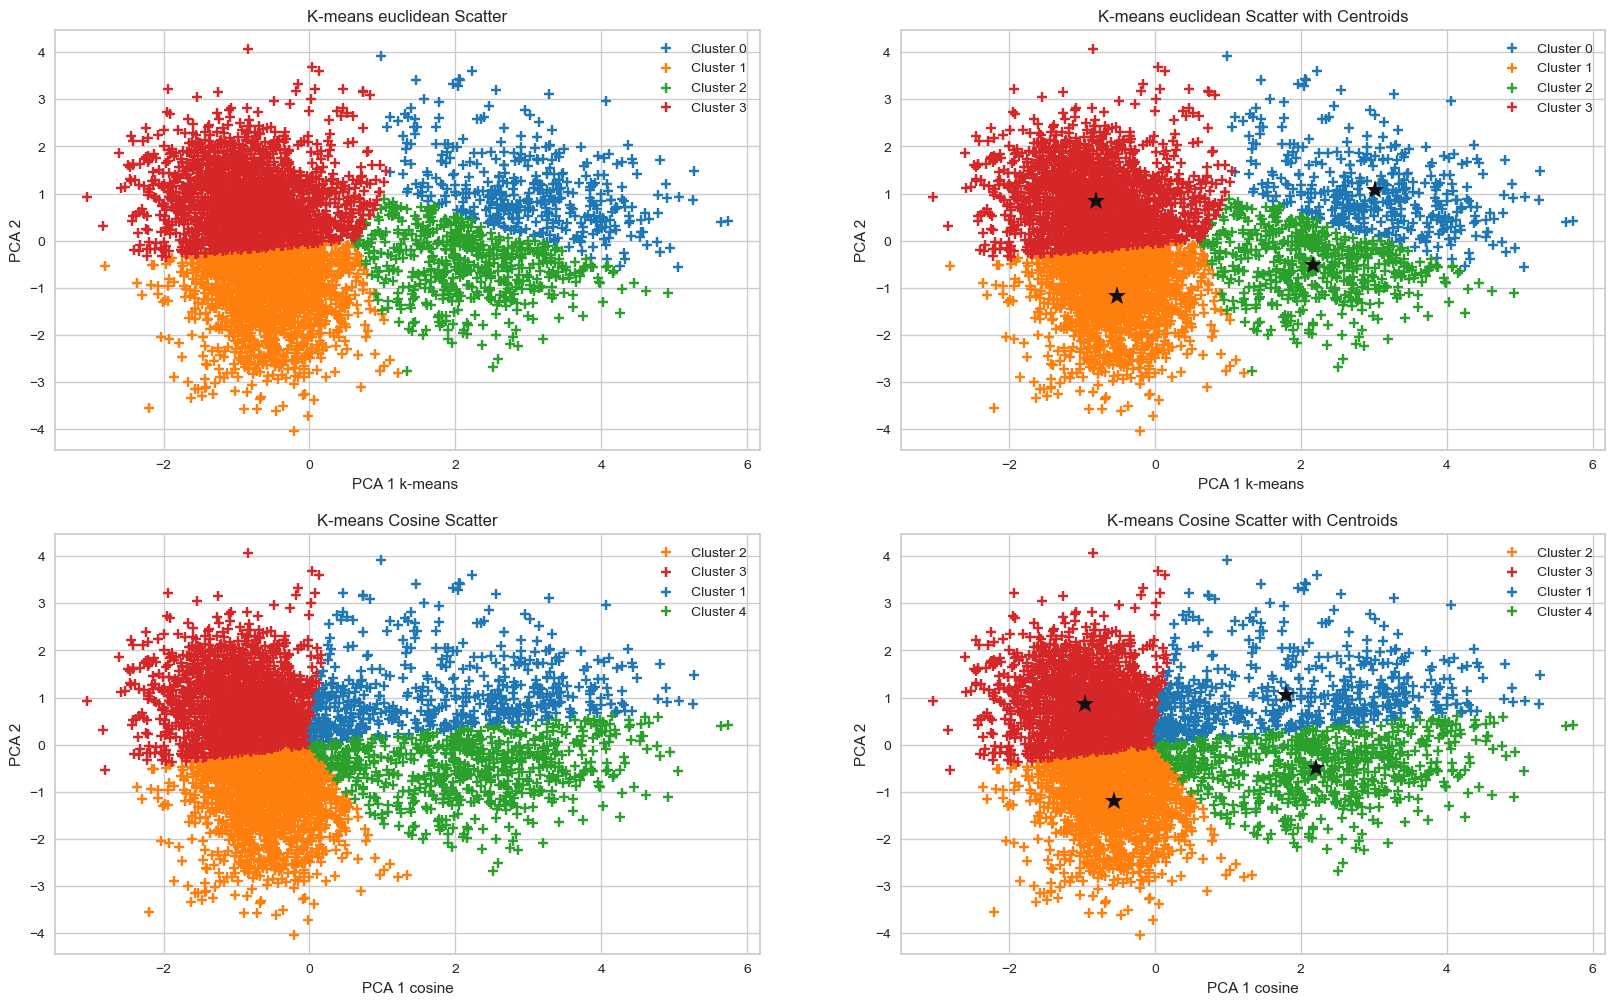

In [441]:
fig, axs = plt.subplots(2, 2, figsize=(20,12))
for i in range(k):
    axs[0,0].scatter(kmean_2d_trial1.loc[groups == i, 'PCA 1'], 
                kmean_2d_trial1.loc[groups == i, 'PCA 2'], 
                c=colors[i], marker='+', label=f'Cluster {i}')
    axs[0,1].scatter(kmean_2d_trial1.loc[groups == i, 'PCA 1'], 
                kmean_2d_trial1.loc[groups == i, 'PCA 2'], 
                c=colors[i], marker='+', label=f'Cluster {i}')


axs[1,0].scatter(kmeans_cosine_DF.loc[groupsCosine == 1, 'PCA 1'], 
            kmeans_cosine_DF.loc[groupsCosine == 1, 'PCA 2'], 
            c=colors[1], marker='+', label=f'Cluster {2}')
axs[1,1].scatter(kmeans_cosine_DF.loc[groupsCosine == 1, 'PCA 1'], 
            kmeans_cosine_DF.loc[groupsCosine == 1, 'PCA 2'], 
            c=colors[1], marker='+', label=f'Cluster {2}')




axs[1,0].scatter(kmeans_cosine_DF.loc[groupsCosine == 2, 'PCA 1'], 
            kmeans_cosine_DF.loc[groupsCosine == 2, 'PCA 2'], 
            c=colors[3], marker='+', label=f'Cluster {3}')
axs[1,1].scatter(kmeans_cosine_DF.loc[groupsCosine == 2, 'PCA 1'], 
            kmeans_cosine_DF.loc[groupsCosine == 2, 'PCA 2'], 
            c=colors[3], marker='+', label=f'Cluster {3}')

axs[1,0].scatter(kmeans_cosine_DF.loc[groupsCosine == 0, 'PCA 1'], 
            kmeans_cosine_DF.loc[groupsCosine == 0, 'PCA 2'], 
            c=colors[0], marker='+', label=f'Cluster {1}')
axs[1,1].scatter(kmeans_cosine_DF.loc[groupsCosine == 0, 'PCA 1'], 
            kmeans_cosine_DF.loc[groupsCosine == 0, 'PCA 2'], 
            c=colors[0], marker='+', label=f'Cluster {1}')

axs[1,0].scatter(kmeans_cosine_DF.loc[groupsCosine == 3, 'PCA 1'], 
            kmeans_cosine_DF.loc[groupsCosine == 3, 'PCA 2'], 
            c=colors[2], marker='+', label=f'Cluster {4}')
axs[1,1].scatter(kmeans_cosine_DF.loc[groupsCosine == 3, 'PCA 1'], 
            kmeans_cosine_DF.loc[groupsCosine == 3, 'PCA 2'], 
            c=colors[2], marker='+', label=f'Cluster {4}')

axs[0, 0].set_xlabel('PCA 1 k-means ')
axs[0, 0].set_ylabel('PCA 2')
axs[0, 0].set_title("K-means euclidean Scatter")
axs[0, 0].legend()


axs[0, 1].set_xlabel('PCA 1 k-means ')
axs[0, 1].set_ylabel('PCA 2')
axs[0, 1].set_title("K-means euclidean Scatter with Centroids")
axs[0, 1].legend()


axs[1,0].set_xlabel('PCA 1 cosine')
axs[1,0].set_ylabel('PCA 2')
axs[1, 0].set_title("K-means Cosine Scatter")
axs[1,0].legend()


axs[1,1].set_xlabel('PCA 1 cosine')
axs[1,1].set_ylabel('PCA 2')
axs[1, 1].set_title("K-means Cosine Scatter with Centroids")
axs[1,1].legend()
for i in range(len(kmeans.centroids)):
    axs[0,1].plot(kmeans.centroids.iloc[i]['PCA 1'], kmeans.centroids.iloc[i]['PCA 2'], marker='*', color='k', ms=14, label=f'Centroid {i}')
    axs[1,1].plot(kmeans_cos.centroids.iloc[i]['PCA 1'], kmeans_cos.centroids.iloc[i]['PCA 2'], marker='*', color='k', ms=14, label=f'Centroid {i}')

axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)
plt.show()

In this case we see that the clusters of both k-means euclidean and cosine have similar. Cosine scatter seems to be more apparent to start at the origin seep more from its cluster 2 and 3. Both methods produce a seemingly even dsitribution of the data points. 

In [443]:
kmean_2d_trial1_wQ = pd.concat([kmean_2d_trial1, type_feature], axis = 1)

In [444]:
clusterList = []
for i in range(k):
    clusterList.append(0)
for i in range(k):
    clusterList[i] = kmean_2d_trial1_wQ.loc[groupsCosine == i]


In [445]:
cluster_labels = [f'Cluster {i+1}' for i in range(len(clusterList))]
mean_qualities = [0, 0, 0, 0]

mean_qualities = []
for i in range(k):
    mean_qualities.append(0)
for i in range(k):
    
    mean_qualities[i] =  clusterList[i]["quality"].mean()

df_temp = pd.DataFrame(mean_qualities, cluster_labels)
df_temp

0
Cluster 1  5.587522
Cluster 2  5.608810
Cluster 3  6.196298
Cluster 4  5.417391

Text(0.5, 1.0, 'Mean Quality by Cluster')

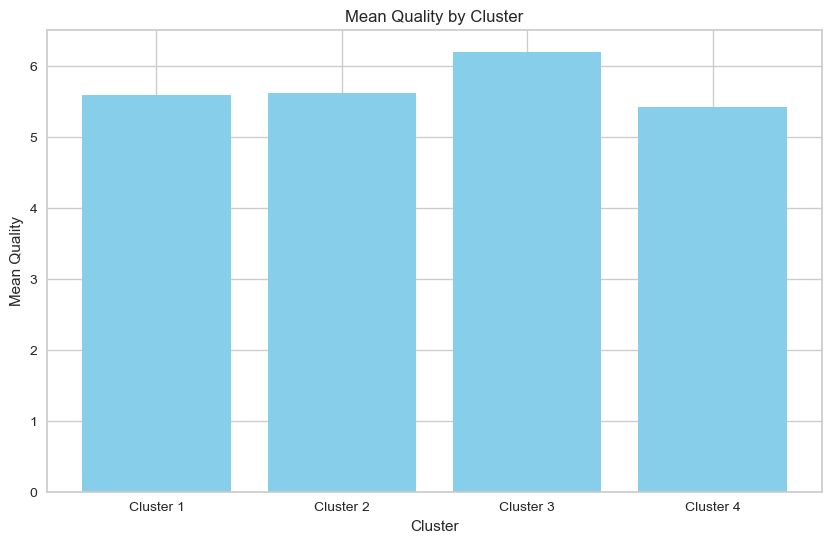

In [447]:
plt.figure(figsize=(10, 6))  

plt.bar(cluster_labels, mean_qualities, color='skyblue')


plt.xlabel('Cluster')
plt.ylabel('Mean Quality')
plt.title('Mean Quality by Cluster')

For K-means with cosine distance, now cluster 3 is the one with highest quality rating but let's see if this cluster is the one with most white wines.

In [453]:
# Create an empty list to store the DataFrames
all_type_counts = []

# Iterate through the clusterList
i = 0
labels = []
for cluster in clusterList:
    i += 1
    # Get value counts of 'type' for the current cluster
    labels.append(f"cluster {i}") 
    type_counts = pd.DataFrame(data=pd.Series(cluster['type']).value_counts())
    
    # Append the DataFrame to the list
    all_type_counts.append(type_counts)

# Concatenate all DataFrames into one
combined_df_cos = pd.concat(all_type_counts, axis = 1)

combined_df_cos.columns = labels
combined_df_cos

cluster 1  cluster 2  cluster 3  cluster 4
type                                             
red          373          5         11        516
white        204       1516       1772        174

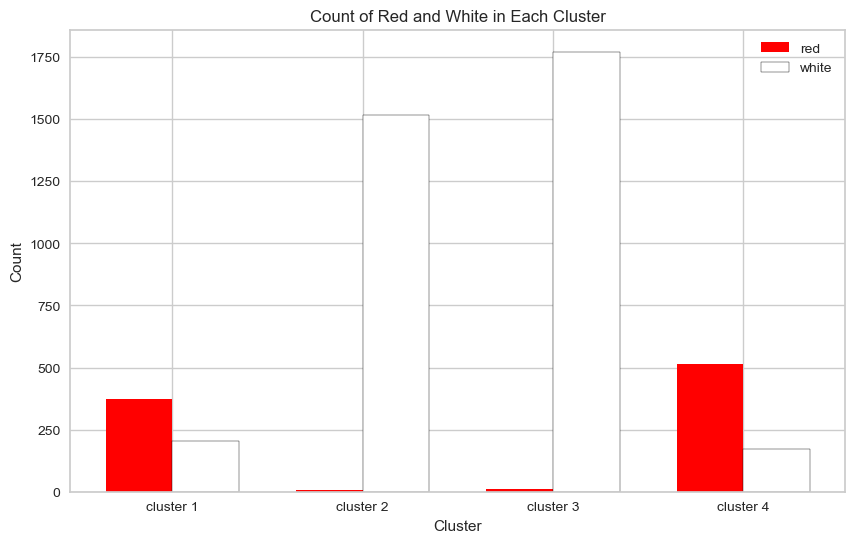

In [454]:
# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.35
x_pos = range(len(combined_df_cos.columns))

# Plot bars for 'red' and 'white' for each cluster
plt.bar(x_pos, combined_df_cos.loc['red'], bar_width, label='red', color='red')
plt.bar([pos + bar_width for pos in x_pos], combined_df_cos.loc['white'], bar_width, label='white', color='white', edgecolor='black')

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count of Red and White in Each Cluster')
plt.xticks([pos + bar_width/2 for pos in x_pos], combined_df_cos.columns) 
plt.legend()

plt.show()

Our findings with cosine distance still align with euclidean. Therefore:
- **Hierarchial produced uneven distribution of clusters**
- **Euclidean distance produced a much more non biased to origin clustering**
- **Cosine distance produced more apparent grouping based on origin.**

For determining the significance of qualities of each cluster group we will use the produced result in K-means with Euclidean distance

# Statistical Inference

## Preparing the clusters grouping

Now that we have decided to use K-Means clustering with Euclidean distance, we can finally use the original values of the data set. **`filtered_df_orig_raw`** is a variable that contains the values of the original dataframe that is also the result of removing outliers. We would reset index and for now we remove the type column.

In [466]:

all_columns_except_type = [col for col in filtered_df_orig_raw.columns if col != 'type']
all_df = filtered_df_orig_raw.copy()
all_df = all_df.reset_index(drop=True)
all_df_withoutType = pd.concat([all_df[all_columns_except_type].copy()], axis=1)
all_df_withoutType_withGroup = pd.concat([all_df_withoutType.copy(),  groups.rename("group")], axis=1)
all_df_withoutType_withGroup

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.3             0.300         0.34             1.6      0.049   
1               8.1             0.280         0.40             6.9      0.050   
2               7.2             0.230         0.32             8.5      0.058   
3               6.2             0.320         0.16             7.0      0.045   
4               8.1             0.220         0.43             1.5      0.044   
...             ...               ...          ...             ...        ...   
4566            7.2             0.390         0.44             2.6      0.066   
4567            7.5             0.310         0.41             2.4      0.065   
4568            7.2             0.660         0.33             2.5      0.068   
4569            6.6             0.725         0.20             7.8      0.073   
4570            6.0             0.310         0.47             3.6      0.067   

      density    pH  sulphates  alcohol  sulfur dioxide ratio  quality  group  
0     0.99400  3.30       0.49      9.5              0.106061        6      1  
1     0.99510  3.26       0.44     10.1              0.309278        6      1  
2     0.99560  3.19       0.40      9.9              0.252688        6      1  
3     0.99490  3.18       0.47      9.6              0.220588        6      1  
4     0.99380  3.22       0.45     11.0              0.217054        6      3  
...       ...   ...        ...      ...                   ...      ...    ...  
4566  0.99494  3.30       0.84     11.5              0.458333        6      2  
4567  0.99492  3.34       0.85     11.4              0.566667        6      0  
4568  0.99414  3.27       0.78     12.8              0.333333        6      0  
4569  0.99770  3.29       0.54      9.2              0.367089        5      2  
4570  0.99549  3.39       0.66     11.0              0.428571        6      3  

[4571 rows x 12 columns]

Null-Hypothesis: There is no difference between any of the groups

Alternative-Hypothesis: There is a difference between one of the three groups

For this example, a 95% significance level will be chosen

In [469]:
import scipy.stats

In [470]:
grps = all_df_withoutType_withGroup
# grps.groupby(['group'])
groups = [[],[],[], []]
for index,row in grps.iterrows():
    group_categ = row['group']
    groups[int(group_categ)].append(row['quality'])


In [471]:
grps.groupby(['group']).mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
group                                                                 
0           7.395990          0.627932     0.105288        2.343358   
1           7.122159          0.271143     0.360360        8.661900   
2           8.194180          0.469683     0.320811        2.995591   
3           6.598565          0.277340     0.302311        3.226274   

       chlorides   density        pH  sulphates    alcohol  \
group                                                        
0       0.077970  0.996121  3.380652   0.611729  10.465664   
1       0.047602  0.995924  3.171553   0.484552   9.784575   
2       0.080526  0.996660  3.261817   0.604339  10.007790   
3       0.038208  0.991747  3.223563   0.490915  11.391125   

       sulfur dioxide ratio   quality  
group                                  
0                  0.394584  5.473684  
1                  0.245287  5.596591  
2                  0.292662  5.465608  
3                  0.263398  6.132113

## One Way ANOVA F-Test

In here we would focus on identifying if there are statistically significant means that are different among the rated quality means of each cluster.

In [474]:
f_stat, p_val = scipy.stats.f_oneway(groups[0], groups[1], groups[2], groups[3])

f_stat_s = str(round(f_stat, 2))

p_val_s = str(round(p_val, 2))
print(f"F-Stat: {f_stat_s}, p-value: {p_val_s}")
print(f"Full p-value: {p_val}")

F-Stat: 190.03, p-value: 0.0
Full p-value: 3.95991106805253e-116


Since the p-value is close to 0%, it could be assumed that there is a difference between one of the groups by virtue of the One-Way-Anova. We therefore reject the null hypothesis.This means that there is a difference in the mean quality between one of the three groups

## T-Tests per groups

Null : There is no significant difference between the quality means of the group

Alternative : There is significant difference between the quality means of the group

A T-Test per group will help determine which pair of groups differ much greatly compared to the other pair of groups

As such, a significance level of 95% will be used for the T-test

In [479]:
red_and_white_counts = combined_df.T.iloc[:, 0:]
red_and_white_counts

type       red  white
cluster 1  391      8
cluster 2   11   1573
cluster 3  458    109
cluster 4   45   1976

In [481]:


c1_c2 = pd.Series(scipy.stats.ttest_ind(groups[0], groups[1]), index=["t-statistic", "p-value"])
c1_c3 = pd.Series(scipy.stats.ttest_ind(groups[0], groups[2]), index=["t-statistic", "p-value"] )
c1_c4 = pd.Series(scipy.stats.ttest_ind(groups[0], groups[3]), index=["t-statistic", "p-value"] )
c2_c3 = pd.Series(scipy.stats.ttest_ind(groups[1], groups[2]), index=["t-statistic", "p-value"] )
c2_c4 = pd.Series(scipy.stats.ttest_ind(groups[1], groups[3]), index=["t-statistic", "p-value"] )
c3_c4 = pd.Series(scipy.stats.ttest_ind(groups[2], groups[3]), index=["t-statistic", "p-value"] )




data = []
for i in range(len(groups)):
    data.append({"Cluster": f"C{i + 1}", "Mean": np.mean(groups[i]), "Length": len(groups[i])})




Cluster      Mean  Length    red   white
0              C1  5.473684   399.0    NaN     NaN
1              C2  5.596591  1584.0    NaN     NaN
2              C3  5.465608   567.0    NaN     NaN
3              C4  6.132113  2021.0    NaN     NaN
cluster 1     NaN       NaN     NaN  391.0     8.0
cluster 2     NaN       NaN     NaN   11.0  1573.0
cluster 3     NaN       NaN     NaN  458.0   109.0
cluster 4     NaN       NaN     NaN   45.0  1976.0

In [493]:
df = pd.DataFrame(data)
lastdf = pd.concat([df, red_and_white_counts.reset_index(drop=True)], axis = 1)
lastdf

Cluster      Mean  Length  red  white
0      C1  5.473684     399  391      8
1      C2  5.596591    1584   11   1573
2      C3  5.465608     567  458    109
3      C4  6.132113    2021   45   1976

Here we see that ones with white mostly in the cluster are garnering the most quality ratings for white.

In [482]:
test_df = pd.DataFrame(pd.concat([c1_c2.rename("C1 vs C2"), c1_c3.rename("C1 vs C3"), c1_c4.rename("C1 vs C4"), c2_c3.rename("C2 vs C3"), c2_c4.rename("C2 vs C4"), c3_c4.rename("C3 vs C4")], axis= 1))
test_df 


C1 vs C2  C1 vs C3      C1 vs C4  C2 vs C3      C2 vs C4  \
t-statistic -2.818409  0.152809 -1.356883e+01  3.494967 -1.905546e+01   
p-value      0.004874  0.878581  1.787730e-40  0.000484  3.296293e-77   

                 C3 vs C4  
t-statistic -1.612263e+01  
p-value      8.482714e-56

In [483]:
def round_if_gt_05(value):
  """Rounds a value to 2 decimal places if it's greater than 0.5, otherwise returns the original value."""
  if(value < 0):
      value *= -1
      return (round(value*(-1), 2)) if value > 0.05 else value
  else:
      return round(value, 2) if value > 0.05 else value

In [484]:
test_df = test_df.apply(lambda x: x.apply(round_if_gt_05) if pd.api.types.is_numeric_dtype(x) else x)
test_df

C1 vs C2  C1 vs C3      C1 vs C4  C2 vs C3      C2 vs C4  \
t-statistic -2.820000      0.15 -1.357000e+01  3.490000 -1.906000e+01   
p-value      0.004874      0.88  1.787730e-40  0.000484  3.296293e-77   

                 C3 vs C4  
t-statistic -1.612000e+01  
p-value      8.482714e-56

Looking at the results, it could be seen that almost all the pairs of groups are significantly different. There is a significantly higher difference between groups C1 and C3 as such having a much higher p-value compared to the other group pairs. Therefore **Cluster 1** and **Cluster 3** have to be rate differently in terms of quality. Cluster 1 and Cluster 3 have significantly different quality means.

As such, since the rest of values are less than 0.05, we can determine that there is a statistically significant difference among the quality means of those groups. The following should be noted:
- Most of C1 and C3 are red wines
- Most of C2 and C4 are white wines
- C1 and C3 are statistically different drom C2 and C4
- C4 and C2 also hold the same statistical difference towards each other and C1 and C3.
- Only C1 and C3 are the only clusters whom are not statistically different in the rated quality means.

# Insights or Conclusions

Based on the analyses and results presented in the notebook, we can draw several significant insights and conclusions regarding the research question. Initially, Principal Component Analysis (PCA) was conducted to reduce the dimensionality of the dataset and identify the most significant components contributing to the variance in wine properties. The PCA revealed that the first two principal components accounted for a substantial portion of the variance in the dataset at 45.7%, indicating that a few key physiochemical properties have a significant impact on the overall variation among the wines. Specifically, PCA 1, PCA 2, and PCA 8 were identified as the most influential components affecting the quality of the wine. It's important to note that the role of PCA 8 may not be as prominent as PCA 1 and PCA 2, comprising as little as 3.7% variance in the dataset. While not the primary focus, it still contributes to the overall understanding of the dataset by capturing additional, though smaller, variations.

Next, K-Means Clustering was applied to PCA 1 and PCA 2, and the optimal number of clusters was determined to be four based on the elbow method and silhouette scores. The clustering results showed that the wines could be grouped into four distinct clusters, with Clusters 1 and 3 predominantly consisting of red wines and Clusters 2 and 4 predominantly consisting of white wines. This suggests that the clustering algorithm was able to effectively separate the wines based on their type (red or white), highlighting the influence of physiochemical properties on wine classification. 

To determine if these distinct groups of wines differed significantly in perceived quality, statistical tests such as One-way-ANOVA and T-Tests were conducted. With a p-value close to 0, the One-way-ANOVA test indicated significant differences in the mean quality scores between the clusters, leading to the rejection of the null hypothesis that there are no quality differences between clusters. The following T-tests revealed that Clusters 1 and 3, which are mostly red wines, had significantly different quality means compared to Clusters 2 and 4, which are mostly white wines. However, within the groups of red and white wines, the quality means were not significantly different from each other. In other words, the mean quality scores in Clusters 1 and 3 were significantly different from Clusters 2 and 4, but the quality within each type of wine is more consistent. Seems, there are lacking tastes or possibly even bias against rating quality of most red wines.

Ulitmately, the analysis identified distinct groups of wines based on their physiochemical properties, with a clear distinction between red and white wines. Furthermore, these groups showed significant differences in perceived quality, demonstrating that the physiochemical properties used in the clustering analysis are indicative of a wine's quality. These findings suggest that wine experts could use these physiochemical properties to predict and differentiate the quality of wines, enhancing their understanding of what contributes to a wine's quality perception. The research provides comprehensive results that affirm that distinct wine groups based on physiochemical properties can be identified and these groups do indeed differ significantly in perceived quality.


# References

Tomar, A. (2023, August 2). Stop using elbow method in k-means clustering. Built In. https://builtin.com/data-science/elbow-method#:~:text=The%20elbow%20method%20is%20a%20graphical%20method%20for%20finding%20the,the%20graph%20forms%20an%20elbow. 